<h1 style="text-align: center;">Sentiment Analysis on Amazon Reviews 📊</h1>

## Objective

The rapid growth of e-commerce, accelerated significantly during and after the COVID-19 pandemic, has reshaped consumer purchasing behaviors for both essential and non-essential goods. This shift has resulted in an overwhelming increase in online customer reviews, offering businesses a wealth of insights into customer satisfaction, product performance, and potential areas for improvement. However, the sheer volume of these reviews makes manual analysis infeasible for organizations striving to understand and act on customer sentiments effectively.
Sentiment analysis has emerged as an essential solution, leveraging Natural Language Processing (NLP) and machine learning techniques to automatically identify and classify opinions expressed in text. This research explores the application of these techniques to analyze e-commerce reviews, aiming to uncover actionable insights at scale. By automating sentiment analysis, businesses can enhance customer experiences, personalize offerings, and make informed, data-driven decisions that align with evolving customer preferences. This study not only addresses the challenges of large-scale sentiment analysis but also highlights its transformative potential for improving business strategies in the dynamic e-commerce landscape

## Data Description

The dataset used in this project is titled **Amazon Product Reviews** and was sourced from both Kaggle and the University of San Diego’s website. It is a publicly available dataset under the **CC0 1.0 Universal license**, which means it is free to use, share, and adapt without legal restrictions. The dataset can be accessed through [this Kaggle link](https://www.kaggle.com/datasets/arhamrumi/amazon-product-reviews/data).

### Dataset Structure

The dataset comprises the following fields:

1. **Id**: A unique identifier for each review entry.
2. **ProductId**: A unique identifier for the product being reviewed.
3. **UserId**: A unique identifier for the user who submitted the review.
4. **ProfileName**: The name of the user who submitted the review.
5. **HelpfulnessNumerator**: The number of users who found the review helpful.
6. **HelpfulnessDenominator**: The total number of users who rated the helpfulness of the review.
7. **Score**: The rating provided by the user, typically on a scale of 1 to 5.
8. **Time**: A timestamp representing when the review was submitted.
9. **Summary**: A short title or summary of the review.
10. **Text**: The full review text.

### Data Preprocessing and Ethical Considerations:

For this project, the **UserId** and **ProfileName** columns will be dropped from the dataset. This decision is made to ensure that no personal identifiers are used, thus maintaining ethical standards and adhering to data privacy principles. Removing these fields ensures that the dataset is ethically cleared for analysis while retaining all necessary information for sentiment analysis

## Key Research Questions to be Addressed

- **How accurately can various machine learning models classify sentiment in e-commerce reviews?**
- **How do different text preprocessing techniques impact the performance of sentiment classification models?**
- **How do various feature extraction methods affect the accuracy of sentiment classification?**
- **How do different machine learning models compare in terms of performance when classifying sentiment in e-commerce reviews?**

## Methodology

### Imports & Downloads

To run this notebook you will need the following installed:
- `pip install pandas`
- `pip install numpy`
- `pip install seaborn`
- `pip install matplotlib`
- `pip install scikit-learn`
- `pip install nltk`
- `pip install textblob`
- `pip install wordcloud`
- `pip install beautifulsoup4`
- `pip install emoji`
- `pip install contractions`

#### 1. Libraries & Packages

In [1]:
# For local installation please uncomment the following and run this code block

%pip install pandas
%pip install numpy
%pip install seaborn
%pip install matplotlib
%pip install scikit-learn
%pip install nltk
%pip install textblob
%pip install wordcloud
%pip install beautifulsoup4
%pip install emoji
%pip install contractions

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/29/d4/1244ab8edf173a10fd601f7e13b9566c1b525c4f365d6bee918e68381889/pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for numpy>=1.26.0 from https://files.pythonhosted.org/packages/42/6e/55580a538116d16ae7c9aa17d4edd56e83f42126cb1dfe7a684da7925d2c/numpy-2.2.3-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.8 kB 2.6 MB/s eta 0:00:01
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/eb/38/ac33370d784287baa1c3d538978b5e2ea064d4c1b93ffbd12826c190dd10/pytz-2025.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tzdata>=2022.7 from https:/


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib!=3.6.1,>=3.4 from https://files.pythonhosted.org/packages/a6/b6/a9405484fb40746fdc6ae4502b16a9d6e53282ba5baaf9ebe2da579f68c4/matplotlib-3.10.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/a1/35/c2de8823211d07e8a79ab018ef03960716c5dff6f4d5bff5af87fd682992/contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://f


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/62/27/585859e72e117fe861c2079bcba35591a84f801e21bc1ab85bce6ce60305/scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/f5/6f/e6e5aff77ea2a48dd96808bb51d7450875af154ee7cbe72188afb0b37929/scipy-1.15.2-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.8 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for nltk from https://files.pythonhosted.org/packages/4d/66/7d9e26593edda06e8cb531874633f7c2372279c3b0f46235539fe546df8b/nltk-3.9.1-py3-none-any.whl.metadata
  Obtaining dependency information for click from https://files.pythonhosted.org/packages/7e/d4/7ebdbd03970677812aac39c869717059dbb71a4cfc033ca6e5221787892c/click-8.1.8-py3-none-any.whl.metadata
  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/38/ec/ad2d7de49a600cdb8dd78434a1aeffe28b9d6fc42eb36afab4a27ad23384/regex-2024.11.6-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ------------------ ------------------- 20.5/41.5 kB 682.7 kB/s eta 0:00:01
     ---------------------------------------- 41.5/41.5 kB 1.0 MB/s eta 0:00:00
  Obtaining dependency information for tqdm from https://files.pythonhosted.org/pack


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/1e/d6/40aa5aead775582ea0cf35870e5a3f16fab4b967f1ad2debe675f673f923/textblob-0.19.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
    --------------------------------------- 10.2/624.3 kB ? eta -:--:--
   ------------------- -------------------- 307.2/624.3 kB 4.7 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 6.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/b9/74/6a15f68f59bc90032bfcf62eca796a5675be95e1aaf84f7861e1bfcfa8e5/wordcloud-1.9.4-cp312-cp312-win_amd64.whl.metadata
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   -------------- ------------------------- 112.6/301.2 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for beautifulsoup4 from https://files.pythonhosted.org/packages/f9/49/6abb616eb3cbab6a7cca303dc02fdf3836de2e0b834bf966a7f5271a34d8/beautifulsoup4-4.13.3-py3-none-any.whl.metadata
  Obtaining dependency information for soupsieve>1.2 from https://files.pythonhosted.org/packages/d1/c2/fe97d779f3ef3b15f05c94a2f1e3d21732574ed441687474db9d342a7315/soupsieve-2.6-py3-none-any.whl.metadata
  Obtaining dependency information for typing-extensions>=4.0.0 from https://files.pythonhosted.org/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8ffd9ff037d0/typing_extensions-4.12.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/186.0 kB ? eta -:--:--
   ------------------- -------------------- 92.2/186.0 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 186.0/186.0 kB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to us


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for emoji from https://files.pythonhosted.org/packages/91/db/a0335710caaa6d0aebdaa65ad4df789c15d89b7babd9a30277838a7d9aac/emoji-2.14.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
    --------------------------------------- 10.2/590.6 kB ? eta -:--:--
   ------------- -------------------------- 204.8/590.6 kB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 590.6/590.6 kB 6.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for contractions from https://files.pythonhosted.org/packages/bb/e4/725241b788963b460ce0118bfd5c505dd3d1bdd020ee740f9f39044ed4a7/contractions-0.1.73-py2.py3-none-any.whl.metadata
  Obtaining dependency information for textsearch>=0.0.21 from https://files.pythonhosted.org/packages/e2/0f/6f08dd89e9d71380a369b1f5b6c97a32d62fc9cfacc1c5b8329505b9e495/textsearch-0.0.24-py2.py3-none-any.whl.metadata
  Obtaining dependency information for anyascii from https://files.pythonhosted.org/packages/4f/7b/a9a747e0632271d855da379532b05a62c58e979813814a57fa3b3afeb3a4/anyascii-0.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for pyahocorasick from https://files.pythonhosted.org/packages/8f/02/8dceb0a63dbbc7c102eb0bd27504336ecb27164155c35d27a9943f2ce0dd/pyahocorasick-2.1.0-cp312-cp312-win_amd64.whl.metadata
   ---------------------------------------- 0.0/289.9 kB ? eta -:--:-


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### 2. Import Packages

In [2]:
# ===================================================
# DATA MANIPULATION & ANALYSIS
# ===================================================
import pandas as pd
import numpy as np

# ===================================================
# DATA VISUALIZATION
# ===================================================
import seaborn as sns
import matplotlib.pyplot as plt

# ===================================================
# MACHINE LEARNING & MODEL SELECTION
# ===================================================
import sklearn as sk
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# ===================================================
# MACHINE LEARNING MODELS
# ===================================================
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

# ===================================================
# FEATURE EXTRACTION & TEXT VECTORIZATION
# ===================================================
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# ===================================================
# TEXT PREPROCESSING
# ===================================================
import re
import string
import unicodedata
import contractions
import collections
import emoji
from bs4 import BeautifulSoup  # For parsing HTML
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer

# ===================================================
# SENTIMENT ANALYSIS
# ===================================================
from textblob import TextBlob

# ===================================================
# WORD CLOUDS
# ===================================================
from wordcloud import WordCloud

# ===================================================
# UTILITIES & MISCELLANEOUS
# ===================================================
import json  # To save results
from tqdm import tqdm  # Progress bar

Matplotlib is building the font cache; this may take a moment.


#### 3. Install NLTK Tools

In [3]:
# Downloading NLTK resources
# Please uncomment the following line if you haven't downloaded the NLTK resources:

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\mm2046\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\mm2046\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\mm2046\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\mm2046\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\mm2046\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       

True

### **Step 1: Load Data**

In [4]:
# Balanced data is data where all reviews (1 star to 5 star) are taken in equal proportion to avoid overfitting or underfitting
# 25000 Records of each star rating is taken
df_balancedData = pd.read_csv('Datasets/balanced_reviews.csv')

### **Step 2: Exploratory Data Analysis (EDA)**

In [5]:
df_balancedData.shape

(125000, 10)

In [6]:
df_balancedData.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,length
0,B008COIXOG,AY12DBB0U420B,Gary Peterson,1,1,5,1342310400,Nice Fresh Coconut Taste. Loaded With Potassium.,I just recently visited my nearby Fresh and Ea...,357
1,B004VLVG0C,A1KE5DCWHTAUUX,Gary Anderson,1,1,5,1336867200,Semolina flour for making pasta,This works great I followed the recipe on the...,296
2,B000FL0A9K,AJKN1OQ368JGH,Lynn Benson,0,0,2,1181692800,Too Sweet,Personal preference too sweet Tastes like Gen...,142
3,B0015MY6PC,A2CFYUTWZ3N3FJ,A. Pickett,0,0,5,1244160000,My Daughter Loves These,My daughter loves these snacks She doesnt care...,539
4,B000LTIDR2,A1MG6S9RPWX7C7,Rebeliium,0,0,3,1346976000,Too Much and Too Sweet,I would not recommend buying this product beca...,1331


In [7]:
df_balancedData.tail()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,length
124995,B000JOE224,A28EQ06V6ZOMV0,"Nanette Erickson ""An avid reader from Florida""",0,0,5,1272326400,Terrific idea.,I have a cat that can sense a pill in anything...,190
124996,B000WJ6C2O,AC2GDNWF8REFU,mammy,0,0,5,1328918400,Bran Flakes,I was looking for an affordable product to use...,256
124997,B004N8LMFM,A1O80FSHN7HR8F,Derp,3,22,1,1310169600,tasted like plastic. Instructions not readible.,tasted like plastic The texture is so strange ...,292
124998,B000GW257S,A1NL8RB3BHVFKR,Katrina,0,0,1,1323993600,YUK,This stuff taste terrible Just like an artifi...,141
124999,B002QWP89S,A1HZIWB1RGW7RM,Danny Knowles,1,1,5,1319673600,Greenies,These are the best things since sliced bread ...,300


In [8]:
df_balancedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               125000 non-null  object
 1   UserId                  125000 non-null  object
 2   ProfileName             124998 non-null  object
 3   HelpfulnessNumerator    125000 non-null  int64 
 4   HelpfulnessDenominator  125000 non-null  int64 
 5   Score                   125000 non-null  int64 
 6   Time                    125000 non-null  int64 
 7   Summary                 124978 non-null  object
 8   Text                    125000 non-null  object
 9   length                  125000 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 9.5+ MB


In [9]:
df_balancedData.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,length
count,125000.000000,125000.000000,125000.000000,1.250000e+05,125000.000000
mean,1.852448,2.773656,3.000000,1.299249e+09,456.388040
std,7.729888,8.831183,1.414219,4.597147e+07,455.731686
min,0.000000,0.000000,1.000000,9.617184e+08,30.000000
25%,0.000000,0.000000,2.000000,1.278547e+09,189.000000
50%,0.000000,1.000000,3.000000,1.313626e+09,324.000000
75%,2.000000,3.000000,4.000000,1.333411e+09,561.000000
max,844.000000,923.000000,5.000000,1.351210e+09,20560.000000


In [10]:
df_balancedData.columns

Index(['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text', 'length'],
      dtype='object')

In [11]:
df_balancedData['Text']

0         I just recently visited my nearby Fresh and Ea...
1         This works great  I followed the recipe on the...
2         Personal preference too sweet  Tastes like Gen...
3         My daughter loves these snacks She doesnt care...
4         I would not recommend buying this product beca...
                                ...                        
124995    I have a cat that can sense a pill in anything...
124996    I was looking for an affordable product to use...
124997    tasted like plastic The texture is so strange ...
124998    This stuff taste terrible  Just like an artifi...
124999    These are the best things since sliced bread  ...
Name: Text, Length: 125000, dtype: object

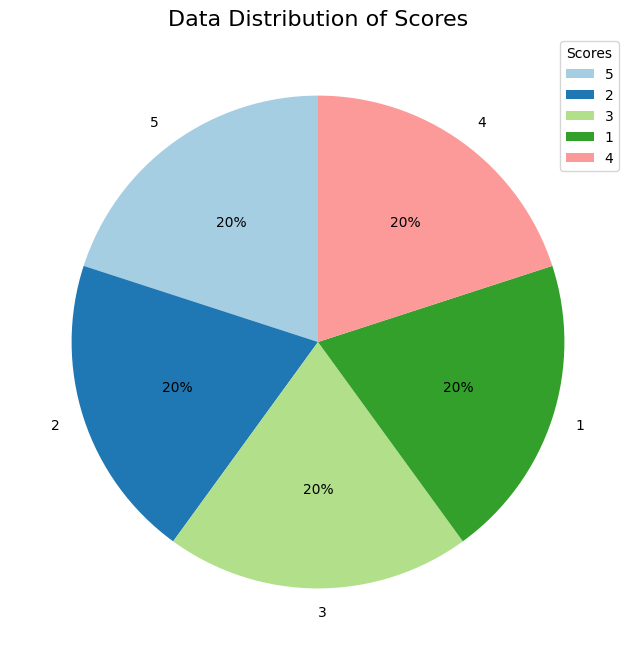

In [12]:
# Create a pie chart
plt.figure(figsize=(10, 8))
df_balancedData['Score'].value_counts().plot(
    kind='pie', 
    autopct='%.0f%%', 
    startangle=90,  # Rotate the pie chart for better orientation
    colors=plt.cm.Paired.colors  # Add distinct colors for each segment
)

# Add title and legend
plt.title('Data Distribution of Scores', fontsize=16)
plt.ylabel('')  # Remove the default y-axis label for better aesthetics
plt.legend(title='Scores', loc='upper right')

# Show the plot
plt.show()

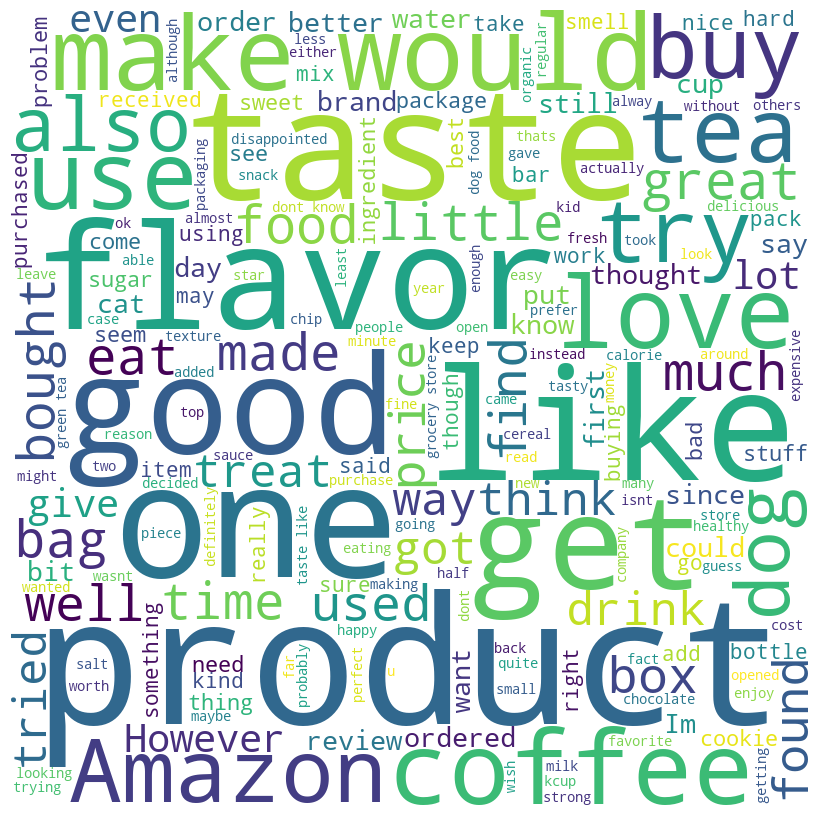

In [13]:
# Define stopwords
stop_words = set(stopwords.words('english'))

# Combine all text from the 'Review' column into a single string
all_reviews = " ".join(df_balancedData["Text"])

# Generate the Word Cloud
wordcloud = WordCloud(
    stopwords=stop_words, 
    width=800, 
    height=800, 
    background_color='white', 
    min_font_size=10
).generate(all_reviews)

# Plot the Word Cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

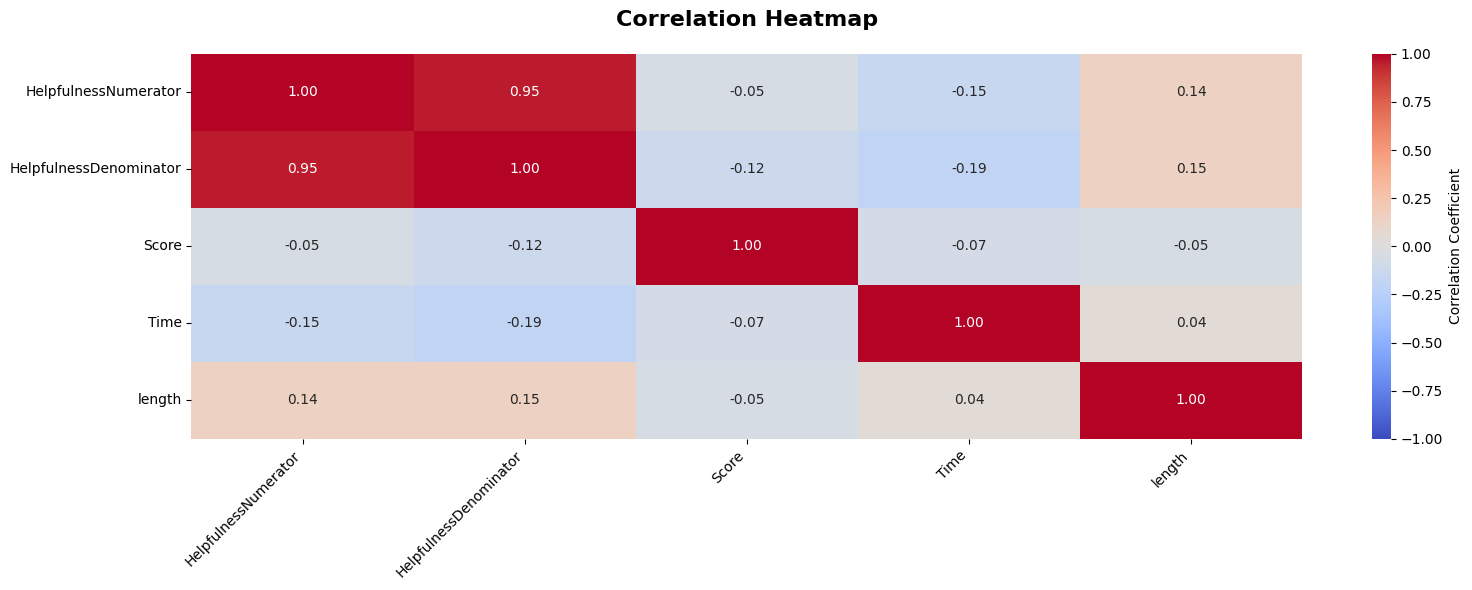

In [14]:
# Select numeric columns only
numeric_data = df_balancedData.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(16, 6))

# Generate the heatmap
heatmap = sns.heatmap(
    correlation_matrix, 
    vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'}
)

# Customize the title
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 16, 'fontweight': 'bold'}, pad=20)

# Rotate x and y axis labels for clarity
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Tighten the layout for better spacing
plt.tight_layout()

# Display the heatmap
plt.show()

### **Step 3: Data Cleaning & Preprocessing**

#### Drop Unnecesary Columns

In [ ]:
# Select only relevant columns
df_balancedData = df_balancedData[['ProductId', 'Score', 'Text']]
# Display the updated DataFrame
df_balancedData.head()

#### Map Sentiment Classes from Score (3 Classes)

In [ ]:
#########################################
#   Map 5-Star Ratings to 3 Classes
#########################################
def map_to_3_classes(score):
    if score in [1, 2]:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:  # 4 or 5
        return 'positive'

df_balancedData['Sentiment'] = df_balancedData['Score'].apply(map_to_3_classes)

In [ ]:
df_balancedData.head()

#### Remove Emojis

In [ ]:

class CleanEmojis(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Apply emoji removal to the 'Text' column of the DataFrame
        tqdm.pandas(desc="Removing emojis")  # Add progress bar for this step
        X['Text'] = X['Text'].progress_apply(lambda review: emoji.demojize(review))
        return X

# Apply the transformer to the DataFrame
cleaner = CleanEmojis()
df_balancedData = cleaner.transform(df_balancedData)

# Display the updated DataFrame
df_balancedData.head()

#### Method for Removing Special Characters, URLS, HTML etc. and convert to lowercase

In [ ]:
# Define the StringProcessing class
class StringProcessing(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        filtered_tweets = []
        for review in X:
            # Converting to lowercase
            review = review.lower()
            # Substituting ampersand signs to 'and'
            review = re.sub(r"&amp", "and", review)
            review = re.sub(r"&", "and", review)
            # Removing @ mentions and hashtags
            review = re.sub(r"[@#][^\s]+", " ", review)
            # Removing URLs
            review = re.sub(r"(http\S+)|(www\S+)", "", review)
            # Removing HTML tags
            review = re.sub(r"<[^<]+?>", " ", review)
            # Cleaning emojis
            review = re.sub(r":", " ", review)
            review = review.replace("_", " ")
            # Removing special characters
            review = re.sub(r"[^a-z0-9'’ ]", " ", review)
            # Removing extra whitespace
            review = re.sub(r"\s+", " ", review)
            filtered_tweets.append(review)
        return filtered_tweets

# Create an instance of the StringProcessing transformer
string_processor = StringProcessing()

# Apply the transformation to the 'Text' column and store the result in a new 'Text' column
df_balancedData.loc[:, 'Text'] = string_processor.transform(df_balancedData['Text'])

# Display the updated DataFrame with the new 'Review' column
df_balancedData.head()

#### Preprocessed Text into New column

In [ ]:
# Select only relevant columns
df_balancedData = df_balancedData[['ProductId', 'Score', 'Text', 'Sentiment']]
df_balancedData.head()

#### Method to substitute contractions

In [ ]:
def collect_short_contractions(short_contractions):
    short_contractions_dict = {}
    # Sort the contractions alphabetically
    for key, value in sorted(short_contractions.items()):
        # Remove apostrophes from the contraction keys
        new_key = key.replace("'", "")
        short_contractions_dict[new_key] = value
    return short_contractions_dict

# (Maarten et al., 2013)
short_contractions = {
    "i'd": "i would",
    "we'd": "we would",
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "doesn’t": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "haven’t": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'll": "I will",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'll": "it will",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "oughtn't": "ought not",
    "shan't": "shall not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "that'd": "that would",
    "that's": "that is",
    "there'd": "there had",
    "there's": "there is",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'll": "we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who's": "who is",
    "who've": "who have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "y'all": "you all",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have"
}

short_contractions_dict = collect_short_contractions(short_contractions)
short_contractions_dict

In [ ]:
class ExpandContractions(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        expanded_reviews = []
        # Wrap X in tqdm for a progress bar
        for review in tqdm(X, desc="Expanding Contractions"):
            expanded_reviews.append(contractions.fix(review))
        return expanded_reviews

#### Method to handle Slang words

In [ ]:
def collect_slangs(slangs):
    slang_dict = {}
    for line in slangs.strip().split('\n'):
        key, value = line.lower().strip().split(': ', 1)  # Added limit to split on first ':'
        slang_dict[key] = value

    # Sort the dictionary by keys alphabetically
    return dict(sorted(slang_dict.items()))

# (SlickText, 2023)
slangs = '''
  ROFL: Rolling on the floor laughing
  STFU: Shut up
  ICYMI: In case you missed it
  TL;DR: Too long, didn’t read
  TMI: Too much information
  AFAIK: As far as I know
  LMK: Let me know
  NVM: Nevermind
  FTW: For the win
  BYOB: Bring your own beer
  BOGO: Buy one get one
  JK: Just kidding
  TBH: To be honest
  TBF: To be frank
  RN: Right now
  BRB: Be right back
  BTW: By the way
  GG: Good game
  IRL: In real life
  LOL: Laugh out loud
  SMH: Shaking my head
  NGL: Not gonna lie
  IKR: I know right
  TTYL: Talk to you later
  IMO: In my opinion
  WYD: What are you doing?
  IDK: I don’t know
  IDC: I don’t care
  IDGAF: I don’t care
  TBA: To be announced
  TBD: To be decided
  AFK: Away from keyboard
  IYKYK: If you know you know
  B4: Before
  FOMO: Fear of missing out
  GTG: Got to go
  G2G: Got to go
  H8: Hate
  LMAO: Laughing my ass off
  IYKWIM: If you know what I mean
  MYOB: Mind your own business
  POV: Point of view
  HBD: Happy birthday
  WYSIWYG: What you see is what you get
  FWIF: For what it’s worth
  TW: Trigger warning
  EOD: End of day
  FAQ: Frequently asked question
  AKA: Also known as
  ASAP: As soon as possible
  DIY: Do it yourself
  NP: No problem
  U: you
  R: are
  PLS: please
  WYD: what are you doing
  N/A: Not applicable
  K: Okay
  WUT: what
  FYI: For your information
  NSFW: Not safe for work
  WFH: Work from home
  OMW: On my way
  DM: Direct message
  FB: Facebook
  IG: Instagram
  YT: YouTube
  QOTD: Quote of the day
  OOTD: Outfit of the day
  AMA: Ask me anything
  HMU: Hit me up
  ILY: I love you
  BF: Boyfriend
  GF: Girlfriend
  BAE: Before anyone else
  LYSM: Love you so much
  PDA: Public display of affection
  XOXO: Hugs and kisses
  LOML: Love of my life
  THX: thanks
  V: very
  OMG: Oh My God
'''

slang_dict = collect_slangs(slangs)
slang_dict

In [ ]:
import re
from sklearn.base import BaseEstimator, TransformerMixin

class ReplaceSlangs(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        filtered_reviews = []
        for review in tqdm(X, desc="Replacing Slangs"):
            # Replace slang
            for key, value in slang_dict.items():
                review = re.sub(r'\b{}\b'.format(re.escape(key)), value, review, flags=re.IGNORECASE)
            
            # Replace short contractions
            for key, value in short_contractions_dict.items():
                review = re.sub(r'\b{}\b'.format(re.escape(key)), value, review, flags=re.IGNORECASE)
            
            filtered_reviews.append(review)
        return filtered_reviews

#### Method for Tokenization

In [ ]:
class Tokenize(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        filtered_tweets = []
        for tweet in tqdm(X, desc="Tokenizing"):
            filtered_tweets.append(nltk.word_tokenize(tweet))
        return filtered_tweets

#### Method to remove stopwords
**There are certain words in the built-in NLTK stop word list that if we removed, would change the sentiment of the text. Therefore, we decided to modify the original list by removing certain words like "no", "against", "above" etc.**

In [ ]:
class RemoveStopwords(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        sentiment_stopwords = [
            'against', 'above', 'below', 'up', 'down', 'over', 'under', 'no', 'nor', 'not',
            "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
            'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
            'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",
            'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't",
            'won', "won't", 'wouldn', "wouldn't"
        ]
        
        stop_words = set(stopwords.words('english'))
        for word in sentiment_stopwords:
            stop_words.remove(word)
        
        processed_reviews = []
        for review in tqdm(X, desc="Removing Stopwords"):
            tokens_without_stopwords = [word for word in review if word not in stop_words]
            processed_reviews.append(tokens_without_stopwords)
        
        return processed_reviews

#### Method to apply lemmatization

In [ ]:
class Lemmatize(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        lemmatizer = WordNetLemmatizer()
        lemmatized_reviews = []

        def get_wordnet_pos(pos_tag):
            if pos_tag.startswith('J'):
                return wordnet.ADJ
            elif pos_tag.startswith('V'):
                return wordnet.VERB
            elif pos_tag.startswith('N'):
                return wordnet.NOUN
            elif pos_tag.startswith('R'):
                return wordnet.ADV
            else:
                return wordnet.NOUN
        
        # Wrap X in tqdm
        for review in tqdm(X, desc="Lemmatizing"):
            pos_tags = nltk.pos_tag(review)
            lemmatized_tokens = [
                lemmatizer.lemmatize(token, get_wordnet_pos(tag)) 
                for token, tag in pos_tags
            ]
            lemmatized_reviews.append(lemmatized_tokens)
        
        return lemmatized_reviews

#### Basic cleaning after preprocessing

In [ ]:
class FinalClean(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.remove_digits = re.compile(r'\d+')
        self.remove_single_letters = re.compile(r'\b\w{1}\b')
        self.remove_apostrophes = re.compile(r"'")
        self.remove_href = "href"

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        cleaned_reviews = []
        
        for review in tqdm(X, desc="Final Cleaning"):
            cleaned_words = [
                self.clean_word(word)
                for word in review
                if word and word != self.remove_href
            ]
            cleaned_reviews.append(cleaned_words)
        
        return cleaned_reviews

    def clean_word(self, word):
        # Removing digits
        word = self.remove_digits.sub("", word)
        # Removing single letters
        word = self.remove_single_letters.sub("", word)
        # Removing apostrophes
        word = self.remove_apostrophes.sub("", word)
        return word

#### Preprocessing Pipeline

In [ ]:
df_balancedData.head()

In [ ]:
def preprocess_reviews(reviews_frame):
    # Define the list of preprocessing steps as tuples
    # Each tuple contains a step name (for identification) and an instance of the corresponding transformer
    preprocessing_steps = [
        ('expand_contractions', ExpandContractions()),  # Step to expand contractions like "don't" -> "do not"
        ('replace_slangs', ReplaceSlangs()),         # Step to replace slang words with their full form
        ('tokenize', Tokenize()),                    # Step to tokenize the text (split into words)
        ('remove_stopwords', RemoveStopwords()),     # Step to remove common stopwords
        ('lemmatize', Lemmatize()),                  # Step to lemmatize words (reduce to root form)
        ('final_clean', FinalClean())                # Final cleaning step (removing unwanted characters, etc.)
    ]

    # Create the pipeline object using the preprocessing steps defined above
    # The Pipeline applies each step sequentially to the data
    preprocessing_pipeline = Pipeline(preprocessing_steps)
    
    # Apply the pipeline to the 'Text' column of the DataFrame
    # This will preprocess the 'Text' data column by applying each step defined in the pipeline
    preprocessed_reviews = preprocessing_pipeline.fit_transform(reviews_frame['Text'])
    
    # Convert the list of tokenized words into strings (space-separated)
    # List comprehension is used to join each list of tokens into a single string for each review
    # Each review is a list of words, so ' '.join(review) joins them back into a single string
    preprocessed_strings = [' '.join(review) for review in preprocessed_reviews]

    # Add the preprocessed reviews as a new column to the original DataFrame
    # This new column will contain the cleaned and processed review text
    reviews_frame['Preprocessed_Review'] = preprocessed_strings

    # Return the DataFrame with the added preprocessed reviews
    return reviews_frame


In [ ]:
preprocess_reviews(df_balancedData)

In [ ]:
df_balancedData.to_csv('Datasets/preprocessed_reviews.csv', index=False) # Save the preprocessed data to a new CSV file

## 🟢 Classification Tri-Class 

### **Train/Test Split**

#### Make a copy of the preprocessed data

In [15]:
df_preprocessed = pd.read_csv('Datasets/preprocessed_reviews.csv')
df_preprocessed.head()

,ProductId,Score,Text,Sentiment,Preprocessed_Review
0,B008COIXOG,5,i just recently visited my nearby fresh and ea...,positive,recently visit nearby fresh easy market saw ad...
1,B004VLVG0C,5,this works great i followed the recipe on the ...,positive,work great follow recipe back bag except put i...
2,B000FL0A9K,2,personal preference too sweet tastes like gene...,negative,personal preference sweet taste like general f...
3,B0015MY6PC,5,my daughter loves these snacks she doesnt care...,positive,daughter love snack not care something sour ea...
4,B000LTIDR2,3,i would not recommend buying this product beca...,neutral,would not recommend buy product large quantity...


In [16]:
df_preprocessed.shape

(125000, 5)

Class Distribution (Counts):
Sentiment
positive    50000
negative    50000
neutral     25000
Name: count, dtype: int64

Class Distribution (Percentages):
Sentiment
positive    40.0
negative    40.0
neutral     20.0
Name: proportion, dtype: float64


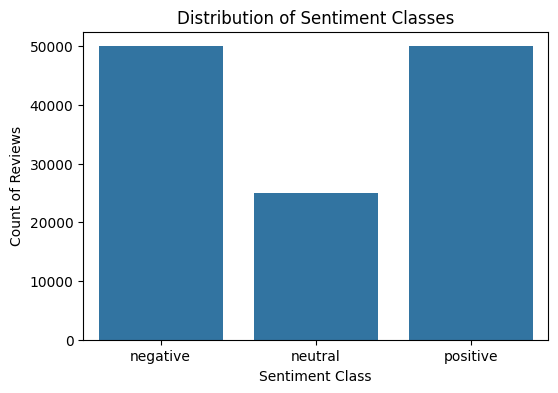

In [17]:
# 1. View the raw counts
print("Class Distribution (Counts):")
print(df_preprocessed['Sentiment'].value_counts())

# 2. View the normalized distribution (percentages)
print("\nClass Distribution (Percentages):")
print(df_preprocessed['Sentiment'].value_counts(normalize=True) * 100)

# 3. Visualize with a Seaborn countplot
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df_preprocessed, order=['negative','neutral','positive'])  # or remove 'order' if you want auto-sorting
plt.title("Distribution of Sentiment Classes")
plt.xlabel("Sentiment Class")
plt.ylabel("Count of Reviews")
plt.show()

#### Define Features (Preprocessed Text) and Target (Sentiment)

In [18]:
# Define Features (Preprocessed Text) and Target (Sentiment)
X = df_preprocessed['Preprocessed_Review']
y = df_preprocessed['Sentiment']

In [19]:
df_preprocessed.head()

,ProductId,Score,Text,Sentiment,Preprocessed_Review
0,B008COIXOG,5,i just recently visited my nearby fresh and ea...,positive,recently visit nearby fresh easy market saw ad...
1,B004VLVG0C,5,this works great i followed the recipe on the ...,positive,work great follow recipe back bag except put i...
2,B000FL0A9K,2,personal preference too sweet tastes like gene...,negative,personal preference sweet taste like general f...
3,B0015MY6PC,5,my daughter loves these snacks she doesnt care...,positive,daughter love snack not care something sour ea...
4,B000LTIDR2,3,i would not recommend buying this product beca...,neutral,would not recommend buy product large quantity...


#### Split into training and testing

In [20]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,      # 70 train 30 test
    random_state=42,
    stratify=y
)

### **NLP Method 1:** Term Frequency-Inverse Document Frequency (TF-IDF)
Here, we run each model separately—each with its own hyperparameter tuning and 10-fold cross-validation.


#### Feature Extraction Method : TFIDF Setup

In [21]:
# TF-IDF Transformation
tfidf_vectorizer = TfidfVectorizer(
    max_features=10000,  # Can be varied
    ngram_range=(1,2),
    max_df=0.8,
    sublinear_tf=True
)

# Fit on training data and transform
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create a dictionary to store the final results from each model (optional)
results = {}

#### M1 (Decision Tree)

##### a. Implementation

In [22]:
# -------------------------------
#  SECTION 1: DECISION TREE
# -------------------------------
print("\n" + "="*50)
print("MODEL 1: Decision Tree (Tri-Class)")
print("="*50)

# Define model
dt_classifier = DecisionTreeClassifier()

# Define hyperparameter grid
dt_param_grid = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
}

# Set up GridSearchCV with 10-fold CV
dt_grid_search = GridSearchCV(
    estimator=dt_classifier,
    param_grid=dt_param_grid,
    scoring='accuracy',  
    cv=10,
    n_jobs=4,           # Adjust CPU usage
    verbose=2,
    return_train_score=True
)


MODEL 1: Decision Tree (Tri-Class)


In [23]:
# Fit GridSearch on the TF-IDF training data
dt_grid_search.fit(X_train_tfidf, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [24]:
# Evaluate best model
print("\nBest Params (Decision Tree):", dt_grid_search.best_params_)
print("Best CV Score (Decision Tree):", dt_grid_search.best_score_)


Best Params (Decision Tree): {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Score (Decision Tree): 0.6317371428571429


In [25]:
# Predict on test data
dt_best = dt_grid_search.best_estimator_ # Get the best model
y_pred_dt = dt_best.predict(X_test_tfidf) # Predict on test data

In [26]:
# Accuracy & Classification Report
dt_test_accuracy = accuracy_score(y_test, y_pred_dt)
print("Test Accuracy (Decision Tree):", dt_test_accuracy)
print(classification_report(y_test, y_pred_dt))

# Store results
results['DecisionTree'] = {
    'best_params': dt_grid_search.best_params_,
    'best_cv_score': dt_grid_search.best_score_,
    'test_accuracy': dt_test_accuracy,
    'classification_report': classification_report(y_test, y_pred_dt, output_dict=True)
}

Test Accuracy (Decision Tree): 0.6317333333333334
              precision    recall  f1-score   support

    negative       0.61      0.77      0.69     15000
     neutral       0.51      0.23      0.31      7500
    positive       0.68      0.69      0.69     15000

    accuracy                           0.63     37500
   macro avg       0.60      0.56      0.56     37500
weighted avg       0.62      0.63      0.61     37500



##### b. Save Results

In [27]:
# Save Decision Tree results to a JSON file
with open('decision_tree_results.json', 'w') as f:
    # results['DecisionTree'] is a dictionary
    json.dump(results['DecisionTree'], f, indent=4)


In [28]:
# After fitting your grid search
cv_results_df = pd.DataFrame(dt_grid_search.cv_results_)

# Display the first few rows to see the structure
cv_results_df.head(15)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,2.514745,0.081490,0.015002,0.001104,5,1,2,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.522971,0.532114,...,0.526248,0.531390,0.531479,0.527378,0.532152,0.531086,0.531822,0.529473,0.530555,0.002044
1,2.483656,0.037615,0.014861,0.001556,5,1,5,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.522971,0.532114,...,0.526248,0.531390,0.531479,0.527378,0.532152,0.531086,0.531822,0.529473,0.530555,0.002044
2,2.443185,0.049608,0.014599,0.001109,5,1,10,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.522971,0.532114,...,0.526248,0.531390,0.531479,0.527378,0.532152,0.531086,0.531797,0.529473,0.530550,0.002040
3,2.459094,0.040534,0.014600,0.001271,5,2,2,"{'max_depth': 5, 'min_samples_leaf': 2, 'min_s...",0.522971,0.532114,...,0.526248,0.531390,0.531479,0.527378,0.532152,0.531086,0.531822,0.529473,0.530555,0.002044
4,2.495395,0.045555,0.014873,0.000828,5,2,5,"{'max_depth': 5, 'min_samples_leaf': 2, 'min_s...",0.522971,0.532114,...,0.526248,0.531390,0.531479,0.527378,0.532152,0.531086,0.531822,0.529473,0.530555,0.002044
5,2.680447,0.140049,0.015500,0.001491,5,2,10,"{'max_depth': 5, 'min_samples_leaf': 2, 'min_s...",0.522971,0.532114,...,0.526248,0.531390,0.531479,0.527378,0.532152,0.531086,0.531797,0.529473,0.530550,0.002040
6,2.583956,0.073201,0.014709,0.001007,5,5,2,"{'max_depth': 5, 'min_samples_leaf': 5, 'min_s...",0.522971,0.532114,...,0.526197,0.531340,0.531429,0.527302,0.532140,0.531060,0.531797,0.529448,0.530512,0.002051
7,2.519636,0.027308,0.015463,0.001801,5,5,5,"{'max_depth': 5, 'min_samples_leaf': 5, 'min_s...",0.522971,0.532114,...,0.526197,0.531340,0.531429,0.527302,0.532140,0.531060,0.531797,0.529448,0.530512,0.002051
8,2.498366,0.041649,0.014013,0.000735,5,5,10,"{'max_depth': 5, 'min_samples_leaf': 5, 'min_s...",0.522971,0.532114,...,0.526197,0.531340,0.531429,0.527302,0.532140,0.531060,0.531797,0.529448,0.530512,0.002051
9,2.496859,0.049435,0.015374,0.001590,5,10,2,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.523086,0.532114,...,0.526159,0.531263,0.531365,0.527289,0.532063,0.531060,0.531746,0.529473,0.530480,0.002042


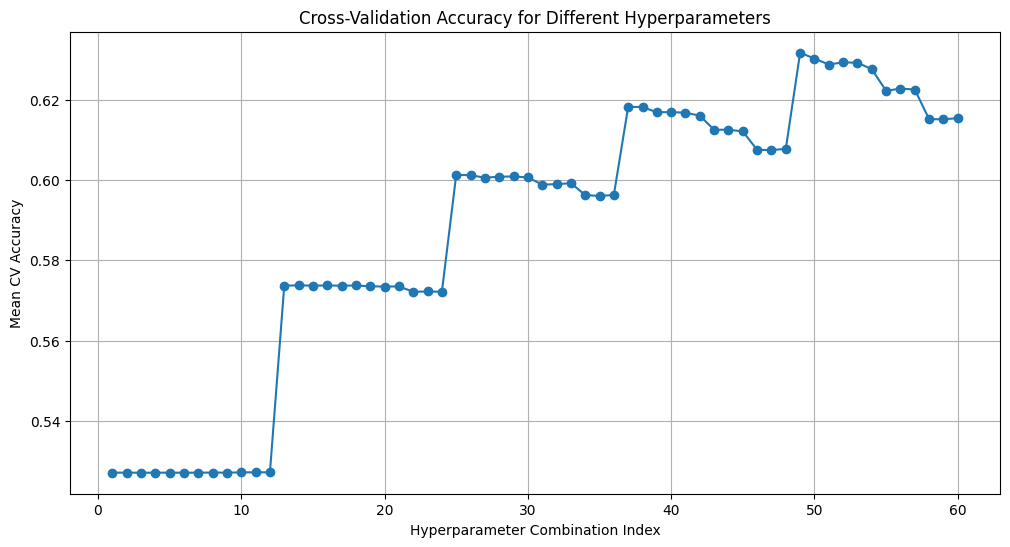

In [29]:
# Plot mean test scores for different hyperparameter combinations
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cv_results_df) + 1), cv_results_df['mean_test_score'], marker='o')
plt.title('Cross-Validation Accuracy for Different Hyperparameters')
plt.xlabel('Hyperparameter Combination Index')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)
plt.show()

In [30]:
# Save to CSV for analysis in Excel, Google Sheets, etc.
cv_results_df.to_csv('Results_3Classes/TFIDF_Models/tfidf_decisionTree_cv_results.csv', index=False)

##### c. Visualizations

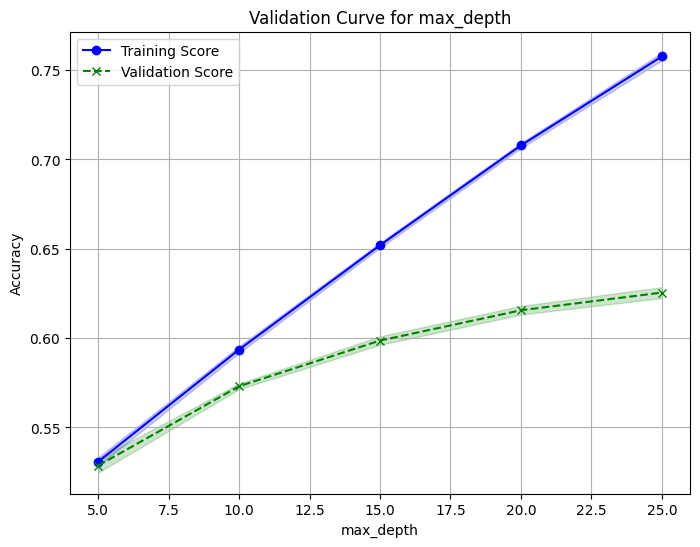

In [31]:
param_range = [5, 10, 15, 20, 25]
train_scores, test_scores = validation_curve(
    dt_classifier, X_train_tfidf, y_train, param_name="max_depth", param_range=param_range,
    scoring="accuracy", cv=5, n_jobs=-1
)


# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mean, label="Training Score", color='blue', marker='o')
plt.plot(param_range, test_mean, label="Validation Score", color='green', linestyle='--', marker='x')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')
plt.title("Validation Curve for max_depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [32]:
# y_pred = dt_grid_search.predict(X_test)
# cm = confusion_matrix(y_test, y_pred)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
# disp.plot(cmap='Blues')
# plt.title("Confusion Matrix")
# plt.show()

#### M2 (Linear SVM)

##### a. Implementation

In [33]:
# -------------------------------
#  SECTION 2: SVM (LinearSVC)
# -------------------------------
print("\n" + "="*50)
print("MODEL 2: LinearSVC")
print("="*50)

# Define model
svm_classifier = LinearSVC(max_iter=10000)

# Define hyperparameter grid
svm_param_grid = {
    'C': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2]
}

# Set up GridSearchCV with 10-fold CV
svm_grid_search = GridSearchCV(
    estimator=svm_classifier,
    param_grid=svm_param_grid,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

# Fit the grid search
svm_grid_search.fit(X_train_tfidf, y_train)

# Evaluate best model
print("\nBest Params (SVM):", svm_grid_search.best_params_)
print("Best CV Score (SVM):", svm_grid_search.best_score_)

# Predict on test data
svm_best = svm_grid_search.best_estimator_
y_pred_svm = svm_best.predict(X_test_tfidf)

# Accuracy & Classification Report
svm_test_accuracy = accuracy_score(y_test, y_pred_svm)
print("Test Accuracy (SVM):", svm_test_accuracy)
print(classification_report(y_test, y_pred_svm))

# Store results
results['SVM'] = {
    'best_params': svm_grid_search.best_params_,
    'best_cv_score': svm_grid_search.best_score_,
    'test_accuracy': svm_test_accuracy,
    'classification_report': classification_report(y_test, y_pred_svm, output_dict=True)
}


MODEL 2: LinearSVC
Fitting 10 folds for each of 6 candidates, totalling 60 fits

Best Params (SVM): {'C': 1}
Best CV Score (SVM): 0.7502857142857143
Test Accuracy (SVM): 0.7487466666666667
              precision    recall  f1-score   support

    negative       0.77      0.84      0.80     15000
     neutral       0.57      0.38      0.46      7500
    positive       0.79      0.85      0.82     15000

    accuracy                           0.75     37500
   macro avg       0.71      0.69      0.69     37500
weighted avg       0.74      0.75      0.74     37500



##### b. Save and store results

In [34]:
# After svm_grid_search.fit(X_train_tfidf, y_train)
svm_cv_results_df = pd.DataFrame(svm_grid_search.cv_results_)

# Print per-fold scores
svm_fold_columns = [col for col in svm_cv_results_df.columns if col.startswith("split") and col.endswith("_test_score")]
svm_cv_fold_scores = svm_cv_results_df[['params', 'mean_test_score', 'std_test_score'] + svm_fold_columns]
print("\n--- SVM: Cross-Validation Scores for Each Fold ---")
print(svm_cv_fold_scores)

# Optionally, save results to CSV
svm_cv_results_df.to_csv('Results_3Classes/TFIDF_Models/tfidf_svm_cv_results.csv', index=False)


--- SVM: Cross-Validation Scores for Each Fold ---
         params  mean_test_score  std_test_score  split0_test_score  \
0  {'C': 0.001}         0.666834        0.004440           0.665486   
1   {'C': 0.01}         0.707794        0.004378           0.705257   
2    {'C': 0.1}         0.746640        0.005819           0.746057   
3      {'C': 1}         0.750286        0.003897           0.748800   
4   {'C': 10.0}         0.741737        0.003131           0.742286   
5  {'C': 100.0}         0.738960        0.003443           0.740114   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.669486           0.661257           0.660114           0.664571   
1           0.710743           0.701943           0.700800           0.709257   
2           0.748686           0.743657           0.733371           0.750400   
3           0.755086           0.750743           0.741600           0.752000   
4           0.743886           0.744114      

#### M3 Random Forest

##### a. Implementation

In [35]:
# -------------------------------
#  SECTION 3: RANDOM FOREST
# -------------------------------
print("\n" + "="*50)
print("MODEL 3: Random Forest")
print("="*50)

# Define model
rf_classifier = RandomForestClassifier()

# Define hyperparameter grid
# Add if model overfits too much
# 'min_samples_split': [2, 5],
# 'min_samples_leaf': [1, 2],
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']   # Usually beneficial for text
}

# Set up GridSearchCV
rf_grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=rf_param_grid,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

# Fit
rf_grid_search.fit(X_train_tfidf, y_train)

print("\nBest Params (Random Forest):", rf_grid_search.best_params_)
print("Best CV Score (Random Forest):", rf_grid_search.best_score_)

# Predict
rf_best = rf_grid_search.best_estimator_
y_pred_rf = rf_best.predict(X_test_tfidf)

rf_test_accuracy = accuracy_score(y_test, y_pred_rf)
print("Test Accuracy (Random Forest):", rf_test_accuracy)
print(classification_report(y_test, y_pred_rf))

# Store results
results['RandomForest'] = {
    'best_params': rf_grid_search.best_params_,
    'best_cv_score': rf_grid_search.best_score_,
    'test_accuracy': rf_test_accuracy,
    'classification_report': classification_report(y_test, y_pred_rf, output_dict=True)
}


MODEL 3: Random Forest
Fitting 10 folds for each of 18 candidates, totalling 180 fits

Best Params (Random Forest): {'max_depth': None, 'max_features': 'log2', 'n_estimators': 300}
Best CV Score (Random Forest): 0.7769714285714284
Test Accuracy (Random Forest): 0.7792
              precision    recall  f1-score   support

    negative       0.77      0.88      0.82     15000
     neutral       0.98      0.32      0.48      7500
    positive       0.76      0.91      0.83     15000

    accuracy                           0.78     37500
   macro avg       0.84      0.70      0.71     37500
weighted avg       0.81      0.78      0.76     37500



##### b. Save and store results

In [36]:
# After rf_grid_search.fit(X_train_tfidf, y_train)
rf_cv_results_df = pd.DataFrame(rf_grid_search.cv_results_)

# Print per-fold scores
rf_fold_columns = [col for col in rf_cv_results_df.columns if col.startswith("split") and col.endswith("_test_score")]
rf_cv_fold_scores = rf_cv_results_df[['params', 'mean_test_score', 'std_test_score'] + rf_fold_columns]
print("\n--- Random Forest: Cross-Validation Scores for Each Fold ---")
print(rf_cv_fold_scores)

# Optionally, save results to CSV
rf_cv_results_df.to_csv('Results_3Classes/TFIDF_Models/tfidf_RandomForest_cv_results.csv', index=False)


--- Random Forest: Cross-Validation Scores for Each Fold ---
                                               params  mean_test_score  \
0   {'max_depth': None, 'max_features': 'sqrt', 'n...         0.769200   
1   {'max_depth': None, 'max_features': 'sqrt', 'n...         0.770583   
2   {'max_depth': None, 'max_features': 'sqrt', 'n...         0.770549   
3   {'max_depth': None, 'max_features': 'log2', 'n...         0.770011   
4   {'max_depth': None, 'max_features': 'log2', 'n...         0.775109   
5   {'max_depth': None, 'max_features': 'log2', 'n...         0.776971   
6   {'max_depth': 10, 'max_features': 'sqrt', 'n_e...         0.639086   
7   {'max_depth': 10, 'max_features': 'sqrt', 'n_e...         0.641566   
8   {'max_depth': 10, 'max_features': 'sqrt', 'n_e...         0.642446   
9   {'max_depth': 10, 'max_features': 'log2', 'n_e...         0.634891   
10  {'max_depth': 10, 'max_features': 'log2', 'n_e...         0.646880   
11  {'max_depth': 10, 'max_features': 'log2', 'n_e

#### M4 kNN

##### a. Implementation

In [37]:
# -------------------------------
#  SECTION 4: kNN
# -------------------------------
print("\n" + "="*50)
print("MODEL 4: kNN")
print("="*50)

knn_classifier = KNeighborsClassifier()

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

knn_grid_search = GridSearchCV(
    estimator=knn_classifier,
    param_grid=knn_param_grid,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

knn_grid_search.fit(X_train_tfidf, y_train)

print("\nBest Params (kNN):", knn_grid_search.best_params_)
print("Best CV Score (kNN):", knn_grid_search.best_score_)

knn_best = knn_grid_search.best_estimator_
y_pred_knn = knn_best.predict(X_test_tfidf)

knn_test_accuracy = accuracy_score(y_test, y_pred_knn)
print("Test Accuracy (kNN):", knn_test_accuracy)
print(classification_report(y_test, y_pred_knn))

results['kNN'] = {
    'best_params': knn_grid_search.best_params_,
    'best_cv_score': knn_grid_search.best_score_,
    'test_accuracy': knn_test_accuracy,
    'classification_report': classification_report(y_test, y_pred_knn, output_dict=True)
}



MODEL 4: kNN
Fitting 10 folds for each of 24 candidates, totalling 240 fits


C:\Users\mm2046\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.62864    0.6452     0.62090286 0.66182857 0.61482286 0.67334857
 0.61248    0.68052571        nan 0.58683429        nan 0.58701714
        nan 0.58665143        nan 0.58656    0.62553143 0.65706286
 0.61516571 0.66826286 0.61227429 0.67744    0.61269714 0.68424   ]
  warnings.warn(
C:\Users\mm2046\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the train scores are non-finite: [0.81138794 0.99984254 0.75687111 0.99985016 0.72071492 0.99985016
 0.69827048 0.99985016        nan 0.99985016        nan 0.99985016
        nan 0.99985016        nan 0.99985016 0.79584254 0.99983111
 0.74219556 0.99983873 0.7148     0.99983873 0.69607238 0.99983873]
  warnings.warn(



Best Params (kNN): {'metric': 'cosine', 'n_neighbors': 9, 'weights': 'distance'}
Best CV Score (kNN): 0.68424
Test Accuracy (kNN): 0.6866666666666666
              precision    recall  f1-score   support

    negative       0.71      0.75      0.73     15000
     neutral       0.60      0.42      0.49      7500
    positive       0.70      0.75      0.72     15000

    accuracy                           0.69     37500
   macro avg       0.67      0.64      0.65     37500
weighted avg       0.68      0.69      0.68     37500



##### b. Save and store results

In [38]:
# After knn_grid_search.fit(X_train_tfidf, y_train)
knn_cv_results_df = pd.DataFrame(knn_grid_search.cv_results_)

# Print per-fold scores
knn_fold_columns = [col for col in knn_cv_results_df.columns if col.startswith("split") and col.endswith("_test_score")]
knn_cv_fold_scores = knn_cv_results_df[['params', 'mean_test_score', 'std_test_score'] + knn_fold_columns]
print("\n--- kNN: Cross-Validation Scores for Each Fold ---")
print(knn_cv_fold_scores)

# Optionally, save results to CSV
knn_cv_results_df.to_csv('Results_3Classes/TFIDF_Models/tfidf_knn_cv_results.csv', index=False)


--- kNN: Cross-Validation Scores for Each Fold ---
                                               params  mean_test_score  \
0   {'metric': 'euclidean', 'n_neighbors': 3, 'wei...         0.628640   
1   {'metric': 'euclidean', 'n_neighbors': 3, 'wei...         0.645200   
2   {'metric': 'euclidean', 'n_neighbors': 5, 'wei...         0.620903   
3   {'metric': 'euclidean', 'n_neighbors': 5, 'wei...         0.661829   
4   {'metric': 'euclidean', 'n_neighbors': 7, 'wei...         0.614823   
5   {'metric': 'euclidean', 'n_neighbors': 7, 'wei...         0.673349   
6   {'metric': 'euclidean', 'n_neighbors': 9, 'wei...         0.612480   
7   {'metric': 'euclidean', 'n_neighbors': 9, 'wei...         0.680526   
8   {'metric': 'manhattan', 'n_neighbors': 3, 'wei...              NaN   
9   {'metric': 'manhattan', 'n_neighbors': 3, 'wei...         0.586834   
10  {'metric': 'manhattan', 'n_neighbors': 5, 'wei...              NaN   
11  {'metric': 'manhattan', 'n_neighbors': 5, 'wei...       

#### M5 Naive Bayes

##### a. Implementation

In [39]:
# -------------------------------
#  SECTION 5: Naïve Bayes
# -------------------------------
print("\n" + "="*50)
print("MODEL 5: Naïve Bayes")
print("="*50)

nb_classifier = MultinomialNB()

nb_param_grid = {
    'alpha': [0.5, 1.0, 1.5]
}

nb_grid_search = GridSearchCV(
    estimator=nb_classifier,
    param_grid=nb_param_grid,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

nb_grid_search.fit(X_train_tfidf, y_train)

print("\nBest Params (Naïve Bayes):", nb_grid_search.best_params_)
print("Best CV Score (Naïve Bayes):", nb_grid_search.best_score_)

nb_best = nb_grid_search.best_estimator_
y_pred_nb = nb_best.predict(X_test_tfidf)

nb_test_accuracy = accuracy_score(y_test, y_pred_nb)
print("Test Accuracy (Naïve Bayes):", nb_test_accuracy)
print(classification_report(y_test, y_pred_nb))

results['NaiveBayes'] = {
    'best_params': nb_grid_search.best_params_,
    'best_cv_score': nb_grid_search.best_score_,
    'test_accuracy': nb_test_accuracy,
    'classification_report': classification_report(y_test, y_pred_nb, output_dict=True)
}


MODEL 5: Naïve Bayes
Fitting 10 folds for each of 3 candidates, totalling 30 fits

Best Params (Naïve Bayes): {'alpha': 0.5}
Best CV Score (Naïve Bayes): 0.7133142857142858
Test Accuracy (Naïve Bayes): 0.7116
              precision    recall  f1-score   support

    negative       0.71      0.83      0.77     15000
     neutral       0.58      0.20      0.30      7500
    positive       0.73      0.85      0.78     15000

    accuracy                           0.71     37500
   macro avg       0.67      0.63      0.62     37500
weighted avg       0.69      0.71      0.68     37500



##### b. Save and store

In [40]:
# After nb_grid_search.fit(X_train_tfidf, y_train)
nb_cv_results_df = pd.DataFrame(nb_grid_search.cv_results_)

# Print per-fold scores
nb_fold_columns = [col for col in nb_cv_results_df.columns if col.startswith("split") and col.endswith("_test_score")]
nb_cv_fold_scores = nb_cv_results_df[['params', 'mean_test_score', 'std_test_score'] + nb_fold_columns]
print("\n--- Naïve Bayes: Cross-Validation Scores for Each Fold ---")
print(nb_cv_fold_scores)

# Optionally, save results to CSV
nb_cv_results_df.to_csv('Results_3Classes/TFIDF_Models/tfidf_NaiveBayes_cv_results.csv', index=False)


--- Naïve Bayes: Cross-Validation Scores for Each Fold ---
           params  mean_test_score  std_test_score  split0_test_score  \
0  {'alpha': 0.5}         0.713314        0.005352           0.707886   
1  {'alpha': 1.0}         0.712834        0.004827           0.708914   
2  {'alpha': 1.5}         0.711131        0.004697           0.706629   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.721486           0.714286           0.706400           0.710286   
1           0.721257           0.712800           0.707771           0.709143   
2           0.718629           0.711543           0.707086           0.708457   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.710400           0.712457           0.719314           0.709029   
1           0.710857           0.710971           0.717029           0.708686   
2           0.708800           0.709486           0.714743           0.706171  

#### Summary

In [41]:
pd.DataFrame(results).T

,best_params,best_cv_score,test_accuracy,classification_report
DecisionTree,"{'max_depth': 25, 'min_samples_leaf': 1, 'min_...",0.631737,0.631733,"{'negative': {'precision': 0.6145585356821669,..."
SVM,{'C': 1},0.750286,0.748747,"{'negative': {'precision': 0.7660757946210269,..."
RandomForest,"{'max_depth': None, 'max_features': 'log2', 'n...",0.776971,0.7792,"{'negative': {'precision': 0.7692576215964626,..."
kNN,"{'metric': 'cosine', 'n_neighbors': 9, 'weight...",0.68424,0.686667,"{'negative': {'precision': 0.7052224853546055,..."
NaiveBayes,{'alpha': 0.5},0.713314,0.7116,"{'negative': {'precision': 0.7136470453373073,..."


### **NLP Method 2:** N-Gram (Tri-Gram)

#### Feature Extraction Method: N-Gram

In [42]:
# ================================
# NLP Method 2: N-Gram Approach
# ================================
print("\n=== NLP Method 2: N-Gram Approach (Unigrams, Bigrams, Trigrams) ===")

from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer for (1,3)
ngram_vectorizer = CountVectorizer(
    ngram_range=(1,3),  # (1,3) => unigrams + bigrams + trigrams
    max_features=10000,
    max_df=0.8
)

# Fit on the same X_train, transform X_train and X_test
X_train_ngram = ngram_vectorizer.fit_transform(X_train)
X_test_ngram = ngram_vectorizer.transform(X_test)

# (Optional) create a dictionary to store the final results for N-Gram method
results_ngram = {}



=== NLP Method 2: N-Gram Approach (Unigrams, Bigrams, Trigrams) ===


#### Model 1: Decision Tree

In [43]:
# -------------------------------
#  SECTION 1: Decision Tree
# -------------------------------

dt_classifier = DecisionTreeClassifier()
dt_param_grid = {
    'max_depth': [10, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

dt_grid_search_ngram = GridSearchCV(
    estimator=dt_classifier,
    param_grid=dt_param_grid,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

In [44]:
print("\n" + "="*50)
print("N-Gram: Decision Tree")
print("="*50)

dt_grid_search_ngram.fit(X_train_ngram, y_train)


N-Gram: Decision Tree
Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'max_depth': [10, 20, 25],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [45]:
print("\nBest Params (N-Gram, Decision Tree):", dt_grid_search_ngram.best_params_)
print("Best CV Score (N-Gram, Decision Tree):", dt_grid_search_ngram.best_score_)


Best Params (N-Gram, Decision Tree): {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best CV Score (N-Gram, Decision Tree): 0.6317600000000001


In [46]:
dt_best_ngram = dt_grid_search_ngram.best_estimator_
y_pred_dt_ngram = dt_best_ngram.predict(X_test_ngram)

dt_test_accuracy_ngram = accuracy_score(y_test, y_pred_dt_ngram)
print("Test Accuracy (N-Gram, Decision Tree):", dt_test_accuracy_ngram)
print(classification_report(y_test, y_pred_dt_ngram))

results_ngram['DecisionTree'] = {
    'best_params': dt_grid_search_ngram.best_params_,
    'best_cv_score': dt_grid_search_ngram.best_score_,
    'test_accuracy': dt_test_accuracy_ngram,
    'classification_report': classification_report(y_test, y_pred_dt_ngram, output_dict=True)
}

# Save cross-validation results to CSV in "Results/NGram_Models"
dt_cv_results_ngram = pd.DataFrame(dt_grid_search_ngram.cv_results_)
dt_cv_results_ngram.to_csv('Results_3Classes/NGram_Models/ngram_decision_tree_cv_results.csv', index=False)

Test Accuracy (N-Gram, Decision Tree): 0.6337866666666667
              precision    recall  f1-score   support

    negative       0.63      0.75      0.68     15000
     neutral       0.52      0.22      0.31      7500
    positive       0.66      0.73      0.69     15000

    accuracy                           0.63     37500
   macro avg       0.60      0.56      0.56     37500
weighted avg       0.62      0.63      0.61     37500



#### M2: Linear SVM

In [47]:
# -------------------------------
#  SECTION 2: Linear SVM
# -------------------------------
svm_classifier = LinearSVC(max_iter=10000)
svm_param_grid = {
    'C': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2]
}

svm_grid_search_ngram = GridSearchCV(
    estimator=svm_classifier,
    param_grid=svm_param_grid,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

In [48]:
print("\n" + "="*50)
print("N-Gram: Linear SVM")
print("="*50)

svm_grid_search_ngram.fit(X_train_ngram, y_train)


N-Gram: Linear SVM
Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=LinearSVC(max_iter=10000), n_jobs=4,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10.0, 100.0]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [49]:
print("\nBest Params (N-Gram, SVM):", svm_grid_search_ngram.best_params_)
print("Best CV Score (N-Gram, SVM):", svm_grid_search_ngram.best_score_)


Best Params (N-Gram, SVM): {'C': 0.01}
Best CV Score (N-Gram, SVM): 0.7452457142857143


In [50]:
svm_best_ngram = svm_grid_search_ngram.best_estimator_
y_pred_svm_ngram = svm_best_ngram.predict(X_test_ngram)

svm_test_accuracy_ngram = accuracy_score(y_test, y_pred_svm_ngram)
print("Test Accuracy (N-Gram, SVM):", svm_test_accuracy_ngram)
print(classification_report(y_test, y_pred_svm_ngram))

results_ngram['SVM'] = {
    'best_params': svm_grid_search_ngram.best_params_,
    'best_cv_score': svm_grid_search_ngram.best_score_,
    'test_accuracy': svm_test_accuracy_ngram,
    'classification_report': classification_report(y_test, y_pred_svm_ngram, output_dict=True)
}

Test Accuracy (N-Gram, SVM): 0.7479733333333334
              precision    recall  f1-score   support

    negative       0.76      0.85      0.80     15000
     neutral       0.61      0.31      0.41      7500
    positive       0.76      0.87      0.81     15000

    accuracy                           0.75     37500
   macro avg       0.71      0.68      0.68     37500
weighted avg       0.73      0.75      0.73     37500



In [51]:
svm_cv_results_ngram = pd.DataFrame(svm_grid_search_ngram.cv_results_)
svm_cv_results_ngram.to_csv('Results_3Classes/NGram_Models/ngram_svm_cv_results.csv', index=False)

#### M3: Random Forest

In [52]:
# -------------------------------
#  SECTION 3: Random Forest
# -------------------------------

rf_classifier = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}

rf_grid_search_ngram = GridSearchCV(
    estimator=rf_classifier,
    param_grid=rf_param_grid,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

In [53]:
print("\n" + "="*50)
print("N-Gram: Random Forest")
print("="*50)
rf_grid_search_ngram.fit(X_train_ngram, y_train)


N-Gram: Random Forest
Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [54]:
print("\nBest Params (N-Gram, Random Forest):", rf_grid_search_ngram.best_params_)
print("Best CV Score (N-Gram, Random Forest):", rf_grid_search_ngram.best_score_)


Best Params (N-Gram, Random Forest): {'max_depth': None, 'max_features': 'log2', 'n_estimators': 300}
Best CV Score (N-Gram, Random Forest): 0.7788685714285715


In [55]:
rf_best_ngram = rf_grid_search_ngram.best_estimator_
y_pred_rf_ngram = rf_best_ngram.predict(X_test_ngram)

rf_test_accuracy_ngram = accuracy_score(y_test, y_pred_rf_ngram)
print("Test Accuracy (N-Gram, Random Forest):", rf_test_accuracy_ngram)
print(classification_report(y_test, y_pred_rf_ngram))

results_ngram['RandomForest'] = {
    'best_params': rf_grid_search_ngram.best_params_,
    'best_cv_score': rf_grid_search_ngram.best_score_,
    'test_accuracy': rf_test_accuracy_ngram,
    'classification_report': classification_report(y_test, y_pred_rf_ngram, output_dict=True)
}

rf_cv_results_ngram = pd.DataFrame(rf_grid_search_ngram.cv_results_)
rf_cv_results_ngram.to_csv('Results_3Classes/NGram_Models/ngram_random_forest_cv_results.csv', index=False)

Test Accuracy (N-Gram, Random Forest): 0.7818133333333334
              precision    recall  f1-score   support

    negative       0.77      0.88      0.82     15000
     neutral       0.98      0.33      0.49      7500
    positive       0.76      0.91      0.83     15000

    accuracy                           0.78     37500
   macro avg       0.84      0.71      0.71     37500
weighted avg       0.81      0.78      0.76     37500



#### M4: kNN

In [56]:
# -------------------------------
#  SECTION 4: kNN
# -------------------------------

from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

knn_grid_search_ngram = GridSearchCV(
    estimator=knn_classifier,
    param_grid=knn_param_grid,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

In [57]:
print("\n" + "="*50)
print("N-Gram: kNN")
print("="*50)

knn_grid_search_ngram.fit(X_train_ngram, y_train)


N-Gram: kNN
Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'metric': ['euclidean', 'manhattan', 'cosine'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy', verbose=2)

In [58]:
print("\nBest Params (N-Gram, kNN):", knn_grid_search_ngram.best_params_)
print("Best CV Score (N-Gram, kNN):", knn_grid_search_ngram.best_score_)


Best Params (N-Gram, kNN): {'metric': 'cosine', 'n_neighbors': 9, 'weights': 'distance'}
Best CV Score (N-Gram, kNN): 0.66088


In [59]:
knn_best_ngram = knn_grid_search_ngram.best_estimator_
y_pred_knn_ngram = knn_best_ngram.predict(X_test_ngram)

knn_test_accuracy_ngram = accuracy_score(y_test, y_pred_knn_ngram)
print("Test Accuracy (N-Gram, kNN):", knn_test_accuracy_ngram)
print(classification_report(y_test, y_pred_knn_ngram))

results_ngram['kNN'] = {
    'best_params': knn_grid_search_ngram.best_params_,
    'best_cv_score': knn_grid_search_ngram.best_score_,
    'test_accuracy': knn_test_accuracy_ngram,
    'classification_report': classification_report(y_test, y_pred_knn_ngram, output_dict=True)
}

Test Accuracy (N-Gram, kNN): 0.6642133333333333
              precision    recall  f1-score   support

    negative       0.66      0.78      0.72     15000
     neutral       0.51      0.47      0.49      7500
    positive       0.75      0.64      0.69     15000

    accuracy                           0.66     37500
   macro avg       0.64      0.63      0.63     37500
weighted avg       0.67      0.66      0.66     37500



In [60]:
knn_cv_results_ngram = pd.DataFrame(knn_grid_search_ngram.cv_results_)
knn_cv_results_ngram.to_csv('Results_3Classes/NGram_Models/ngram_knn_cv_results.csv', index=False)

#### M5: Naive Bayes

In [61]:
# -------------------------------
#  SECTION 5: Naïve Bayes
# -------------------------------

nb_classifier = MultinomialNB()
nb_param_grid = {
    'alpha': [0.5, 1.0, 1.5]
}

nb_grid_search_ngram = GridSearchCV(
    estimator=nb_classifier,
    param_grid=nb_param_grid,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

In [62]:
print("\n" + "="*50)
print("N-Gram: Naïve Bayes")
print("="*50)

nb_grid_search_ngram.fit(X_train_ngram, y_train)


N-Gram: Naïve Bayes
Fitting 10 folds for each of 3 candidates, totalling 30 fits


GridSearchCV(cv=10, estimator=MultinomialNB(), n_jobs=4,
             param_grid={'alpha': [0.5, 1.0, 1.5]}, return_train_score=True,
             scoring='accuracy', verbose=2)

In [63]:
print("\nBest Params (N-Gram, Naïve Bayes):", nb_grid_search_ngram.best_params_)
print("Best CV Score (N-Gram, Naïve Bayes):", nb_grid_search_ngram.best_score_)


Best Params (N-Gram, Naïve Bayes): {'alpha': 1.5}
Best CV Score (N-Gram, Naïve Bayes): 0.6744571428571428


In [64]:
nb_best_ngram = nb_grid_search_ngram.best_estimator_
y_pred_nb_ngram = nb_best_ngram.predict(X_test_ngram)

nb_test_accuracy_ngram = accuracy_score(y_test, y_pred_nb_ngram)
print("Test Accuracy (N-Gram, Naïve Bayes):", nb_test_accuracy_ngram)
print(classification_report(y_test, y_pred_nb_ngram))

results_ngram['NaiveBayes'] = {
    'best_params': nb_grid_search_ngram.best_params_,
    'best_cv_score': nb_grid_search_ngram.best_score_,
    'test_accuracy': nb_test_accuracy_ngram,
    'classification_report': classification_report(y_test, y_pred_nb_ngram, output_dict=True)
}

Test Accuracy (N-Gram, Naïve Bayes): 0.6730133333333334
              precision    recall  f1-score   support

    negative       0.78      0.64      0.70     15000
     neutral       0.40      0.52      0.45      7500
    positive       0.76      0.79      0.77     15000

    accuracy                           0.67     37500
   macro avg       0.65      0.65      0.64     37500
weighted avg       0.70      0.67      0.68     37500



In [65]:
nb_cv_results_ngram = pd.DataFrame(nb_grid_search_ngram.cv_results_)
nb_cv_results_ngram.to_csv('Results_3Classes/NGram_Models/ngram_naive_bayes_cv_results.csv', index=False)

#### Summary of Results

In [66]:
# ================================
# FINAL SUMMARY FOR N-GRAM
# ================================
print("\n=== Final Results (N-Gram) ===")
pd.DataFrame(results_ngram).T


=== Final Results (N-Gram) ===


,best_params,best_cv_score,test_accuracy,classification_report
DecisionTree,"{'max_depth': 25, 'min_samples_leaf': 1, 'min_...",0.63176,0.633787,"{'negative': {'precision': 0.6298354949188704,..."
SVM,{'C': 0.01},0.745246,0.747973,"{'negative': {'precision': 0.7614447711045779,..."
RandomForest,"{'max_depth': None, 'max_features': 'log2', 'n...",0.778869,0.781813,"{'negative': {'precision': 0.7717929307634077,..."
kNN,"{'metric': 'cosine', 'n_neighbors': 9, 'weight...",0.66088,0.664213,"{'negative': {'precision': 0.6632526029877773,..."
NaiveBayes,{'alpha': 1.5},0.674457,0.673013,"{'negative': {'precision': 0.7823948856651094,..."


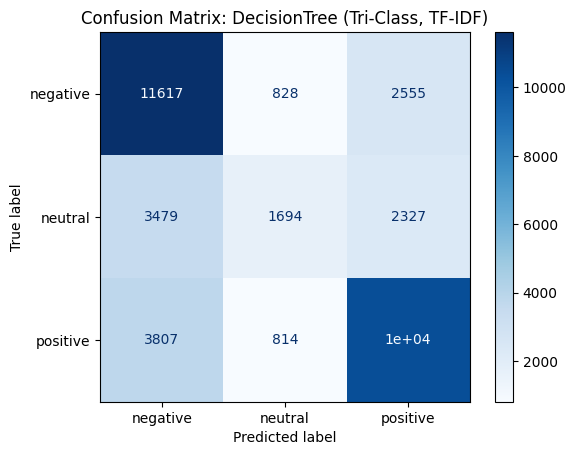

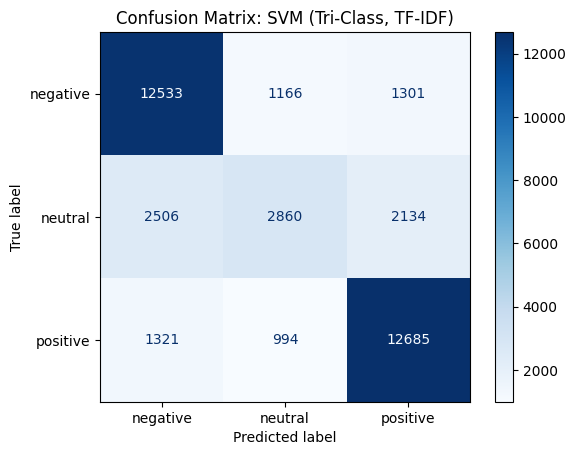

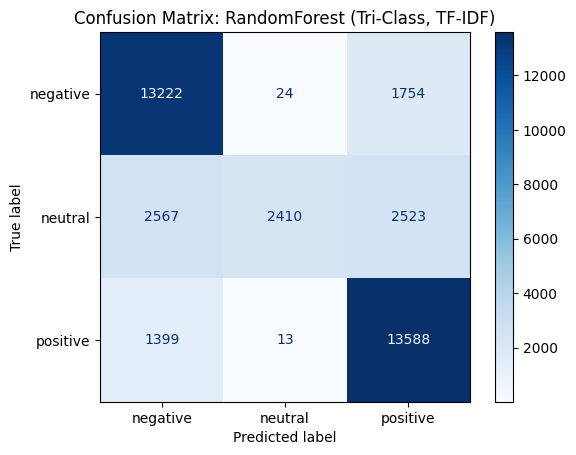

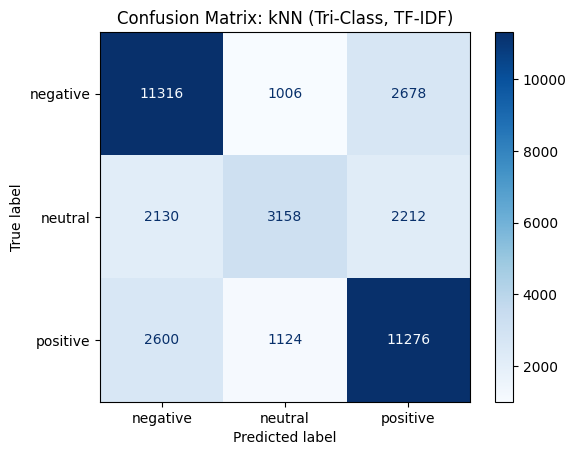

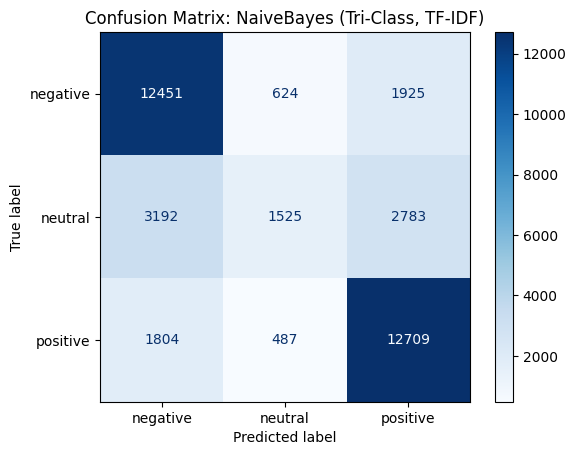

In [134]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
 
# Dictionary of your best models for Tri-Class classification (TF-IDF)
models_triclass = {
    "DecisionTree": dt_best,       # from your dt_grid_search
    "SVM": svm_best,               # from your svm_grid_search
    "RandomForest": rf_best,       # from your rf_grid_search
    "kNN": knn_best,               # from your knn_grid_search
    "NaiveBayes": nb_best          # from your nb_grid_search
}
 
# Generate and display the confusion matrix for each model
for model_name, model in models_triclass.items():
    y_pred = model.predict(X_test_tfidf)         # X_test_tfidf from your Tri-Class TF-IDF setup
    cm = confusion_matrix(y_test, y_pred)        # y_test is your Tri-Class test labels
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, 
        display_labels=model.classes_            # Ensures the labels match your model’s classes
    )
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name} (Tri-Class, TF-IDF)")
    plt.show()

## 🔵 Classification Dual-Class (General)

### Make a copy of the preprocessed data

In [67]:
df_preprocessed_2C = pd.read_csv('Datasets/preprocessed_reviews.csv')
df_preprocessed_2C.head()

,ProductId,Score,Text,Sentiment,Preprocessed_Review
0,B008COIXOG,5,i just recently visited my nearby fresh and ea...,positive,recently visit nearby fresh easy market saw ad...
1,B004VLVG0C,5,this works great i followed the recipe on the ...,positive,work great follow recipe back bag except put i...
2,B000FL0A9K,2,personal preference too sweet tastes like gene...,negative,personal preference sweet taste like general f...
3,B0015MY6PC,5,my daughter loves these snacks she doesnt care...,positive,daughter love snack not care something sour ea...
4,B000LTIDR2,3,i would not recommend buying this product beca...,neutral,would not recommend buy product large quantity...


In [68]:
df_preprocessed_2C.shape

(125000, 5)

### Remove 3 Star Reviews

In [69]:
# Remove all neutral sentiment reviews to create a dual-class dataset
df_preprocessed_2C = df_preprocessed_2C[df_preprocessed_2C['Sentiment'] != 'neutral'].copy()

# Verify the distribution of sentiment classes
print("Updated Class Distribution (Dual-Class General):")
print(df_preprocessed_2C['Sentiment'].value_counts())

# Display the first few rows to confirm changes
df_preprocessed_2C.head()

Updated Class Distribution (Dual-Class General):
Sentiment
positive    50000
negative    50000
Name: count, dtype: int64


,ProductId,Score,Text,Sentiment,Preprocessed_Review
0,B008COIXOG,5,i just recently visited my nearby fresh and ea...,positive,recently visit nearby fresh easy market saw ad...
1,B004VLVG0C,5,this works great i followed the recipe on the ...,positive,work great follow recipe back bag except put i...
2,B000FL0A9K,2,personal preference too sweet tastes like gene...,negative,personal preference sweet taste like general f...
3,B0015MY6PC,5,my daughter loves these snacks she doesnt care...,positive,daughter love snack not care something sour ea...
5,B001E5DYT4,5,illy medium roast is one the best ground coffe...,positive,illy medium roast one best ground coffee aroun...


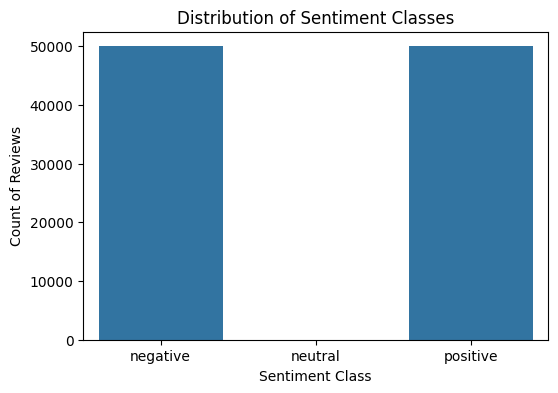

In [70]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df_preprocessed_2C, order=['negative','neutral','positive'])  # or remove 'order' if you want auto-sorting
plt.title("Distribution of Sentiment Classes")
plt.xlabel("Sentiment Class")
plt.ylabel("Count of Reviews")
plt.show()

In [71]:
df_preprocessed_2C.shape

(100000, 5)

### Train/Test Split

#### Define Features (Preprocessed Text) and Target (Sentiment)

In [72]:
# Define Features (Preprocessed Text) and Target (Sentiment) for Dual-Class (General)
X_2C = df_preprocessed_2C['Preprocessed_Review']
y_2C = df_preprocessed_2C['Sentiment']

In [73]:
df_preprocessed_2C.head()

,ProductId,Score,Text,Sentiment,Preprocessed_Review
0,B008COIXOG,5,i just recently visited my nearby fresh and ea...,positive,recently visit nearby fresh easy market saw ad...
1,B004VLVG0C,5,this works great i followed the recipe on the ...,positive,work great follow recipe back bag except put i...
2,B000FL0A9K,2,personal preference too sweet tastes like gene...,negative,personal preference sweet taste like general f...
3,B0015MY6PC,5,my daughter loves these snacks she doesnt care...,positive,daughter love snack not care something sour ea...
5,B001E5DYT4,5,illy medium roast is one the best ground coffe...,positive,illy medium roast one best ground coffee aroun...


#### Split Data for Training

In [74]:
# Train/Test Split for Dual-Class (General)
X_train_2C, X_test_2C, y_train_2C, y_test_2C = train_test_split(
    X_2C, 
    y_2C, 
    test_size=0.3,  # Keeping 70-30 split
    random_state=42, 
    stratify=y_2C  # Ensures class balance in train-test split
)

# Confirm the new distribution
print(y_train_2C.value_counts())
print(y_test_2C.value_counts())

Sentiment
negative    35000
positive    35000
Name: count, dtype: int64
Sentiment
positive    15000
negative    15000
Name: count, dtype: int64


### **NLP Method 1:** Term Frequency-Inverse Document Frequency (TF-IDF)
Here, we run each model separately—each with its own hyperparameter tuning and 10-fold cross-validation.

#### Feature Extraction Method : TFIDF Setup

In [75]:
# TF-IDF Transformation for Dual-Class (General)
tfidf_vectorizer_2C = TfidfVectorizer(
    max_features=10000,  # Keeping same as Tri-Class
    ngram_range=(1,2),  # Unigram and Bigram
    max_df=0.8,
    sublinear_tf=True
)

# Fit on training data and transform
X_train_tfidf_2C = tfidf_vectorizer_2C.fit_transform(X_train_2C)
X_test_tfidf_2C = tfidf_vectorizer_2C.transform(X_test_2C)

# Create a dictionary to store the final results from each model (optional)
results_2C = {}

# Verify shape of transformed feature set
print(f"TF-IDF Train Shape: {X_train_tfidf_2C.shape}")
print(f"TF-IDF Test Shape: {X_test_tfidf_2C.shape}")

TF-IDF Train Shape: (70000, 10000)
TF-IDF Test Shape: (30000, 10000)


#### M1 (Decision Tree)

##### a. Implementation

In [76]:
# -------------------------------
#  SECTION 1: DECISION TREE (Dual-Class General)
# -------------------------------
print("\n" + "="*50)
print("MODEL 1: Decision Tree (Dual-Class General)")
print("="*50)

# Define model
dt_classifier_2C = DecisionTreeClassifier()

# Define hyperparameter grid
dt_param_grid_2C = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
}

# Set up GridSearchCV with 10-fold CV
dt_grid_search_2C = GridSearchCV(
    estimator=dt_classifier_2C,
    param_grid=dt_param_grid_2C,
    scoring='accuracy',  
    cv=10,
    n_jobs=4,  # Adjust CPU usage
    verbose=2,
    return_train_score=True
)


MODEL 1: Decision Tree (Dual-Class General)


In [77]:
# Fit GridSearch on the TF-IDF training data
dt_grid_search_2C.fit(X_train_tfidf_2C, y_train_2C)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [78]:
# Evaluate best model
print("\nBest Params (Decision Tree - Dual-Class General):", dt_grid_search_2C.best_params_)
print("Best CV Score (Decision Tree - Dual-Class General):", dt_grid_search_2C.best_score_)


Best Params (Decision Tree - Dual-Class General): {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Score (Decision Tree - Dual-Class General): 0.7753857142857143


In [79]:
# Predict on test data
dt_best_2C = dt_grid_search_2C.best_estimator_  # Get the best model
y_pred_dt_2C = dt_best_2C.predict(X_test_tfidf_2C)  # Predict on test data

In [80]:
# Accuracy & Classification Report
dt_test_accuracy_2C = accuracy_score(y_test_2C, y_pred_dt_2C)
print("Test Accuracy (Decision Tree - Dual-Class General):", dt_test_accuracy_2C)
print(classification_report(y_test_2C, y_pred_dt_2C))

# Store results
results_2C['DecisionTree'] = {
    'best_params': dt_grid_search_2C.best_params_,
    'best_cv_score': dt_grid_search_2C.best_score_,
    'test_accuracy': dt_test_accuracy_2C,
    'classification_report': classification_report(y_test_2C, y_pred_dt_2C, output_dict=True)
}

Test Accuracy (Decision Tree - Dual-Class General): 0.7755666666666666
              precision    recall  f1-score   support

    negative       0.75      0.82      0.78     15000
    positive       0.80      0.73      0.77     15000

    accuracy                           0.78     30000
   macro avg       0.78      0.78      0.78     30000
weighted avg       0.78      0.78      0.78     30000



##### b. Save Results

In [81]:
# Save Decision Tree results to a JSON file
with open('Results_2C(General)/TFIDF_Models/tfidf_decisionTree_2C_results.json', 'w') as f:
    json.dump(results_2C['DecisionTree'], f, indent=4)

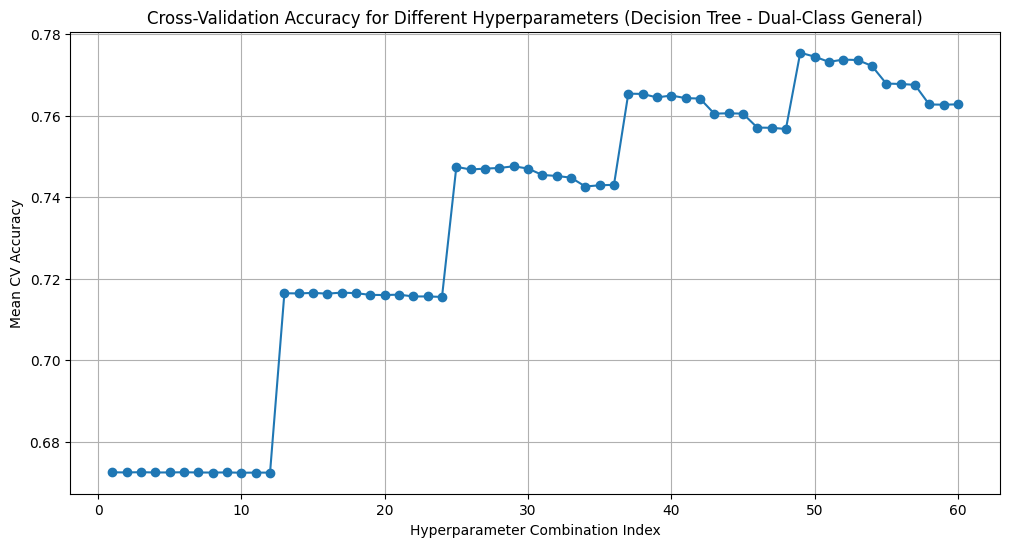

In [83]:
# Convert cross-validation results to DataFrame and save
cv_results_df_2C = pd.DataFrame(dt_grid_search_2C.cv_results_)
cv_results_df_2C.to_csv('Results_2C(General)/TFIDF_Models/tfidf_decisionTree_2C_cv_results.csv', index=False)

# Plot mean test scores for different hyperparameter combinations
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cv_results_df_2C) + 1), cv_results_df_2C['mean_test_score'], marker='o')
plt.title('Cross-Validation Accuracy for Different Hyperparameters (Decision Tree - Dual-Class General)')
plt.xlabel('Hyperparameter Combination Index')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)
plt.show()

##### c. Visualizations

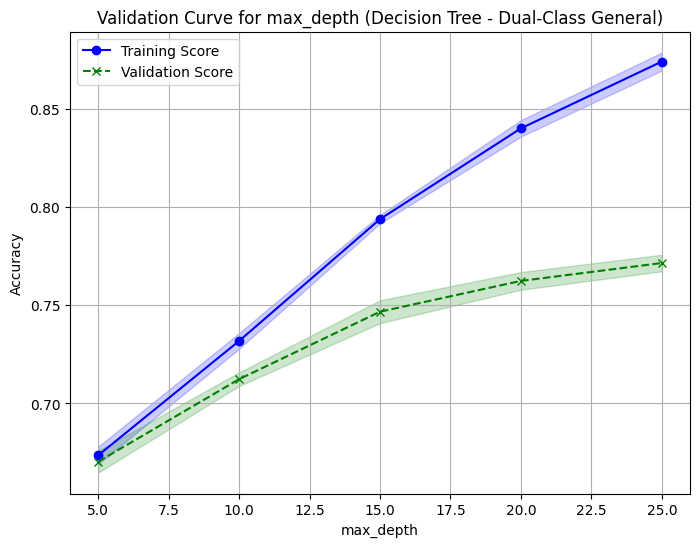

In [84]:
# -------------------------------
#  Validation Curve Visualization (Decision Tree - Dual-Class General)
# -------------------------------
param_range_2C = [5, 10, 15, 20, 25]

# Compute validation curve
train_scores_2C, test_scores_2C = validation_curve(
    dt_classifier_2C, X_train_tfidf_2C, y_train_2C, param_name="max_depth", 
    param_range=param_range_2C, scoring="accuracy", cv=5, n_jobs=-1
)

# Calculate mean and standard deviation for training and validation scores
train_mean_2C = np.mean(train_scores_2C, axis=1)
test_mean_2C = np.mean(test_scores_2C, axis=1)
train_std_2C = np.std(train_scores_2C, axis=1)
test_std_2C = np.std(test_scores_2C, axis=1)

# Plot validation curve
plt.figure(figsize=(8, 6))
plt.plot(param_range_2C, train_mean_2C, label="Training Score", color='blue', marker='o')
plt.plot(param_range_2C, test_mean_2C, label="Validation Score", color='green', linestyle='--', marker='x')

# Fill areas for standard deviation
plt.fill_between(param_range_2C, train_mean_2C - train_std_2C, train_mean_2C + train_std_2C, alpha=0.2, color='blue')
plt.fill_between(param_range_2C, test_mean_2C - test_std_2C, test_mean_2C + test_std_2C, alpha=0.2, color='green')

plt.title("Validation Curve for max_depth (Decision Tree - Dual-Class General)")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

#### M2 (Linear SVM)

##### a. Implementation

In [85]:
# -------------------------------
#  SECTION: SVM (LinearSVC) - Dual-Class General
# -------------------------------
print("\n" + "="*50)
print("MODEL: LinearSVC (Dual-Class General)")
print("="*50)

# Define model
svm_classifier_2C = LinearSVC(max_iter=10000)

# Define hyperparameter grid
svm_param_grid_2C = {
    'C': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2]
}

# Set up GridSearchCV with 10-fold CV
svm_grid_search_2C = GridSearchCV(
    estimator=svm_classifier_2C,
    param_grid=svm_param_grid_2C,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

# Fit the grid search
svm_grid_search_2C.fit(X_train_tfidf_2C, y_train_2C)

# Evaluate best model
print("\nBest Params (SVM - Dual-Class General):", svm_grid_search_2C.best_params_)
print("Best CV Score (SVM - Dual-Class General):", svm_grid_search_2C.best_score_)

# Predict on test data
svm_best_2C = svm_grid_search_2C.best_estimator_
y_pred_svm_2C = svm_best_2C.predict(X_test_tfidf_2C)


MODEL: LinearSVC (Dual-Class General)
Fitting 10 folds for each of 6 candidates, totalling 60 fits

Best Params (SVM - Dual-Class General): {'C': 1}
Best CV Score (SVM - Dual-Class General): 0.8918571428571427


In [86]:
# Accuracy & Classification Report
svm_test_accuracy_2C = accuracy_score(y_test_2C, y_pred_svm_2C)
print("Test Accuracy (SVM - Dual-Class General):", svm_test_accuracy_2C)
print(classification_report(y_test_2C, y_pred_svm_2C))

# Store results
results_2C['SVM'] = {
    'best_params': svm_grid_search_2C.best_params_,
    'best_cv_score': svm_grid_search_2C.best_score_,
    'test_accuracy': svm_test_accuracy_2C,
    'classification_report': classification_report(y_test_2C, y_pred_svm_2C, output_dict=True)
}

Test Accuracy (SVM - Dual-Class General): 0.8937
              precision    recall  f1-score   support

    negative       0.89      0.90      0.89     15000
    positive       0.90      0.89      0.89     15000

    accuracy                           0.89     30000
   macro avg       0.89      0.89      0.89     30000
weighted avg       0.89      0.89      0.89     30000



##### b. Save and store results

In [87]:
# -------------------------------
#  Save and Store Results for SVM - Dual-Class General
# -------------------------------

# After svm_grid_search_2C.fit(X_train_tfidf_2C, y_train_2C)
svm_cv_results_df_2C = pd.DataFrame(svm_grid_search_2C.cv_results_)

# Print per-fold scores
svm_fold_columns_2C = [col for col in svm_cv_results_df_2C.columns if col.startswith("split") and col.endswith("_test_score")]
svm_cv_fold_scores_2C = svm_cv_results_df_2C[['params', 'mean_test_score', 'std_test_score'] + svm_fold_columns_2C]

print("\n--- SVM: Cross-Validation Scores for Each Fold (Dual-Class General) ---")
print(svm_cv_fold_scores_2C)

# Optionally, save results to CSV
svm_cv_results_df_2C.to_csv('Results_2C(General)/TFIDF_Models/tfidf_dualClass_svm_cv_results.csv', index=False)


--- SVM: Cross-Validation Scores for Each Fold (Dual-Class General) ---
         params  mean_test_score  std_test_score  split0_test_score  \
0  {'C': 0.001}         0.831486        0.004109           0.827143   
1   {'C': 0.01}         0.864229        0.004590           0.858000   
2    {'C': 0.1}         0.890571        0.004078           0.885429   
3      {'C': 1}         0.891857        0.004035           0.887714   
4   {'C': 10.0}         0.879657        0.004079           0.879000   
5  {'C': 100.0}         0.868929        0.003686           0.866857   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.827571           0.835857           0.833571           0.825857   
1           0.860429           0.867143           0.866571           0.856714   
2           0.888429           0.895429           0.890143           0.886714   
3           0.890714           0.895857           0.892714           0.887857   
4           0.880714    

#### M3 (Random Forest)

##### a. Implementation

In [88]:
# -------------------------------
#  SECTION: Random Forest (Dual-Class General)
# -------------------------------
print("\n" + "="*50)
print("MODEL: Random Forest (Dual-Class General)")
print("="*50)

# Define model
rf_classifier_2C = RandomForestClassifier()

# Define hyperparameter grid
rf_param_grid_2C = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}

# Set up GridSearchCV
rf_grid_search_2C = GridSearchCV(
    estimator=rf_classifier_2C,
    param_grid=rf_param_grid_2C,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

# Fit
rf_grid_search_2C.fit(X_train_tfidf_2C, y_train_2C)

print("\nBest Params (Random Forest - Dual-Class General):", rf_grid_search_2C.best_params_)
print("Best CV Score (Random Forest - Dual-Class General):", rf_grid_search_2C.best_score_)

# Predict
rf_best_2C = rf_grid_search_2C.best_estimator_
y_pred_rf_2C = rf_best_2C.predict(X_test_tfidf_2C)


MODEL: Random Forest (Dual-Class General)
Fitting 10 folds for each of 18 candidates, totalling 180 fits

Best Params (Random Forest - Dual-Class General): {'max_depth': None, 'max_features': 'log2', 'n_estimators': 300}
Best CV Score (Random Forest - Dual-Class General): 0.8950714285714285


In [89]:
# Accuracy & Classification Report
rf_test_accuracy_2C = accuracy_score(y_test_2C, y_pred_rf_2C)
print("Test Accuracy (Random Forest - Dual-Class General):", rf_test_accuracy_2C)
print(classification_report(y_test_2C, y_pred_rf_2C))

# Store results
results_2C['RandomForest'] = {
    'best_params': rf_grid_search_2C.best_params_,
    'best_cv_score': rf_grid_search_2C.best_score_,
    'test_accuracy': rf_test_accuracy_2C,
    'classification_report': classification_report(y_test_2C, y_pred_rf_2C, output_dict=True)
}

Test Accuracy (Random Forest - Dual-Class General): 0.8965666666666666
              precision    recall  f1-score   support

    negative       0.90      0.89      0.90     15000
    positive       0.89      0.90      0.90     15000

    accuracy                           0.90     30000
   macro avg       0.90      0.90      0.90     30000
weighted avg       0.90      0.90      0.90     30000



##### b. Save and Store Results

In [90]:
# Convert cv_results_ to DataFrame and view per-fold scores
rf_cv_results_df_2C = pd.DataFrame(rf_grid_search_2C.cv_results_)

rf_fold_columns_2C = [col for col in rf_cv_results_df_2C.columns if col.startswith("split") and col.endswith("_test_score")]
rf_cv_fold_scores_2C = rf_cv_results_df_2C[['params', 'mean_test_score', 'std_test_score'] + rf_fold_columns_2C]

print("\n--- Random Forest: Cross-Validation Scores for Each Fold (Dual-Class General) ---")
print(rf_cv_fold_scores_2C)

# Save results to CSV using your naming convention
rf_cv_results_df_2C.to_csv('Results_2C(General)/TFIDF_Models/tfidf_dualClass_randomForest_cv_results.csv', index=False)


--- Random Forest: Cross-Validation Scores for Each Fold (Dual-Class General) ---
                                               params  mean_test_score  \
0   {'max_depth': None, 'max_features': 'sqrt', 'n...         0.882043   
1   {'max_depth': None, 'max_features': 'sqrt', 'n...         0.885429   
2   {'max_depth': None, 'max_features': 'sqrt', 'n...         0.886357   
3   {'max_depth': None, 'max_features': 'log2', 'n...         0.886986   
4   {'max_depth': None, 'max_features': 'log2', 'n...         0.892071   
5   {'max_depth': None, 'max_features': 'log2', 'n...         0.895071   
6   {'max_depth': 10, 'max_features': 'sqrt', 'n_e...         0.804757   
7   {'max_depth': 10, 'max_features': 'sqrt', 'n_e...         0.807071   
8   {'max_depth': 10, 'max_features': 'sqrt', 'n_e...         0.809429   
9   {'max_depth': 10, 'max_features': 'log2', 'n_e...         0.793286   
10  {'max_depth': 10, 'max_features': 'log2', 'n_e...         0.810600   
11  {'max_depth': 10, 'max_fe

#### M4 (kNN)

##### a. Implementation

In [91]:
# -------------------------------
#  SECTION: kNN (Dual-Class General)
# -------------------------------
print("\n" + "="*50)
print("MODEL: kNN (Dual-Class General)")
print("="*50)

# Define model
knn_classifier_2C = KNeighborsClassifier()

# Define hyperparameter grid
knn_param_grid_2C = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

# Set up GridSearchCV
knn_grid_search_2C = GridSearchCV(
    estimator=knn_classifier_2C,
    param_grid=knn_param_grid_2C,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

# Fit
knn_grid_search_2C.fit(X_train_tfidf_2C, y_train_2C)

print("\nBest Params (kNN - Dual-Class General):", knn_grid_search_2C.best_params_)
print("Best CV Score (kNN - Dual-Class General):", knn_grid_search_2C.best_score_)

# Predict
knn_best_2C = knn_grid_search_2C.best_estimator_
y_pred_knn_2C = knn_best_2C.predict(X_test_tfidf_2C)



MODEL: kNN (Dual-Class General)
Fitting 10 folds for each of 24 candidates, totalling 240 fits


C:\Users\mm2046\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.75551429 0.77532857 0.7575     0.78664286 0.75764286 0.79267143
 0.75957143 0.79812857        nan 0.65942857        nan 0.65762857
        nan 0.65812857        nan 0.66152857 0.75551429 0.77544286
 0.7575     0.78685714 0.75764286 0.79288571 0.75957143 0.79834286]
  warnings.warn(
C:\Users\mm2046\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the train scores are non-finite: [0.8783381  0.9999619  0.84246349 0.9999619  0.82698095 0.9999619
 0.81643492 0.9999619         nan 0.9999619         nan 0.9999619
        nan 0.9999619         nan 0.9999619  0.87833968 0.9999619
 0.84246349 0.9999619  0.82698095 0.9999619  0.81643651 0.9999619 ]
  warnings.warn(



Best Params (kNN - Dual-Class General): {'metric': 'cosine', 'n_neighbors': 9, 'weights': 'distance'}
Best CV Score (kNN - Dual-Class General): 0.7983428571428571


In [92]:

# Accuracy & Classification Report
knn_test_accuracy_2C = accuracy_score(y_test_2C, y_pred_knn_2C)
print("Test Accuracy (kNN - Dual-Class General):", knn_test_accuracy_2C)
print(classification_report(y_test_2C, y_pred_knn_2C))

# Store results
results_2C['kNN'] = {
    'best_params': knn_grid_search_2C.best_params_,
    'best_cv_score': knn_grid_search_2C.best_score_,
    'test_accuracy': knn_test_accuracy_2C,
    'classification_report': classification_report(y_test_2C, y_pred_knn_2C, output_dict=True)
}

Test Accuracy (kNN - Dual-Class General): 0.8016333333333333
              precision    recall  f1-score   support

    negative       0.80      0.80      0.80     15000
    positive       0.80      0.80      0.80     15000

    accuracy                           0.80     30000
   macro avg       0.80      0.80      0.80     30000
weighted avg       0.80      0.80      0.80     30000



##### b. Save and Store results

In [93]:
# Cross-validation results
knn_cv_results_df_2C = pd.DataFrame(knn_grid_search_2C.cv_results_)
knn_fold_columns_2C = [col for col in knn_cv_results_df_2C.columns if col.startswith("split") and col.endswith("_test_score")]
knn_cv_fold_scores_2C = knn_cv_results_df_2C[['params', 'mean_test_score', 'std_test_score'] + knn_fold_columns_2C]

print("\n--- kNN: Cross-Validation Scores for Each Fold (Dual-Class General) ---")
print(knn_cv_fold_scores_2C)

# Save results to CSV
knn_cv_results_df_2C.to_csv('Results_2C(General)/TFIDF_Models/tfidf_dualClass_kNN_cv_results.csv', index=False)


--- kNN: Cross-Validation Scores for Each Fold (Dual-Class General) ---
                                               params  mean_test_score  \
0   {'metric': 'euclidean', 'n_neighbors': 3, 'wei...         0.755514   
1   {'metric': 'euclidean', 'n_neighbors': 3, 'wei...         0.775329   
2   {'metric': 'euclidean', 'n_neighbors': 5, 'wei...         0.757500   
3   {'metric': 'euclidean', 'n_neighbors': 5, 'wei...         0.786643   
4   {'metric': 'euclidean', 'n_neighbors': 7, 'wei...         0.757643   
5   {'metric': 'euclidean', 'n_neighbors': 7, 'wei...         0.792671   
6   {'metric': 'euclidean', 'n_neighbors': 9, 'wei...         0.759571   
7   {'metric': 'euclidean', 'n_neighbors': 9, 'wei...         0.798129   
8   {'metric': 'manhattan', 'n_neighbors': 3, 'wei...              NaN   
9   {'metric': 'manhattan', 'n_neighbors': 3, 'wei...         0.659429   
10  {'metric': 'manhattan', 'n_neighbors': 5, 'wei...              NaN   
11  {'metric': 'manhattan', 'n_neighbor

#### M5 (Naive Bayes)

##### a. Implementation

In [94]:
# -------------------------------
#  SECTION: Naïve Bayes (Dual-Class General)
# -------------------------------
print("\n" + "="*50)
print("MODEL: Naïve Bayes (Dual-Class General)")
print("="*50)

# Define model
nb_classifier_2C = MultinomialNB()

# Define hyperparameter grid
nb_param_grid_2C = {
    'alpha': [0.5, 1.0, 1.5]
}

# Set up GridSearchCV
nb_grid_search_2C = GridSearchCV(
    estimator=nb_classifier_2C,
    param_grid=nb_param_grid_2C,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

# Fit
nb_grid_search_2C.fit(X_train_tfidf_2C, y_train_2C)

print("\nBest Params (Naïve Bayes - Dual-Class General):", nb_grid_search_2C.best_params_)
print("Best CV Score (Naïve Bayes - Dual-Class General):", nb_grid_search_2C.best_score_)

# Predict
nb_best_2C = nb_grid_search_2C.best_estimator_
y_pred_nb_2C = nb_best_2C.predict(X_test_tfidf_2C)



MODEL: Naïve Bayes (Dual-Class General)
Fitting 10 folds for each of 3 candidates, totalling 30 fits

Best Params (Naïve Bayes - Dual-Class General): {'alpha': 1.5}
Best CV Score (Naïve Bayes - Dual-Class General): 0.8635571428571428


In [95]:
# Accuracy & Classification Report
nb_test_accuracy_2C = accuracy_score(y_test_2C, y_pred_nb_2C)
print("Test Accuracy (Naïve Bayes - Dual-Class General):", nb_test_accuracy_2C)
print(classification_report(y_test_2C, y_pred_nb_2C))

# Store results
results_2C['NaiveBayes'] = {
    'best_params': nb_grid_search_2C.best_params_,
    'best_cv_score': nb_grid_search_2C.best_score_,
    'test_accuracy': nb_test_accuracy_2C,
    'classification_report': classification_report(y_test_2C, y_pred_nb_2C, output_dict=True)
}

Test Accuracy (Naïve Bayes - Dual-Class General): 0.865
              precision    recall  f1-score   support

    negative       0.87      0.86      0.86     15000
    positive       0.86      0.87      0.87     15000

    accuracy                           0.86     30000
   macro avg       0.87      0.86      0.86     30000
weighted avg       0.87      0.86      0.86     30000



##### b. Save and store results

In [96]:

# Cross-validation results
nb_cv_results_df_2C = pd.DataFrame(nb_grid_search_2C.cv_results_)
nb_fold_columns_2C = [col for col in nb_cv_results_df_2C.columns if col.startswith("split") and col.endswith("_test_score")]
nb_cv_fold_scores_2C = nb_cv_results_df_2C[['params', 'mean_test_score', 'std_test_score'] + nb_fold_columns_2C]

print("\n--- Naïve Bayes: Cross-Validation Scores for Each Fold (Dual-Class General) ---")
print(nb_cv_fold_scores_2C)

# Save results to CSV
nb_cv_results_df_2C.to_csv('Results_2C(General)/TFIDF_Models/tfidf_dualClass_naiveBayes_cv_results.csv', index=False)


--- Naïve Bayes: Cross-Validation Scores for Each Fold (Dual-Class General) ---
           params  mean_test_score  std_test_score  split0_test_score  \
0  {'alpha': 0.5}         0.863514        0.003977           0.857286   
1  {'alpha': 1.0}         0.863529        0.004146           0.857714   
2  {'alpha': 1.5}         0.863557        0.003917           0.858571   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.865286           0.870143           0.859857           0.859429   
1           0.864571           0.870571           0.858857           0.859429   
2           0.864143           0.871143           0.859571           0.859143   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.865429           0.861286           0.866714           0.868000   
1           0.865857           0.860714           0.867714           0.867571   
2           0.866000           0.860857           0.866429

#### Summary

In [97]:
# ================================
# FINAL SUMMARY FOR Dual-Class (General) - TF-IDF
# ================================
print("\n=== Final Results (Dual-Class General - TF-IDF) ===")

summary_2C_df = pd.DataFrame(results_2C).T
display(summary_2C_df)


=== Final Results (Dual-Class General - TF-IDF) ===


,best_params,best_cv_score,test_accuracy,classification_report
DecisionTree,"{'max_depth': 25, 'min_samples_leaf': 1, 'min_...",0.775386,0.775567,"{'negative': {'precision': 0.7545415358088552,..."
SVM,{'C': 1},0.891857,0.8937,"{'negative': {'precision': 0.8917932727393353,..."
RandomForest,"{'max_depth': None, 'max_features': 'log2', 'n...",0.895071,0.896567,"{'negative': {'precision': 0.9028238640211282,..."
kNN,"{'metric': 'cosine', 'n_neighbors': 9, 'weight...",0.798343,0.801633,"{'negative': {'precision': 0.8010513008184177,..."
NaiveBayes,{'alpha': 1.5},0.863557,0.865,"{'negative': {'precision': 0.8707340195016251,..."


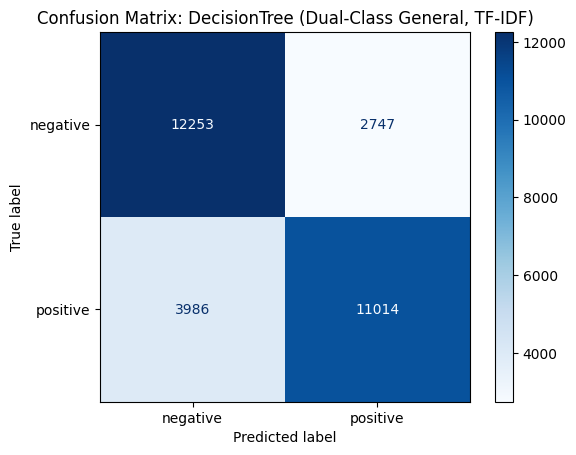

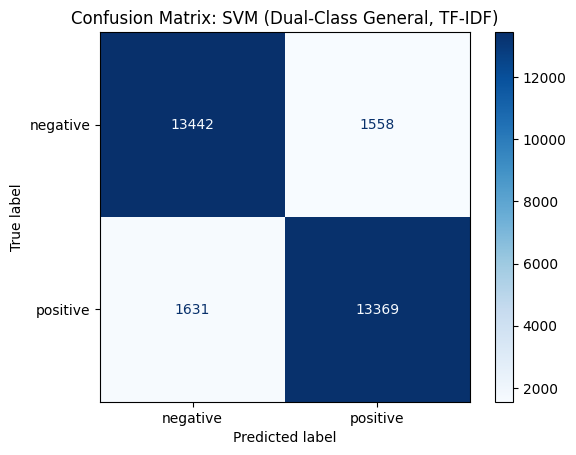

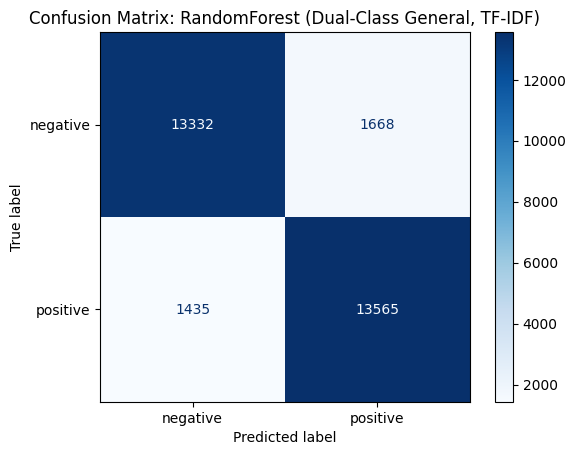

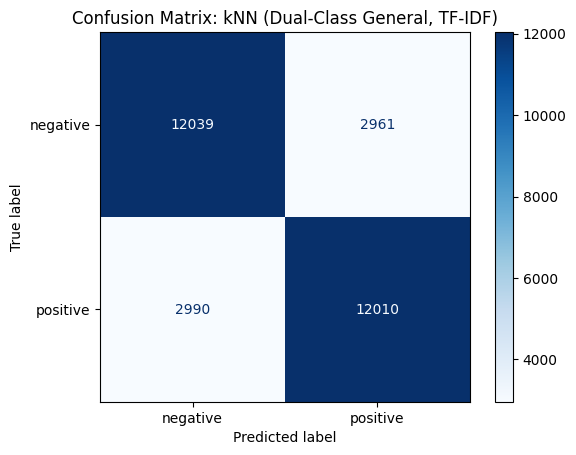

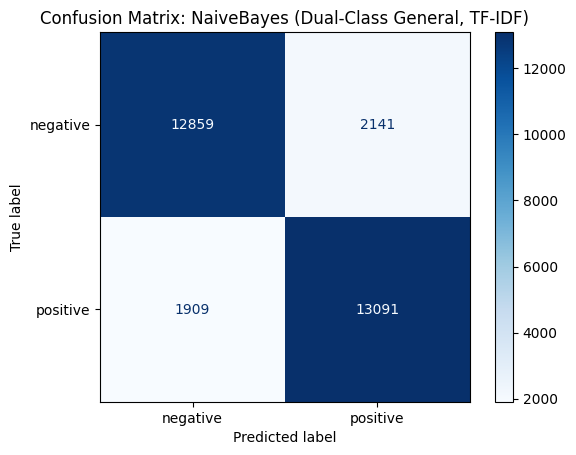

In [126]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Best TF‑IDF models (Dual-Class General)
models_2C_tfidf = {
   "DecisionTree": dt_best_2C,      
   "SVM": svm_best_2C,              
   "RandomForest": rf_best_2C,      
   "kNN": knn_best_2C,              
   "NaiveBayes": nb_best_2C          
}
for model_name, model in models_2C_tfidf.items():
   # X_test_tfidf_2C: your TF‑IDF test data (Dual-Class General)
   # y_test_2C:       your Dual-Class General labels (negative, positive)
   y_pred = model.predict(X_test_tfidf_2C)
   cm = confusion_matrix(y_test_2C, y_pred)
   disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
   disp.plot(cmap='Blues')
   plt.title(f"Confusion Matrix: {model_name} (Dual-Class General, TF-IDF)")
   plt.show()

### **NLP Method 2:** N-Gram (Tri-Gram)

#### Feature Extraction Method: N-Gram

In [98]:
# ================================
# NLP Method 2: N-Gram Approach (Dual-Class General)
# ================================
print("\n=== NLP Method 2: N-Gram Approach (Dual-Class General) ===")

from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer for (1,3) => unigrams, bigrams, and trigrams
ngram_vectorizer_2C = CountVectorizer(
    ngram_range=(1,3),  # (1,3) includes unigrams, bigrams, and trigrams
    max_features=10000,
    max_df=0.8
)

# Fit on X_train_2C (the dual-class training data) and transform
X_train_ngram_2C = ngram_vectorizer_2C.fit_transform(X_train_2C)
X_test_ngram_2C = ngram_vectorizer_2C.transform(X_test_2C)

# (Optional) create a separate dictionary to store final results from the N-Gram approach for Dual-Class
results_ngram_2C = {}

# Verify shape of transformed feature set
print(f"N-Gram Train Shape (2C): {X_train_ngram_2C.shape}")
print(f"N-Gram Test Shape (2C): {X_test_ngram_2C.shape}")


=== NLP Method 2: N-Gram Approach (Dual-Class General) ===
N-Gram Train Shape (2C): (70000, 10000)
N-Gram Test Shape (2C): (30000, 10000)


#### M1 Decision Tree

In [99]:
# -------------------------------
#  SECTION 1: Decision Tree (Dual-Class General - N-Gram)
# -------------------------------

# Define model
dt_classifier_2C_ngram = DecisionTreeClassifier()

# Define hyperparameter grid
dt_param_grid_2C_ngram = {
    'max_depth': [10, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Set up GridSearchCV
dt_grid_search_ngram_2C = GridSearchCV(
    estimator=dt_classifier_2C_ngram,
    param_grid=dt_param_grid_2C_ngram,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

print("\n" + "="*50)
print("N-Gram: Decision Tree (Dual-Class General)")
print("="*50)

# Fit the grid search on N-Gram training data
dt_grid_search_ngram_2C.fit(X_train_ngram_2C, y_train_2C)

# Display best params
print("\nBest Params (N-Gram, Decision Tree - Dual-Class General):", dt_grid_search_ngram_2C.best_params_)
print("Best CV Score (N-Gram, Decision Tree - Dual-Class General):", dt_grid_search_ngram_2C.best_score_)

# Predict on test data
dt_best_ngram_2C = dt_grid_search_ngram_2C.best_estimator_
y_pred_dt_ngram_2C = dt_best_ngram_2C.predict(X_test_ngram_2C)

# Accuracy & Classification Report
dt_test_accuracy_ngram_2C = accuracy_score(y_test_2C, y_pred_dt_ngram_2C)
print("Test Accuracy (N-Gram, Decision Tree - Dual-Class General):", dt_test_accuracy_ngram_2C)
print(classification_report(y_test_2C, y_pred_dt_ngram_2C))

# Store results
results_ngram_2C['DecisionTree'] = {
    'best_params': dt_grid_search_ngram_2C.best_params_,
    'best_cv_score': dt_grid_search_ngram_2C.best_score_,
    'test_accuracy': dt_test_accuracy_ngram_2C,
    'classification_report': classification_report(y_test_2C, y_pred_dt_ngram_2C, output_dict=True)
}

# Convert cross-validation results to DataFrame
dt_cv_results_ngram_2C = pd.DataFrame(dt_grid_search_ngram_2C.cv_results_)

# Save results to CSV in "Results_2C(General)/NGram_Models"
dt_cv_results_ngram_2C.to_csv('Results_2C(General)/NGram_Models/ngram_dualClass_decision_tree_cv_results.csv', index=False)



N-Gram: Decision Tree (Dual-Class General)
Fitting 10 folds for each of 27 candidates, totalling 270 fits

Best Params (N-Gram, Decision Tree - Dual-Class General): {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Score (N-Gram, Decision Tree - Dual-Class General): 0.7764142857142857
Test Accuracy (N-Gram, Decision Tree - Dual-Class General): 0.7767333333333334
              precision    recall  f1-score   support

    negative       0.76      0.82      0.79     15000
    positive       0.80      0.74      0.77     15000

    accuracy                           0.78     30000
   macro avg       0.78      0.78      0.78     30000
weighted avg       0.78      0.78      0.78     30000



#### M2 Linear SVM

In [100]:
# -------------------------------
#  SECTION 2: Linear SVM (Dual-Class General - N-Gram)
# -------------------------------
svm_classifier_2C_ngram = LinearSVC(max_iter=10000)

svm_param_grid_2C_ngram = {
    'C': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2]
}

svm_grid_search_ngram_2C = GridSearchCV(
    estimator=svm_classifier_2C_ngram,
    param_grid=svm_param_grid_2C_ngram,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

print("\n" + "="*50)
print("N-Gram: Linear SVM (Dual-Class General)")
print("="*50)

# Fit on dual-class N-Gram data
svm_grid_search_ngram_2C.fit(X_train_ngram_2C, y_train_2C)

print("\nBest Params (N-Gram, SVM - Dual-Class General):", svm_grid_search_ngram_2C.best_params_)
print("Best CV Score (N-Gram, SVM - Dual-Class General):", svm_grid_search_ngram_2C.best_score_)

# Predict on test data
svm_best_ngram_2C = svm_grid_search_ngram_2C.best_estimator_
y_pred_svm_ngram_2C = svm_best_ngram_2C.predict(X_test_ngram_2C)

# Evaluate performance
svm_test_accuracy_ngram_2C = accuracy_score(y_test_2C, y_pred_svm_ngram_2C)
print("Test Accuracy (N-Gram, SVM - Dual-Class General):", svm_test_accuracy_ngram_2C)
print(classification_report(y_test_2C, y_pred_svm_ngram_2C))

# Store results in n-gram dictionary
results_ngram_2C['SVM'] = {
    'best_params': svm_grid_search_ngram_2C.best_params_,
    'best_cv_score': svm_grid_search_ngram_2C.best_score_,
    'test_accuracy': svm_test_accuracy_ngram_2C,
    'classification_report': classification_report(y_test_2C, y_pred_svm_ngram_2C, output_dict=True)
}

# Convert cross-validation results to DataFrame
svm_cv_results_ngram_2C = pd.DataFrame(svm_grid_search_ngram_2C.cv_results_)

# Save results to CSV (dual-class general n-gram path)
svm_cv_results_ngram_2C.to_csv('Results_2C(General)/NGram_Models/ngram_dualClass_svm_cv_results.csv', index=False)


N-Gram: Linear SVM (Dual-Class General)
Fitting 10 folds for each of 6 candidates, totalling 60 fits

Best Params (N-Gram, SVM - Dual-Class General): {'C': 0.01}
Best CV Score (N-Gram, SVM - Dual-Class General): 0.8890285714285714
Test Accuracy (N-Gram, SVM - Dual-Class General): 0.8906333333333334
              precision    recall  f1-score   support

    negative       0.89      0.89      0.89     15000
    positive       0.89      0.89      0.89     15000

    accuracy                           0.89     30000
   macro avg       0.89      0.89      0.89     30000
weighted avg       0.89      0.89      0.89     30000



#### M3 Random Forest

In [101]:
# -------------------------------
#  SECTION: Random Forest (Dual-Class General - N-Gram)
# -------------------------------
print("\n" + "="*50)
print("N-Gram: Random Forest (Dual-Class General)")
print("="*50)

# Define the Random Forest model
rf_classifier_2C_ngram = RandomForestClassifier()

# Define the hyperparameter grid
rf_param_grid_2C_ngram = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}

# Set up GridSearchCV
rf_grid_search_ngram_2C = GridSearchCV(
    estimator=rf_classifier_2C_ngram,
    param_grid=rf_param_grid_2C_ngram,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

# Fit on N-Gram training data (dual-class general)
rf_grid_search_ngram_2C.fit(X_train_ngram_2C, y_train_2C)

# Print the best parameters and best CV score
print("\nBest Params (N-Gram, Random Forest - Dual-Class General):", rf_grid_search_ngram_2C.best_params_)
print("Best CV Score (N-Gram, Random Forest - Dual-Class General):", rf_grid_search_ngram_2C.best_score_)

# Predict on test data
rf_best_ngram_2C = rf_grid_search_ngram_2C.best_estimator_
y_pred_rf_ngram_2C = rf_best_ngram_2C.predict(X_test_ngram_2C)

# Evaluate performance
rf_test_accuracy_ngram_2C = accuracy_score(y_test_2C, y_pred_rf_ngram_2C)
print("Test Accuracy (N-Gram, Random Forest - Dual-Class General):", rf_test_accuracy_ngram_2C)
print(classification_report(y_test_2C, y_pred_rf_ngram_2C))

# Store results in the n-gram dictionary for Dual-Class
results_ngram_2C['RandomForest'] = {
    'best_params': rf_grid_search_ngram_2C.best_params_,
    'best_cv_score': rf_grid_search_ngram_2C.best_score_,
    'test_accuracy': rf_test_accuracy_ngram_2C,
    'classification_report': classification_report(y_test_2C, y_pred_rf_ngram_2C, output_dict=True)
}

# Convert cv_results_ to DataFrame and save
rf_cv_results_ngram_2C = pd.DataFrame(rf_grid_search_ngram_2C.cv_results_)
rf_cv_results_ngram_2C.to_csv('Results_2C(General)/NGram_Models/ngram_dualClass_randomForest_cv_results.csv', index=False)


N-Gram: Random Forest (Dual-Class General)
Fitting 10 folds for each of 18 candidates, totalling 180 fits

Best Params (N-Gram, Random Forest - Dual-Class General): {'max_depth': None, 'max_features': 'log2', 'n_estimators': 300}
Best CV Score (N-Gram, Random Forest - Dual-Class General): 0.8966857142857144
Test Accuracy (N-Gram, Random Forest - Dual-Class General): 0.8994333333333333
              precision    recall  f1-score   support

    negative       0.91      0.89      0.90     15000
    positive       0.89      0.91      0.90     15000

    accuracy                           0.90     30000
   macro avg       0.90      0.90      0.90     30000
weighted avg       0.90      0.90      0.90     30000



#### M4 kNN

In [102]:
# -------------------------------
#  SECTION: kNN (Dual-Class General - N-Gram)
# -------------------------------
print("\n" + "="*50)
print("N-Gram: kNN (Dual-Class General)")
print("="*50)

# Define the kNN model
knn_classifier_2C_ngram = KNeighborsClassifier()

# Define the hyperparameter grid
knn_param_grid_2C_ngram = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

# Set up GridSearchCV
knn_grid_search_ngram_2C = GridSearchCV(
    estimator=knn_classifier_2C_ngram,
    param_grid=knn_param_grid_2C_ngram,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

# Fit on N-Gram training data
knn_grid_search_ngram_2C.fit(X_train_ngram_2C, y_train_2C)

# Print best params and best CV score
print("\nBest Params (N-Gram, kNN - Dual-Class General):", knn_grid_search_ngram_2C.best_params_)
print("Best CV Score (N-Gram, kNN - Dual-Class General):", knn_grid_search_ngram_2C.best_score_)

# Predict on test data
knn_best_ngram_2C = knn_grid_search_ngram_2C.best_estimator_
y_pred_knn_ngram_2C = knn_best_ngram_2C.predict(X_test_ngram_2C)

# Evaluate performance
knn_test_accuracy_ngram_2C = accuracy_score(y_test_2C, y_pred_knn_ngram_2C)
print("Test Accuracy (N-Gram, kNN - Dual-Class General):", knn_test_accuracy_ngram_2C)
print(classification_report(y_test_2C, y_pred_knn_ngram_2C))

# Store results
results_ngram_2C['kNN'] = {
    'best_params': knn_grid_search_ngram_2C.best_params_,
    'best_cv_score': knn_grid_search_ngram_2C.best_score_,
    'test_accuracy': knn_test_accuracy_ngram_2C,
    'classification_report': classification_report(y_test_2C, y_pred_knn_ngram_2C, output_dict=True)
}

# Convert cv_results_ to DataFrame and save
knn_cv_results_df_2C_ngram = pd.DataFrame(knn_grid_search_ngram_2C.cv_results_)
knn_cv_results_df_2C_ngram.to_csv('Results_2C(General)/NGram_Models/ngram_dualClass_kNN_cv_results.csv', index=False)


N-Gram: kNN (Dual-Class General)
Fitting 10 folds for each of 24 candidates, totalling 240 fits

Best Params (N-Gram, kNN - Dual-Class General): {'metric': 'cosine', 'n_neighbors': 9, 'weights': 'distance'}
Best CV Score (N-Gram, kNN - Dual-Class General): 0.7836142857142856
Test Accuracy (N-Gram, kNN - Dual-Class General): 0.7850333333333334
              precision    recall  f1-score   support

    negative       0.75      0.86      0.80     15000
    positive       0.83      0.71      0.77     15000

    accuracy                           0.79     30000
   macro avg       0.79      0.79      0.78     30000
weighted avg       0.79      0.79      0.78     30000



#### M5 Naive Bayes

In [103]:
# -------------------------------
#  SECTION: Naïve Bayes (Dual-Class General - N-Gram)
# -------------------------------
print("\n" + "="*50)
print("N-Gram: Naïve Bayes (Dual-Class General)")
print("="*50)

# Define the Multinomial Naive Bayes model
nb_classifier_2C_ngram = MultinomialNB()

# Define the hyperparameter grid
nb_param_grid_2C_ngram = {
    'alpha': [0.5, 1.0, 1.5]
}

# Set up GridSearchCV
nb_grid_search_ngram_2C = GridSearchCV(
    estimator=nb_classifier_2C_ngram,
    param_grid=nb_param_grid_2C_ngram,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

# Fit on dual-class N-Gram data
nb_grid_search_ngram_2C.fit(X_train_ngram_2C, y_train_2C)

# Print best parameters and best CV score
print("\nBest Params (N-Gram, Naïve Bayes - Dual-Class General):", nb_grid_search_ngram_2C.best_params_)
print("Best CV Score (N-Gram, Naïve Bayes - Dual-Class General):", nb_grid_search_ngram_2C.best_score_)

# Predict on test data
nb_best_ngram_2C = nb_grid_search_ngram_2C.best_estimator_
y_pred_nb_ngram_2C = nb_best_ngram_2C.predict(X_test_ngram_2C)

# Evaluate performance
nb_test_accuracy_ngram_2C = accuracy_score(y_test_2C, y_pred_nb_ngram_2C)
print("Test Accuracy (N-Gram, Naïve Bayes - Dual-Class General):", nb_test_accuracy_ngram_2C)
print(classification_report(y_test_2C, y_pred_nb_ngram_2C))

# Store results
results_ngram_2C['NaiveBayes'] = {
    'best_params': nb_grid_search_ngram_2C.best_params_,
    'best_cv_score': nb_grid_search_ngram_2C.best_score_,
    'test_accuracy': nb_test_accuracy_ngram_2C,
    'classification_report': classification_report(y_test_2C, y_pred_nb_ngram_2C, output_dict=True)
}

# Convert cv_results_ to DataFrame
nb_cv_results_df_2C_ngram = pd.DataFrame(nb_grid_search_ngram_2C.cv_results_)

# Save results to CSV
nb_cv_results_df_2C_ngram.to_csv('Results_2C(General)/NGram_Models/ngram_dualClass_naiveBayes_cv_results.csv', index=False)


N-Gram: Naïve Bayes (Dual-Class General)
Fitting 10 folds for each of 3 candidates, totalling 30 fits

Best Params (N-Gram, Naïve Bayes - Dual-Class General): {'alpha': 0.5}
Best CV Score (N-Gram, Naïve Bayes - Dual-Class General): 0.8444142857142858
Test Accuracy (N-Gram, Naïve Bayes - Dual-Class General): 0.8451
              precision    recall  f1-score   support

    negative       0.89      0.79      0.84     15000
    positive       0.81      0.90      0.85     15000

    accuracy                           0.85     30000
   macro avg       0.85      0.85      0.84     30000
weighted avg       0.85      0.85      0.84     30000



#### Summary of Results

In [104]:
pd.DataFrame(results_ngram_2C).T

,best_params,best_cv_score,test_accuracy,classification_report
DecisionTree,"{'max_depth': 25, 'min_samples_leaf': 1, 'min_...",0.776414,0.776733,"{'negative': {'precision': 0.7563611660079052,..."
SVM,{'C': 0.01},0.889029,0.890633,"{'negative': {'precision': 0.8933870426317556,..."
RandomForest,"{'max_depth': None, 'max_features': 'log2', 'n...",0.896686,0.899433,"{'negative': {'precision': 0.9063411325873177,..."
kNN,"{'metric': 'cosine', 'n_neighbors': 9, 'weight...",0.783614,0.785033,"{'negative': {'precision': 0.7490244044498806,..."
NaiveBayes,{'alpha': 0.5},0.844414,0.8451,"{'negative': {'precision': 0.8919512379798592,..."


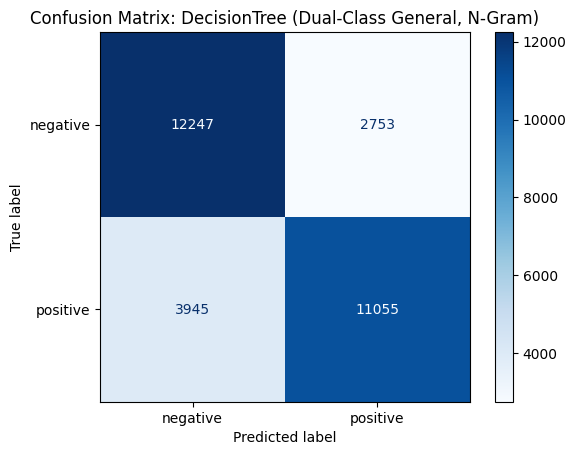

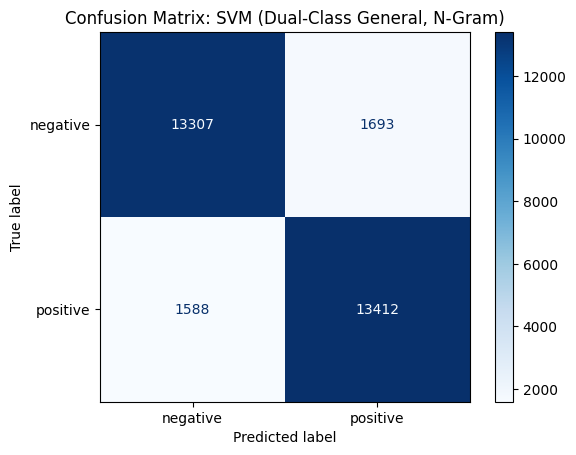

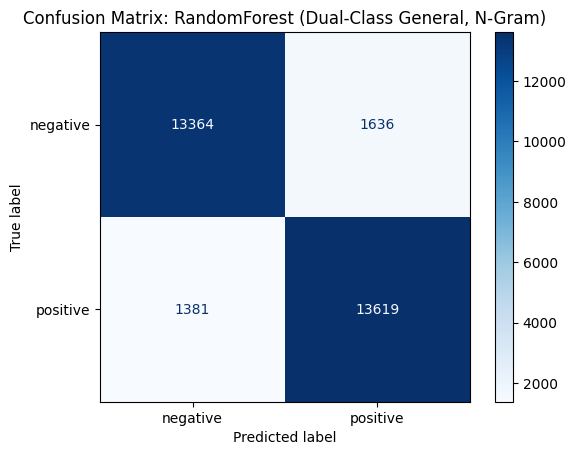

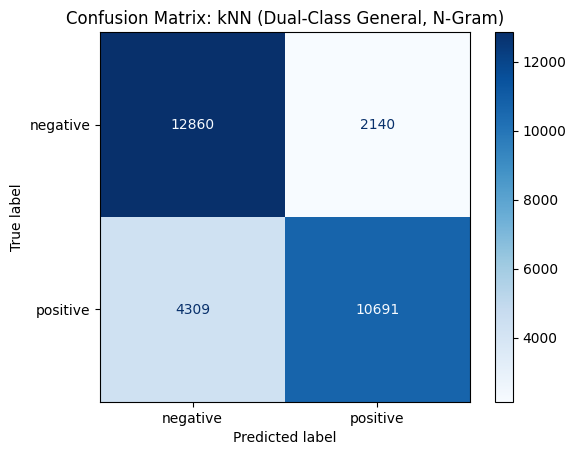

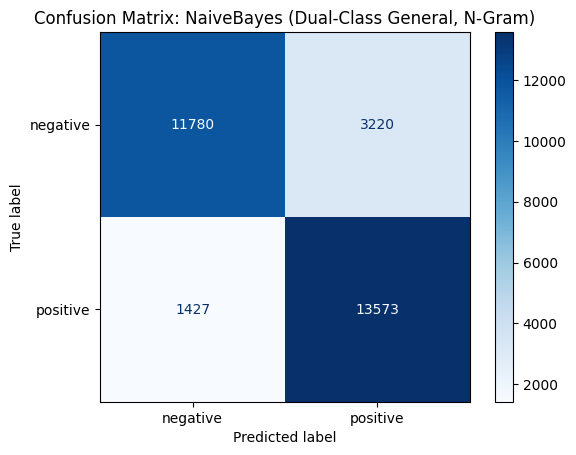

In [128]:
# Best N‑Gram models (Dual-Class General)
models_2C_ngram = {
   "DecisionTree": dt_best_ngram_2C,      
   "SVM": svm_best_ngram_2C,              
   "RandomForest": rf_best_ngram_2C,      
   "kNN": knn_best_ngram_2C,              
   "NaiveBayes": nb_best_ngram_2C          
}
for model_name, model in models_2C_ngram.items():
   # X_test_ngram_2C: your N‑Gram test data (Dual-Class General)
   # y_test_2C:       your Dual-Class General labels (negative, positive)
   y_pred = model.predict(X_test_ngram_2C)
   cm = confusion_matrix(y_test_2C, y_pred)
   disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
   disp.plot(cmap='Blues')
   plt.title(f"Confusion Matrix: {model_name} (Dual-Class General, N-Gram)")
   plt.show()

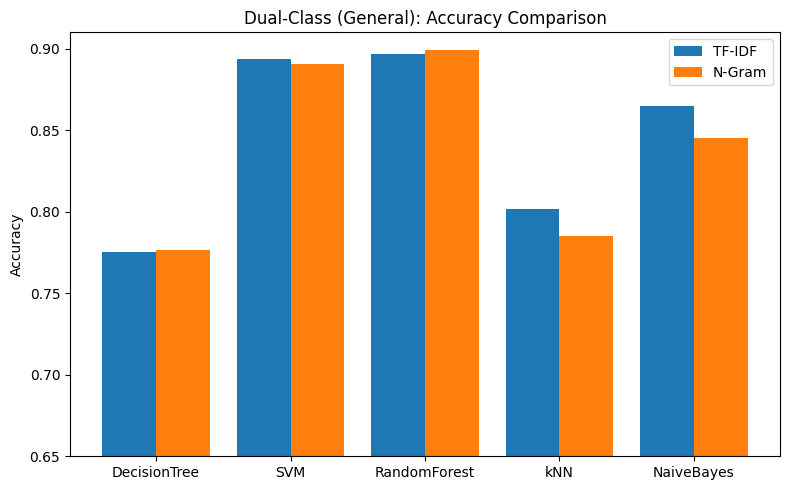

In [132]:
models = ["DecisionTree", "SVM", "RandomForest", "kNN", "NaiveBayes"]
 
# TF-IDF accuracies from results_2C
tfidf_accuracies_2C = [
    results_2C[m]["test_accuracy"] for m in models
]
 
# N-Gram accuracies from results_ngram_2C
ngram_accuracies_2C = [
    results_ngram_2C[m]["test_accuracy"] for m in models
]
 
x = np.arange(len(models))
width = 0.4
 
plt.figure(figsize=(8, 5))
 
plt.bar(x - width/2, tfidf_accuracies_2C, width, label="TF-IDF")
plt.bar(x + width/2, ngram_accuracies_2C, width, label="N-Gram")
 
plt.title("Dual-Class (General): Accuracy Comparison")
plt.xticks(x, models)
plt.ylabel("Accuracy")
plt.ylim([0.65, 0.91])
plt.legend()
plt.tight_layout()
plt.show()

## 🟣 Classification Dual-Class (Negative Biased)

### Make a copy of the preprocessed data

In [105]:
df_negBias = pd.read_csv('Datasets/preprocessed_reviews.csv')
df_negBias.head()

,ProductId,Score,Text,Sentiment,Preprocessed_Review
0,B008COIXOG,5,i just recently visited my nearby fresh and ea...,positive,recently visit nearby fresh easy market saw ad...
1,B004VLVG0C,5,this works great i followed the recipe on the ...,positive,work great follow recipe back bag except put i...
2,B000FL0A9K,2,personal preference too sweet tastes like gene...,negative,personal preference sweet taste like general f...
3,B0015MY6PC,5,my daughter loves these snacks she doesnt care...,positive,daughter love snack not care something sour ea...
4,B000LTIDR2,3,i would not recommend buying this product beca...,neutral,would not recommend buy product large quantity...


### Merge 3 Star Reviews with Negative class

In [106]:
# 2. Drop the existing Sentiment column
df_negBias.drop(columns=['Sentiment'], inplace=True)

In [107]:
df_negBias.head()

,ProductId,Score,Text,Preprocessed_Review
0,B008COIXOG,5,i just recently visited my nearby fresh and ea...,recently visit nearby fresh easy market saw ad...
1,B004VLVG0C,5,this works great i followed the recipe on the ...,work great follow recipe back bag except put i...
2,B000FL0A9K,2,personal preference too sweet tastes like gene...,personal preference sweet taste like general f...
3,B0015MY6PC,5,my daughter loves these snacks she doesnt care...,daughter love snack not care something sour ea...
4,B000LTIDR2,3,i would not recommend buying this product beca...,would not recommend buy product large quantity...


In [108]:
# 3. Define a function to merge 1,2,3 → negative and 4,5 → positive
def map_neg_biased(score):
    if score in [1, 2, 3]:
        return 'negative'
    else:
        return 'positive'

In [109]:
# 4. Recreate the Sentiment column with negative bias mapping
df_negBias['Sentiment'] = df_negBias['Score'].apply(map_neg_biased)

In [110]:
df_negBias.head()

,ProductId,Score,Text,Preprocessed_Review,Sentiment
0,B008COIXOG,5,i just recently visited my nearby fresh and ea...,recently visit nearby fresh easy market saw ad...,positive
1,B004VLVG0C,5,this works great i followed the recipe on the ...,work great follow recipe back bag except put i...,positive
2,B000FL0A9K,2,personal preference too sweet tastes like gene...,personal preference sweet taste like general f...,negative
3,B0015MY6PC,5,my daughter loves these snacks she doesnt care...,daughter love snack not care something sour ea...,positive
4,B000LTIDR2,3,i would not recommend buying this product beca...,would not recommend buy product large quantity...,negative


In [111]:
# 5. Verify the distribution
print("\nDistribution for Negative-Biased Classification:")
print(df_negBias['Sentiment'].value_counts())


Distribution for Negative-Biased Classification:
Sentiment
negative    75000
positive    50000
Name: count, dtype: int64


### Train/Test Split

#### Define Features (Preprocessed Text) and Target (Sentiment)

In [112]:
# 6. Define Features (Preprocessed Text) and Target (Neg-Biased Sentiment)
X_negBias = df_negBias['Preprocessed_Review']
y_negBias = df_negBias['Sentiment']

##### Train Test Split

In [113]:
# 7. Train/Test Split
from sklearn.model_selection import train_test_split

X_train_negBias, X_test_negBias, y_train_negBias, y_test_negBias = train_test_split(
    X_negBias,
    y_negBias,
    test_size=0.3,      # 70 train / 30 test
    random_state=42,
    stratify=y_negBias
)

# 8. Print distribution in train/test sets
print("\nTraining Set Distribution:")
print(y_train_negBias.value_counts())
print("\nTest Set Distribution:")
print(y_test_negBias.value_counts())


Training Set Distribution:
Sentiment
negative    52500
positive    35000
Name: count, dtype: int64

Test Set Distribution:
Sentiment
negative    22500
positive    15000
Name: count, dtype: int64


### **NLP Method 1:** Term Frequency-Inverse Document Frequency (TF-IDF)
Here, we run each model separately—each with its own hyperparameter tuning and 10-fold cross-validation.

#### Feature Extraction Method: TFIDF

In [114]:
# ================================
# TF-IDF Feature Extraction (Negative-Biased)
# ================================

print("\n=== TF-IDF Feature Extraction for Negative-Biased Sentiment ===")

# Define the TF-IDF Vectorizer
tfidf_vectorizer_negBias = TfidfVectorizer(
    max_features=10000,  # Adjust as needed
    ngram_range=(1,2),   # Unigrams & Bigrams
    max_df=0.8,
    sublinear_tf=True
)

# Fit on training data and transform
X_train_tfidf_negBias = tfidf_vectorizer_negBias.fit_transform(X_train_negBias)
X_test_tfidf_negBias = tfidf_vectorizer_negBias.transform(X_test_negBias)

# Initialize a dictionary to store model results
results_negBias = {}

print("\nTF-IDF Feature Extraction Complete. Ready for Model Training!")


=== TF-IDF Feature Extraction for Negative-Biased Sentiment ===

TF-IDF Feature Extraction Complete. Ready for Model Training!


#### M1 Decision Tree

In [115]:
# ================================
# MODEL 1: Decision Tree (Negative-Biased)
# ================================

print("\n" + "="*50)
print("Negative-Biased: Decision Tree")
print("="*50)

# Define the model
dt_classifier_negBias = DecisionTreeClassifier()

# Define hyperparameter grid
dt_param_grid_negBias = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
}

# Set up GridSearchCV with 10-fold cross-validation
dt_grid_search_negBias = GridSearchCV(
    estimator=dt_classifier_negBias,
    param_grid=dt_param_grid_negBias,
    scoring='accuracy',  
    cv=10,
    n_jobs=4,           # Adjust CPU usage
    verbose=2,
    return_train_score=True
)

# Fit GridSearch on the TF-IDF training data
dt_grid_search_negBias.fit(X_train_tfidf_negBias, y_train_negBias)

# Evaluate best model
print("\nBest Params (Decision Tree, Negative-Biased):", dt_grid_search_negBias.best_params_)
print("Best CV Score (Decision Tree, Negative-Biased):", dt_grid_search_negBias.best_score_)

# Predict on test data
dt_best_negBias = dt_grid_search_negBias.best_estimator_  # Get the best model
y_pred_dt_negBias = dt_best_negBias.predict(X_test_tfidf_negBias)  # Predict on test data

# Compute Accuracy & Classification Report
dt_test_accuracy_negBias = accuracy_score(y_test_negBias, y_pred_dt_negBias)
print("Test Accuracy (Decision Tree, Negative-Biased):", dt_test_accuracy_negBias)
print(classification_report(y_test_negBias, y_pred_dt_negBias))

# Store results
results_negBias['DecisionTree'] = {
    'best_params': dt_grid_search_negBias.best_params_,
    'best_cv_score': dt_grid_search_negBias.best_score_,
    'test_accuracy': dt_test_accuracy_negBias,
    'classification_report': classification_report(y_test_negBias, y_pred_dt_negBias, output_dict=True)
}

# Save cross-validation results to CSV
dt_cv_results_negBias = pd.DataFrame(dt_grid_search_negBias.cv_results_)
dt_cv_results_negBias.to_csv('Results_2C(NegBias)/TFIDF_Models/tfidf_negBias_decisionTree_cv_results.csv', index=False)

print("\nDecision Tree Model Training & Evaluation Complete for Negative-Biased Sentiment!")


Negative-Biased: Decision Tree
Fitting 10 folds for each of 60 candidates, totalling 600 fits

Best Params (Decision Tree, Negative-Biased): {'max_depth': 25, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best CV Score (Decision Tree, Negative-Biased): 0.7521028571428572
Test Accuracy (Decision Tree, Negative-Biased): 0.7558933333333333
              precision    recall  f1-score   support

    negative       0.78      0.83      0.80     22500
    positive       0.72      0.65      0.68     15000

    accuracy                           0.76     37500
   macro avg       0.75      0.74      0.74     37500
weighted avg       0.75      0.76      0.75     37500


Decision Tree Model Training & Evaluation Complete for Negative-Biased Sentiment!


#### M2 Linear SVM

In [116]:
# -------------------------------
#  SECTION 2: Linear SVM (Negative Bias)
# -------------------------------
print("\n" + "="*50)
print("NEGATIVE-BIASED: Linear SVM")
print("="*50)

# Define model
svm_classifier_negBias = LinearSVC(max_iter=10000)

# Define hyperparameter grid
svm_param_grid_negBias = {
    'C': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2]
}

# Set up GridSearchCV with 10-fold CV
svm_grid_search_negBias = GridSearchCV(
    estimator=svm_classifier_negBias,
    param_grid=svm_param_grid_negBias,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

# Fit the grid search
svm_grid_search_negBias.fit(X_train_tfidf_negBias, y_train_negBias)

# Evaluate best model
print("\nBest Params (Negative-Biased, SVM):", svm_grid_search_negBias.best_params_)
print("Best CV Score (Negative-Biased, SVM):", svm_grid_search_negBias.best_score_)

# Predict on test data
svm_best_negBias = svm_grid_search_negBias.best_estimator_
y_pred_svm_negBias = svm_best_negBias.predict(X_test_tfidf_negBias)

# Accuracy & Classification Report
svm_test_accuracy_negBias = accuracy_score(y_test_negBias, y_pred_svm_negBias)
print("Test Accuracy (Negative-Biased, SVM):", svm_test_accuracy_negBias)
print(classification_report(y_test_negBias, y_pred_svm_negBias))

# Store results
results_negBias['SVM'] = {
    'best_params': svm_grid_search_negBias.best_params_,
    'best_cv_score': svm_grid_search_negBias.best_score_,
    'test_accuracy': svm_test_accuracy_negBias,
    'classification_report': classification_report(y_test_negBias, y_pred_svm_negBias, output_dict=True)
}

# Save cross-validation results to CSV
svm_cv_results_negBias = pd.DataFrame(svm_grid_search_negBias.cv_results_)
svm_cv_results_negBias.to_csv('Results_2C(NegBias)/TFIDF_Models/tfidf_negBias_svm_cv_results.csv', index=False)

print("\nLinear SVM Model Training & Evaluation Complete for Negative-Biased Sentiment!")


NEGATIVE-BIASED: Linear SVM
Fitting 10 folds for each of 6 candidates, totalling 60 fits

Best Params (Negative-Biased, SVM): {'C': 0.1}
Best CV Score (Negative-Biased, SVM): 0.8498857142857142
Test Accuracy (Negative-Biased, SVM): 0.8554666666666667
              precision    recall  f1-score   support

    negative       0.86      0.90      0.88     22500
    positive       0.84      0.79      0.81     15000

    accuracy                           0.86     37500
   macro avg       0.85      0.84      0.85     37500
weighted avg       0.85      0.86      0.85     37500


Linear SVM Model Training & Evaluation Complete for Negative-Biased Sentiment!


#### M3 Random Forest

In [117]:
# -------------------------------
#  SECTION 3: Random Forest (Negative Bias)
# -------------------------------
print("\n" + "="*50)
print("NEGATIVE-BIASED: Random Forest")
print("="*50)

# Define model
rf_classifier_negBias = RandomForestClassifier()

# Define hyperparameter grid
rf_param_grid_negBias = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']   # Usually beneficial for text
}

# Set up GridSearchCV
rf_grid_search_negBias = GridSearchCV(
    estimator=rf_classifier_negBias,
    param_grid=rf_param_grid_negBias,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

# Fit the grid search
rf_grid_search_negBias.fit(X_train_tfidf_negBias, y_train_negBias)

# Evaluate best model
print("\nBest Params (Negative-Biased, Random Forest):", rf_grid_search_negBias.best_params_)
print("Best CV Score (Negative-Biased, Random Forest):", rf_grid_search_negBias.best_score_)

# Predict on test data
rf_best_negBias = rf_grid_search_negBias.best_estimator_
y_pred_rf_negBias = rf_best_negBias.predict(X_test_tfidf_negBias)

# Accuracy & Classification Report
rf_test_accuracy_negBias = accuracy_score(y_test_negBias, y_pred_rf_negBias)
print("Test Accuracy (Negative-Biased, Random Forest):", rf_test_accuracy_negBias)
print(classification_report(y_test_negBias, y_pred_rf_negBias))

# Store results
results_negBias['RandomForest'] = {
    'best_params': rf_grid_search_negBias.best_params_,
    'best_cv_score': rf_grid_search_negBias.best_score_,
    'test_accuracy': rf_test_accuracy_negBias,
    'classification_report': classification_report(y_test_negBias, y_pred_rf_negBias, output_dict=True)
}

# Save cross-validation results to CSV
rf_cv_results_negBias = pd.DataFrame(rf_grid_search_negBias.cv_results_)
rf_cv_results_negBias.to_csv('Results_2C(NegBias)/TFIDF_Models/tfidf_negBias_randomForest_cv_results.csv', index=False)

print("\nRandom Forest Model Training & Evaluation Complete for Negative-Biased Sentiment!")



NEGATIVE-BIASED: Random Forest
Fitting 10 folds for each of 18 candidates, totalling 180 fits

Best Params (Negative-Biased, Random Forest): {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 300}
Best CV Score (Negative-Biased, Random Forest): 0.8471657142857142
Test Accuracy (Negative-Biased, Random Forest): 0.85208
              precision    recall  f1-score   support

    negative       0.84      0.93      0.88     22500
    positive       0.88      0.73      0.80     15000

    accuracy                           0.85     37500
   macro avg       0.86      0.83      0.84     37500
weighted avg       0.85      0.85      0.85     37500


Random Forest Model Training & Evaluation Complete for Negative-Biased Sentiment!


#### M4 kNN

In [118]:
# -------------------------------
#  SECTION 4: kNN (Negative Bias)
# -------------------------------
print("\n" + "="*50)
print("NEGATIVE-BIASED: kNN")
print("="*50)

# Define model
knn_classifier_negBias = KNeighborsClassifier()

# Define hyperparameter grid
knn_param_grid_negBias = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

# Set up GridSearchCV
knn_grid_search_negBias = GridSearchCV(
    estimator=knn_classifier_negBias,
    param_grid=knn_param_grid_negBias,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

# Fit the grid search
knn_grid_search_negBias.fit(X_train_tfidf_negBias, y_train_negBias)

# Evaluate best model
print("\nBest Params (Negative-Biased, kNN):", knn_grid_search_negBias.best_params_)
print("Best CV Score (Negative-Biased, kNN):", knn_grid_search_negBias.best_score_)

# Predict on test data
knn_best_negBias = knn_grid_search_negBias.best_estimator_
y_pred_knn_negBias = knn_best_negBias.predict(X_test_tfidf_negBias)

# Accuracy & Classification Report
knn_test_accuracy_negBias = accuracy_score(y_test_negBias, y_pred_knn_negBias)
print("Test Accuracy (Negative-Biased, kNN):", knn_test_accuracy_negBias)
print(classification_report(y_test_negBias, y_pred_knn_negBias))

# Store results
results_negBias['kNN'] = {
    'best_params': knn_grid_search_negBias.best_params_,
    'best_cv_score': knn_grid_search_negBias.best_score_,
    'test_accuracy': knn_test_accuracy_negBias,
    'classification_report': classification_report(y_test_negBias, y_pred_knn_negBias, output_dict=True)
}

# Save cross-validation results to CSV
knn_cv_results_negBias = pd.DataFrame(knn_grid_search_negBias.cv_results_)
knn_cv_results_negBias.to_csv('Results_2C(NegBias)/TFIDF_Models/tfidf_negBias_knn_cv_results.csv', index=False)

print("\nkNN Model Training & Evaluation Complete for Negative-Biased Sentiment!")


NEGATIVE-BIASED: kNN
Fitting 10 folds for each of 24 candidates, totalling 240 fits


C:\Users\mm2046\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.70252571 0.72870857 0.71616    0.75150857 0.72170286 0.76291429
 0.72518857 0.77065143        nan 0.58806857        nan 0.58818286
        nan 0.58755429        nan 0.59641143 0.73538286 0.75793143
 0.73420571 0.76624    0.73309714 0.77158857 0.73363429 0.77621714]
  warnings.warn(
C:\Users\mm2046\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the train scores are non-finite: [0.86432762 0.9999073  0.82618413 0.9999073  0.8063873  0.9999073
 0.79560508 0.9999073         nan 0.9999073         nan 0.9999073
        nan 0.9999073         nan 0.9999073  0.86695619 0.99989587
 0.8276546  0.99989587 0.80785524 0.99989587 0.79676571 0.99989587]
  warnings.warn(



Best Params (Negative-Biased, kNN): {'metric': 'cosine', 'n_neighbors': 9, 'weights': 'distance'}
Best CV Score (Negative-Biased, kNN): 0.7762171428571428
Test Accuracy (Negative-Biased, kNN): 0.7767733333333333
              precision    recall  f1-score   support

    negative       0.79      0.85      0.82     22500
    positive       0.75      0.67      0.71     15000

    accuracy                           0.78     37500
   macro avg       0.77      0.76      0.76     37500
weighted avg       0.77      0.78      0.77     37500


kNN Model Training & Evaluation Complete for Negative-Biased Sentiment!


#### M5 Naive Bayes

In [119]:
# -------------------------------
#  SECTION 5: Naïve Bayes (Negative Bias)
# -------------------------------
print("\n" + "="*50)
print("NEGATIVE-BIASED: Naïve Bayes")
print("="*50)

# Define model
nb_classifier_negBias = MultinomialNB()

# Define hyperparameter grid
nb_param_grid_negBias = {
    'alpha': [0.5, 1.0, 1.5]
}

# Set up GridSearchCV
nb_grid_search_negBias = GridSearchCV(
    estimator=nb_classifier_negBias,
    param_grid=nb_param_grid_negBias,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

# Fit the grid search
nb_grid_search_negBias.fit(X_train_tfidf_negBias, y_train_negBias)

# Evaluate best model
print("\nBest Params (Negative-Biased, Naïve Bayes):", nb_grid_search_negBias.best_params_)
print("Best CV Score (Negative-Biased, Naïve Bayes):", nb_grid_search_negBias.best_score_)

# Predict on test data
nb_best_negBias = nb_grid_search_negBias.best_estimator_
y_pred_nb_negBias = nb_best_negBias.predict(X_test_tfidf_negBias)

# Accuracy & Classification Report
nb_test_accuracy_negBias = accuracy_score(y_test_negBias, y_pred_nb_negBias)
print("Test Accuracy (Negative-Biased, Naïve Bayes):", nb_test_accuracy_negBias)
print(classification_report(y_test_negBias, y_pred_nb_negBias))

# Store results
results_negBias['NaiveBayes'] = {
    'best_params': nb_grid_search_negBias.best_params_,
    'best_cv_score': nb_grid_search_negBias.best_score_,
    'test_accuracy': nb_test_accuracy_negBias,
    'classification_report': classification_report(y_test_negBias, y_pred_nb_negBias, output_dict=True)
}

# Save cross-validation results to CSV
nb_cv_results_negBias = pd.DataFrame(nb_grid_search_negBias.cv_results_)
nb_cv_results_negBias.to_csv('Results_2C(NegBias)/TFIDF_Models/tfidf_negBias_NaiveBayes_cv_results.csv', index=False)

print("\nNaïve Bayes Model Training & Evaluation Complete for Negative-Biased Sentiment!")


NEGATIVE-BIASED: Naïve Bayes
Fitting 10 folds for each of 3 candidates, totalling 30 fits

Best Params (Negative-Biased, Naïve Bayes): {'alpha': 0.5}
Best CV Score (Negative-Biased, Naïve Bayes): 0.8267314285714285
Test Accuracy (Negative-Biased, Naïve Bayes): 0.8242666666666667
              precision    recall  f1-score   support

    negative       0.82      0.91      0.86     22500
    positive       0.84      0.70      0.76     15000

    accuracy                           0.82     37500
   macro avg       0.83      0.80      0.81     37500
weighted avg       0.83      0.82      0.82     37500


Naïve Bayes Model Training & Evaluation Complete for Negative-Biased Sentiment!


#### Summary

In [120]:
# -------------------------------
#  SUMMARY: Negative-Biased Sentiment Classification
# -------------------------------

print("\n" + "="*50)
print("NEGATIVE-BIASED: Summary of Results")
print("="*50)

# Convert results dictionary to DataFrame for readability
df_results_summary_negBias = pd.DataFrame(results_negBias).T

# Display summary table
print(df_results_summary_negBias)


NEGATIVE-BIASED: Summary of Results
                                                    best_params best_cv_score  \
DecisionTree  {'max_depth': 25, 'min_samples_leaf': 2, 'min_...      0.752103   
SVM                                                  {'C': 0.1}      0.849886   
RandomForest  {'max_depth': None, 'max_features': 'sqrt', 'n...      0.847166   
kNN           {'metric': 'cosine', 'n_neighbors': 9, 'weight...      0.776217   
NaiveBayes                                       {'alpha': 0.5}      0.826731   

             test_accuracy                              classification_report  
DecisionTree      0.755893  {'negative': {'precision': 0.7780880146691115,...  
SVM               0.855467  {'negative': {'precision': 0.8634661218930881,...  
RandomForest       0.85208  {'negative': {'precision': 0.8397803343087346,...  
kNN               0.776773  {'negative': {'precision': 0.794587381677161, ...  
NaiveBayes        0.824267  {'negative': {'precision': 0.8184547638110489,..

### **NLP Method 2:** N-Gram (Tri-Gram)

#### Selection Method: N-Gram

In [121]:
# ================================
# NEGATIVE-BIASED: N-Gram Feature Extraction
# ================================

print("\n" + "="*50)
print("NEGATIVE-BIASED: N-Gram Feature Extraction")
print("="*50)

from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer for (1,3) N-Grams
ngram_vectorizer_negBias = CountVectorizer(
    ngram_range=(1,3),  # (1,3) => unigrams, bigrams, trigrams
    max_features=10000,
    max_df=0.8
)

# Fit on training data and transform both train & test sets
X_train_ngram_negBias = ngram_vectorizer_negBias.fit_transform(X_train_negBias)
X_test_ngram_negBias = ngram_vectorizer_negBias.transform(X_test_negBias)

# Initialize a dictionary to store model results for N-Gram approach
results_ngram_negBias = {}

print("\nN-Gram Feature Extraction for Negative-Biased Sentiment Completed!")


NEGATIVE-BIASED: N-Gram Feature Extraction

N-Gram Feature Extraction for Negative-Biased Sentiment Completed!


#### M1: Decision Tree

In [122]:
# ================================
# NEGATIVE-BIASED: Decision Tree (N-Gram)
# ================================

print("\n" + "="*50)
print("NEGATIVE-BIASED: N-Gram Decision Tree")
print("="*50)

# Define Decision Tree Classifier
dt_classifier_negBias_ngram = DecisionTreeClassifier()

# Define hyperparameter grid
dt_param_grid_negBias_ngram = {
    'max_depth': [10, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Set up GridSearchCV with 10-fold cross-validation
dt_grid_search_negBias_ngram = GridSearchCV(
    estimator=dt_classifier_negBias_ngram,
    param_grid=dt_param_grid_negBias_ngram,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

# Train the model
dt_grid_search_negBias_ngram.fit(X_train_ngram_negBias, y_train_negBias)

# Print best parameters
print("\nBest Params (Negative-Biased, N-Gram, Decision Tree):", dt_grid_search_negBias_ngram.best_params_)
print("Best CV Score (Negative-Biased, N-Gram, Decision Tree):", dt_grid_search_negBias_ngram.best_score_)

# Make predictions
dt_best_negBias_ngram = dt_grid_search_negBias_ngram.best_estimator_
y_pred_dt_negBias_ngram = dt_best_negBias_ngram.predict(X_test_ngram_negBias)

# Evaluate model performance
dt_test_accuracy_negBias_ngram = accuracy_score(y_test_negBias, y_pred_dt_negBias_ngram)
print("Test Accuracy (Negative-Biased, N-Gram, Decision Tree):", dt_test_accuracy_negBias_ngram)
print(classification_report(y_test_negBias, y_pred_dt_negBias_ngram))

# Store results
results_ngram_negBias['DecisionTree'] = {
    'best_params': dt_grid_search_negBias_ngram.best_params_,
    'best_cv_score': dt_grid_search_negBias_ngram.best_score_,
    'test_accuracy': dt_test_accuracy_negBias_ngram,
    'classification_report': classification_report(y_test_negBias, y_pred_dt_negBias_ngram, output_dict=True)
}

# Save cross-validation results to CSV
dt_cv_results_negBias_ngram = pd.DataFrame(dt_grid_search_negBias_ngram.cv_results_)
dt_cv_results_negBias_ngram.to_csv('Results_2C(NegBias)/NGram_Models/ngram_negBias_decisionTree_cv_results.csv', index=False)

print("\nDecision Tree Model Training & Evaluation Complete for Negative-Biased Sentiment (N-Gram)!")


NEGATIVE-BIASED: N-Gram Decision Tree
Fitting 10 folds for each of 27 candidates, totalling 270 fits

Best Params (Negative-Biased, N-Gram, Decision Tree): {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Score (Negative-Biased, N-Gram, Decision Tree): 0.7532914285714286
Test Accuracy (Negative-Biased, N-Gram, Decision Tree): 0.7578666666666667
              precision    recall  f1-score   support

    negative       0.78      0.83      0.80     22500
    positive       0.72      0.65      0.68     15000

    accuracy                           0.76     37500
   macro avg       0.75      0.74      0.74     37500
weighted avg       0.76      0.76      0.76     37500


Decision Tree Model Training & Evaluation Complete for Negative-Biased Sentiment (N-Gram)!


#### M2: Linear SVM

In [123]:
# ================================
# NEGATIVE-BIASED: Linear SVM (N-Gram)
# ================================

print("\n" + "="*50)
print("NEGATIVE-BIASED: N-Gram Linear SVM")
print("="*50)

# Define SVM Classifier
svm_classifier_negBias_ngram = LinearSVC(max_iter=10000)

# Define hyperparameter grid
svm_param_grid_negBias_ngram = {
    'C': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2]
}

# Set up GridSearchCV with 10-fold cross-validation
svm_grid_search_negBias_ngram = GridSearchCV(
    estimator=svm_classifier_negBias_ngram,
    param_grid=svm_param_grid_negBias_ngram,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

# Train the model
svm_grid_search_negBias_ngram.fit(X_train_ngram_negBias, y_train_negBias)

# Print best parameters
print("\nBest Params (Negative-Biased, N-Gram, SVM):", svm_grid_search_negBias_ngram.best_params_)
print("Best CV Score (Negative-Biased, N-Gram, SVM):", svm_grid_search_negBias_ngram.best_score_)

# Make predictions
svm_best_negBias_ngram = svm_grid_search_negBias_ngram.best_estimator_
y_pred_svm_negBias_ngram = svm_best_negBias_ngram.predict(X_test_ngram_negBias)

# Evaluate model performance
svm_test_accuracy_negBias_ngram = accuracy_score(y_test_negBias, y_pred_svm_negBias_ngram)
print("Test Accuracy (Negative-Biased, N-Gram, SVM):", svm_test_accuracy_negBias_ngram)
print(classification_report(y_test_negBias, y_pred_svm_negBias_ngram))

# Store results
results_ngram_negBias['SVM'] = {
    'best_params': svm_grid_search_negBias_ngram.best_params_,
    'best_cv_score': svm_grid_search_negBias_ngram.best_score_,
    'test_accuracy': svm_test_accuracy_negBias_ngram,
    'classification_report': classification_report(y_test_negBias, y_pred_svm_negBias_ngram, output_dict=True)
}

# Save cross-validation results to CSV
svm_cv_results_negBias_ngram = pd.DataFrame(svm_grid_search_negBias_ngram.cv_results_)
svm_cv_results_negBias_ngram.to_csv('Results_2C(NegBias)/NGram_Models/ngram_negBias_svm_cv_results.csv', index=False)

print("\nLinear SVM Model Training & Evaluation Complete for Negative-Biased Sentiment (N-Gram)!")


NEGATIVE-BIASED: N-Gram Linear SVM
Fitting 10 folds for each of 6 candidates, totalling 60 fits

Best Params (Negative-Biased, N-Gram, SVM): {'C': 0.01}
Best CV Score (Negative-Biased, N-Gram, SVM): 0.8471428571428572
Test Accuracy (Negative-Biased, N-Gram, SVM): 0.8535733333333333
              precision    recall  f1-score   support

    negative       0.87      0.89      0.88     22500
    positive       0.83      0.80      0.81     15000

    accuracy                           0.85     37500
   macro avg       0.85      0.84      0.85     37500
weighted avg       0.85      0.85      0.85     37500


Linear SVM Model Training & Evaluation Complete for Negative-Biased Sentiment (N-Gram)!


#### M3: Random Forest

In [124]:
# ================================
# NEGATIVE-BIASED: Random Forest (N-Gram)
# ================================

print("\n" + "="*50)
print("NEGATIVE-BIASED: N-Gram Random Forest")
print("="*50)

# Define Random Forest Classifier
rf_classifier_negBias_ngram = RandomForestClassifier()

# Define hyperparameter grid
rf_param_grid_negBias_ngram = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}

# Set up GridSearchCV
rf_grid_search_negBias_ngram = GridSearchCV(
    estimator=rf_classifier_negBias_ngram,
    param_grid=rf_param_grid_negBias_ngram,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

# Train the model
rf_grid_search_negBias_ngram.fit(X_train_ngram_negBias, y_train_negBias)

# Print best parameters
print("\nBest Params (Negative-Biased, N-Gram, Random Forest):", rf_grid_search_negBias_ngram.best_params_)
print("Best CV Score (Negative-Biased, N-Gram, Random Forest):", rf_grid_search_negBias_ngram.best_score_)

# Make predictions
rf_best_negBias_ngram = rf_grid_search_negBias_ngram.best_estimator_
y_pred_rf_negBias_ngram = rf_best_negBias_ngram.predict(X_test_ngram_negBias)

# Evaluate model performance
rf_test_accuracy_negBias_ngram = accuracy_score(y_test_negBias, y_pred_rf_negBias_ngram)
print("Test Accuracy (Negative-Biased, N-Gram, Random Forest):", rf_test_accuracy_negBias_ngram)
print(classification_report(y_test_negBias, y_pred_rf_negBias_ngram))

# Store results
results_ngram_negBias['RandomForest'] = {
    'best_params': rf_grid_search_negBias_ngram.best_params_,
    'best_cv_score': rf_grid_search_negBias_ngram.best_score_,
    'test_accuracy': rf_test_accuracy_negBias_ngram,
    'classification_report': classification_report(y_test_negBias, y_pred_rf_negBias_ngram, output_dict=True)
}

# Save cross-validation results to CSV
rf_cv_results_negBias_ngram = pd.DataFrame(rf_grid_search_negBias_ngram.cv_results_)
rf_cv_results_negBias_ngram.to_csv('Results_2C(NegBias)/NGram_Models/ngram_negBias_randomForest_cv_results.csv', index=False)

print("\nRandom Forest Model Training & Evaluation Complete for Negative-Biased Sentiment (N-Gram)!")


NEGATIVE-BIASED: N-Gram Random Forest
Fitting 10 folds for each of 18 candidates, totalling 180 fits

Best Params (Negative-Biased, N-Gram, Random Forest): {'max_depth': None, 'max_features': 'log2', 'n_estimators': 300}
Best CV Score (Negative-Biased, N-Gram, Random Forest): 0.8521714285714286
Test Accuracy (Negative-Biased, N-Gram, Random Forest): 0.8543466666666667
              precision    recall  f1-score   support

    negative       0.84      0.94      0.89     22500
    positive       0.89      0.72      0.80     15000

    accuracy                           0.85     37500
   macro avg       0.86      0.83      0.84     37500
weighted avg       0.86      0.85      0.85     37500


Random Forest Model Training & Evaluation Complete for Negative-Biased Sentiment (N-Gram)!


#### M4: kNN

In [135]:
# ================================
# NEGATIVE-BIASED: kNN (N-Gram)
# ================================

print("\n" + "="*50)
print("NEGATIVE-BIASED: N-Gram kNN")
print("="*50)

# Define kNN Classifier
knn_classifier_negBias_ngram = KNeighborsClassifier()

# Define hyperparameter grid
knn_param_grid_negBias_ngram = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

# Set up GridSearchCV
knn_grid_search_negBias_ngram = GridSearchCV(
    estimator=knn_classifier_negBias_ngram,
    param_grid=knn_param_grid_negBias_ngram,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

# Train the model
knn_grid_search_negBias_ngram.fit(X_train_ngram_negBias, y_train_negBias)

# Print best parameters
print("\nBest Params (Negative-Biased, N-Gram, kNN):", knn_grid_search_negBias_ngram.best_params_)
print("Best CV Score (Negative-Biased, N-Gram, kNN):", knn_grid_search_negBias_ngram.best_score_)

# Make predictions
knn_best_negBias_ngram = knn_grid_search_negBias_ngram.best_estimator_
y_pred_knn_negBias_ngram = knn_best_negBias_ngram.predict(X_test_ngram_negBias)

# Evaluate model performance
knn_test_accuracy_negBias_ngram = accuracy_score(y_test_negBias, y_pred_knn_negBias_ngram)
print("Test Accuracy (Negative-Biased, N-Gram, kNN):", knn_test_accuracy_negBias_ngram)
print(classification_report(y_test_negBias, y_pred_knn_negBias_ngram))

# Store results
results_ngram_negBias['kNN'] = {
    'best_params': knn_grid_search_negBias_ngram.best_params_,
    'best_cv_score': knn_grid_search_negBias_ngram.best_score_,
    'test_accuracy': knn_test_accuracy_negBias_ngram,
    'classification_report': classification_report(y_test_negBias, y_pred_knn_negBias_ngram, output_dict=True)
}

# Save cross-validation results to CSV
knn_cv_results_negBias_ngram = pd.DataFrame(knn_grid_search_negBias_ngram.cv_results_)
knn_cv_results_negBias_ngram.to_csv('Results_2C(NegBias)/NGram_Models/ngram_negBias_knn_cv_results.csv', index=False)

print("\nkNN Model Training & Evaluation Complete for Negative-Biased Sentiment (N-Gram)!")


NEGATIVE-BIASED: N-Gram kNN
Fitting 10 folds for each of 24 candidates, totalling 240 fits

Best Params (Negative-Biased, N-Gram, kNN): {'metric': 'cosine', 'n_neighbors': 9, 'weights': 'distance'}
Best CV Score (Negative-Biased, N-Gram, kNN): 0.7657714285714285
Test Accuracy (Negative-Biased, N-Gram, kNN): 0.76696
              precision    recall  f1-score   support

    negative       0.75      0.91      0.82     22500
    positive       0.80      0.55      0.65     15000

    accuracy                           0.77     37500
   macro avg       0.78      0.73      0.74     37500
weighted avg       0.77      0.77      0.76     37500


kNN Model Training & Evaluation Complete for Negative-Biased Sentiment (N-Gram)!


#### M5: Naive Bayes

In [136]:
# ================================
# NEGATIVE-BIASED: Naïve Bayes (N-Gram)
# ================================

print("\n" + "="*50)
print("NEGATIVE-BIASED: N-Gram Naïve Bayes")
print("="*50)

# Define Naïve Bayes Classifier
nb_classifier_negBias_ngram = MultinomialNB()

# Define hyperparameter grid
nb_param_grid_negBias_ngram = {
    'alpha': [0.5, 1.0, 1.5]
}

# Set up GridSearchCV
nb_grid_search_negBias_ngram = GridSearchCV(
    estimator=nb_classifier_negBias_ngram,
    param_grid=nb_param_grid_negBias_ngram,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

# Train the model
nb_grid_search_negBias_ngram.fit(X_train_ngram_negBias, y_train_negBias)

# Print best parameters
print("\nBest Params (Negative-Biased, N-Gram, Naïve Bayes):", nb_grid_search_negBias_ngram.best_params_)
print("Best CV Score (Negative-Biased, N-Gram, Naïve Bayes):", nb_grid_search_negBias_ngram.best_score_)

# Make predictions
nb_best_negBias_ngram = nb_grid_search_negBias_ngram.best_estimator_
y_pred_nb_negBias_ngram = nb_best_negBias_ngram.predict(X_test_ngram_negBias)

# Evaluate model performance
nb_test_accuracy_negBias_ngram = accuracy_score(y_test_negBias, y_pred_nb_negBias_ngram)
print("Test Accuracy (Negative-Biased, N-Gram, Naïve Bayes):", nb_test_accuracy_negBias_ngram)
print(classification_report(y_test_negBias, y_pred_nb_negBias_ngram))

# Store results
results_ngram_negBias['NaiveBayes'] = {
    'best_params': nb_grid_search_negBias_ngram.best_params_,
    'best_cv_score': nb_grid_search_negBias_ngram.best_score_,
    'test_accuracy': nb_test_accuracy_negBias_ngram,
    'classification_report': classification_report(y_test_negBias, y_pred_nb_negBias_ngram, output_dict=True)
}

# Save cross-validation results to CSV
nb_cv_results_negBias_ngram = pd.DataFrame(nb_grid_search_negBias_ngram.cv_results_)
nb_cv_results_negBias_ngram.to_csv('Results_2C(NegBias)/NGram_Models/ngram_negBias_naiveBayes_cv_results.csv', index=False)

print("\nNaïve Bayes Model Training & Evaluation Complete for Negative-Biased Sentiment (N-Gram)!")


NEGATIVE-BIASED: N-Gram Naïve Bayes
Fitting 10 folds for each of 3 candidates, totalling 30 fits

Best Params (Negative-Biased, N-Gram, Naïve Bayes): {'alpha': 1.5}
Best CV Score (Negative-Biased, N-Gram, Naïve Bayes): 0.8080228571428572
Test Accuracy (Negative-Biased, N-Gram, Naïve Bayes): 0.80792
              precision    recall  f1-score   support

    negative       0.88      0.78      0.83     22500
    positive       0.72      0.85      0.78     15000

    accuracy                           0.81     37500
   macro avg       0.80      0.81      0.80     37500
weighted avg       0.82      0.81      0.81     37500


Naïve Bayes Model Training & Evaluation Complete for Negative-Biased Sentiment (N-Gram)!


#### Summary

In [137]:
# ================================
# FINAL SUMMARY FOR NEGATIVE-BIASED (N-GRAM)
# ================================
print("\n=== Final Results (Negative-Biased, N-Gram) ===")
pd.DataFrame(results_ngram_negBias).T


=== Final Results (Negative-Biased, N-Gram) ===


,best_params,best_cv_score,test_accuracy,classification_report
DecisionTree,"{'max_depth': 25, 'min_samples_leaf': 1, 'min_...",0.753291,0.757867,"{'negative': {'precision': 0.7797698465643762,..."
SVM,{'C': 0.01},0.847143,0.853573,"{'negative': {'precision': 0.8679849422352992,..."
RandomForest,"{'max_depth': None, 'max_features': 'log2', 'n...",0.852171,0.854347,"{'negative': {'precision': 0.8351298190401258,..."
kNN,"{'metric': 'cosine', 'n_neighbors': 9, 'weight...",0.765771,0.76696,"{'negative': {'precision': 0.7532295462073534,..."
NaiveBayes,{'alpha': 1.5},0.808023,0.80792,"{'negative': {'precision': 0.8835180263751692,..."


## 🔴 Classification Dual-Class (Positive Biased)

### Make a copy of the data

In [138]:
df_posBias = pd.read_csv('Datasets/preprocessed_reviews.csv')

In [139]:
df_posBias.head()

,ProductId,Score,Text,Sentiment,Preprocessed_Review
0,B008COIXOG,5,i just recently visited my nearby fresh and ea...,positive,recently visit nearby fresh easy market saw ad...
1,B004VLVG0C,5,this works great i followed the recipe on the ...,positive,work great follow recipe back bag except put i...
2,B000FL0A9K,2,personal preference too sweet tastes like gene...,negative,personal preference sweet taste like general f...
3,B0015MY6PC,5,my daughter loves these snacks she doesnt care...,positive,daughter love snack not care something sour ea...
4,B000LTIDR2,3,i would not recommend buying this product beca...,neutral,would not recommend buy product large quantity...


### Merge 3 Star Reviews with POSITIVE class

In [140]:
# 3. Drop the existing 'Sentiment' column (ensuring no conflicts)
df_posBias.drop(columns=['Sentiment'], inplace=True)

In [141]:
df_posBias.head()

,ProductId,Score,Text,Preprocessed_Review
0,B008COIXOG,5,i just recently visited my nearby fresh and ea...,recently visit nearby fresh easy market saw ad...
1,B004VLVG0C,5,this works great i followed the recipe on the ...,work great follow recipe back bag except put i...
2,B000FL0A9K,2,personal preference too sweet tastes like gene...,personal preference sweet taste like general f...
3,B0015MY6PC,5,my daughter loves these snacks she doesnt care...,daughter love snack not care something sour ea...
4,B000LTIDR2,3,i would not recommend buying this product beca...,would not recommend buy product large quantity...


In [142]:
# 4. Define a function to merge 1,2 → negative and 3,4,5 → positive
def map_pos_biased(score):
    if score in [1, 2]:
        return 'negative'
    else:  # 3, 4, 5 become positive
        return 'positive'

In [143]:
# 5. Create a new 'Sentiment' column with updated mapping
df_posBias['Sentiment'] = df_posBias['Score'].apply(map_pos_biased)

In [144]:
# 6. Verify the new class distribution
print("\nDistribution for Positive-Biased Classification:")
print(df_posBias['Sentiment'].value_counts())


Distribution for Positive-Biased Classification:
Sentiment
positive    75000
negative    50000
Name: count, dtype: int64


### Train/Test Split

In [145]:
# 6. Define Features (Preprocessed Text) and Target (Pos-Biased Sentiment)
X_pos = df_posBias['Preprocessed_Review']
y_pos = df_posBias['Sentiment']

In [146]:
# 7. Train/Test Split
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(
    X_pos,
    y_pos,
    test_size=0.3,      # 70 train / 30 test
    random_state=42,
    stratify=y_pos
)

# 8. Print distribution in train/test sets
print("\nTraining Set Distribution:")
print(y_train_pos.value_counts())
print("\nTest Set Distribution:")
print(y_test_pos.value_counts())


Training Set Distribution:
Sentiment
positive    52500
negative    35000
Name: count, dtype: int64

Test Set Distribution:
Sentiment
positive    22500
negative    15000
Name: count, dtype: int64


### **NLP Method 1:** Term Frequency-Inverse Document Frequency (TF-IDF)
Here, we run each model separately—each with its own hyperparameter tuning and 10-fold cross-validation.

#### Feature Extraction Method : TFIDF Setup

In [147]:
# ================================
# POSITIVE-BIASED SENTIMENT: TF-IDF SETUP
# ================================
print("\n=== Feature Extraction: TF-IDF for Positive-Biased Sentiment ===")

# Initialize the TF-IDF vectorizer
tfidf_vectorizer_posBias = TfidfVectorizer(
    max_features=10000,  # Limit to 10,000 most important words
    ngram_range=(1, 2),  # Unigrams and bigrams
    max_df=0.8,  # Ignore terms that appear in more than 80% of documents
    sublinear_tf=True  # Apply sublinear term frequency scaling
)

# Fit on training data and transform both train and test sets
X_train_tfidf_pos = tfidf_vectorizer_posBias.fit_transform(X_train_pos)
X_test_tfidf_pos = tfidf_vectorizer_posBias.transform(X_test_pos)

# Create a dictionary to store results for this section
results_posBias = {}

print("\nTF-IDF transformation complete for Positive-Biased Sentiment Classification!")


=== Feature Extraction: TF-IDF for Positive-Biased Sentiment ===

TF-IDF transformation complete for Positive-Biased Sentiment Classification!


#### M1 Decision Tree

##### a. Implementation

In [148]:
# ================================
# POSITIVE-BIASED SENTIMENT: DECISION TREE
# ================================
print("\n" + "="*50)
print("POSITIVE-BIASED: Decision Tree Model")
print("="*50)

# Define Decision Tree classifier
dt_classifier_posBias = DecisionTreeClassifier()

# Define hyperparameter grid
dt_param_grid_posBias = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
}

# Set up GridSearchCV with 10-fold cross-validation
dt_grid_search_posBias = GridSearchCV(
    estimator=dt_classifier_posBias,
    param_grid=dt_param_grid_posBias,
    scoring='accuracy',
    cv=10,
    n_jobs=4,  # Adjust CPU usage
    verbose=2,
    return_train_score=True
)

# Fit GridSearchCV on the TF-IDF transformed training data
dt_grid_search_posBias.fit(X_train_tfidf_pos, y_train_pos)

# Display the best parameters and cross-validation score
print("\nBest Params (Positive-Biased, Decision Tree):", dt_grid_search_posBias.best_params_)
print("Best CV Score (Positive-Biased, Decision Tree):", dt_grid_search_posBias.best_score_)

# Predict on test data using the best model
dt_best_posBias = dt_grid_search_posBias.best_estimator_
y_pred_dt_pos = dt_best_posBias.predict(X_test_tfidf_pos)

# Evaluate performance
dt_test_accuracy_pos = accuracy_score(y_test_pos, y_pred_dt_pos)
print("\nTest Accuracy (Positive-Biased, Decision Tree):", dt_test_accuracy_pos)
print(classification_report(y_test_pos, y_pred_dt_pos))

# Store results
results_posBias['DecisionTree'] = {
    'best_params': dt_grid_search_posBias.best_params_,
    'best_cv_score': dt_grid_search_posBias.best_score_,
    'test_accuracy': dt_test_accuracy_pos,
    'classification_report': classification_report(y_test_pos, y_pred_dt_pos, output_dict=True)
}

# Save cross-validation results to CSV
dt_cv_results_posBias = pd.DataFrame(dt_grid_search_posBias.cv_results_)
dt_cv_results_posBias.to_csv('Results_2C(PosBias)/TFIDF_Models/tfidf_posBias_decisionTree_cv_results.csv', index=False)

print("\nDecision Tree Model Training & Evaluation Complete for Positive-Biased Sentiment!")


POSITIVE-BIASED: Decision Tree Model
Fitting 10 folds for each of 60 candidates, totalling 600 fits

Best Params (Positive-Biased, Decision Tree): {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Score (Positive-Biased, Decision Tree): 0.7312000000000001

Test Accuracy (Positive-Biased, Decision Tree): 0.7382933333333334
              precision    recall  f1-score   support

    negative       0.69      0.62      0.65     15000
    positive       0.76      0.82      0.79     22500

    accuracy                           0.74     37500
   macro avg       0.73      0.72      0.72     37500
weighted avg       0.74      0.74      0.74     37500


Decision Tree Model Training & Evaluation Complete for Positive-Biased Sentiment!


##### b. Visualizations

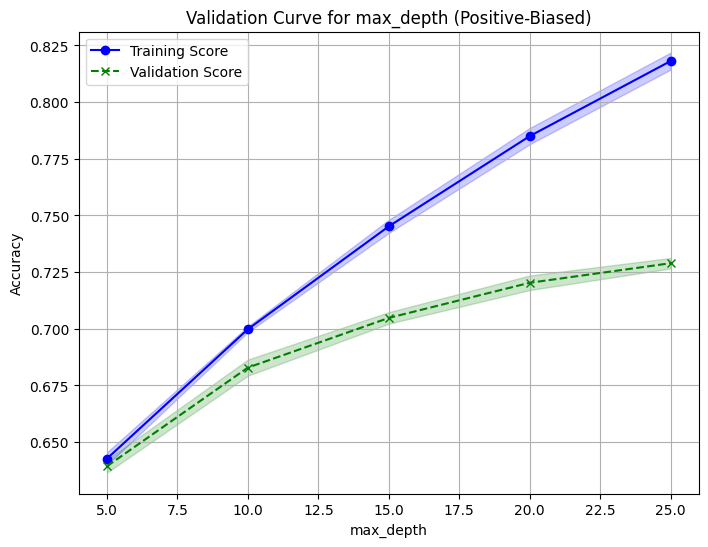

In [149]:
# ================================
# POSITIVE-BIASED: VALIDATION CURVE (max_depth)
# ================================

param_range = [5, 10, 15, 20, 25]
train_scores, test_scores = validation_curve(
    dt_classifier_posBias, X_train_tfidf_pos, y_train_pos, 
    param_name="max_depth", param_range=param_range,
    scoring="accuracy", cv=5, n_jobs=-1
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mean, label="Training Score", color='blue', marker='o')
plt.plot(param_range, test_mean, label="Validation Score", color='green', linestyle='--', marker='x')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')

plt.title("Validation Curve for max_depth (Positive-Biased)")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

<Figure size 600x600 with 0 Axes>

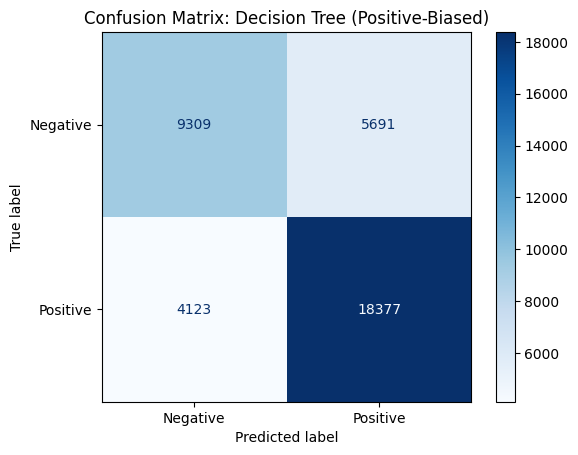

In [150]:
# ================================
# POSITIVE-BIASED: CONFUSION MATRIX
# ================================

cm = confusion_matrix(y_test_pos, y_pred_dt_pos)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])

plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Decision Tree (Positive-Biased)")
plt.show()

In [151]:
# ================================
# POSITIVE-BIASED: HYPERPARAMETER TUNING RESULTS
# ================================

# Convert results to DataFrame
dt_cv_results_df_posBias = pd.DataFrame(dt_grid_search_posBias.cv_results_)

# Display top rows
print("\n--- Decision Tree: Cross-Validation Scores for Each Fold (Positive-Biased) ---")
print(dt_cv_results_df_posBias[['params', 'mean_test_score', 'std_test_score']])

# Save results to CSV
dt_cv_results_df_posBias.to_csv('Results_2C(PosBias)/TFIDF_Models/tfidf_posBias_decisionTree_cv_results.csv', index=False)


--- Decision Tree: Cross-Validation Scores for Each Fold (Positive-Biased) ---
                                               params  mean_test_score  \
0   {'max_depth': 5, 'min_samples_leaf': 1, 'min_s...         0.638320   
1   {'max_depth': 5, 'min_samples_leaf': 1, 'min_s...         0.638320   
2   {'max_depth': 5, 'min_samples_leaf': 1, 'min_s...         0.638331   
3   {'max_depth': 5, 'min_samples_leaf': 2, 'min_s...         0.638320   
4   {'max_depth': 5, 'min_samples_leaf': 2, 'min_s...         0.638309   
5   {'max_depth': 5, 'min_samples_leaf': 2, 'min_s...         0.638331   
6   {'max_depth': 5, 'min_samples_leaf': 5, 'min_s...         0.638286   
7   {'max_depth': 5, 'min_samples_leaf': 5, 'min_s...         0.638320   
8   {'max_depth': 5, 'min_samples_leaf': 5, 'min_s...         0.638297   
9   {'max_depth': 5, 'min_samples_leaf': 10, 'min_...         0.638366   
10  {'max_depth': 5, 'min_samples_leaf': 10, 'min_...         0.638366   
11  {'max_depth': 5, 'min_sample

#### M2 Linear SVM

In [152]:
# ================================
# POSITIVE-BIASED: LINEAR SVM
# ================================
print("\n" + "="*50)
print("TF-IDF: Linear SVM (Positive-Biased Sentiment)")
print("="*50)

# 1. Define the model
svm_classifier_posBias = LinearSVC(max_iter=10000)

# 2. Define the hyperparameter grid
svm_param_grid_posBias = {
    'C': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2]  # Regularization parameter
}

# 3. Set up GridSearchCV for hyperparameter tuning
svm_grid_search_posBias = GridSearchCV(
    estimator=svm_classifier_posBias,
    param_grid=svm_param_grid_posBias,
    scoring='accuracy',
    cv=10,  # 10-fold Cross Validation
    n_jobs=4,  # Parallel processing
    verbose=2,
    return_train_score=True
)

# 4. Train the model using GridSearchCV
svm_grid_search_posBias.fit(X_train_tfidf_pos, y_train_pos)

# 5. Display the best hyperparameters
print("\nBest Params (TF-IDF, SVM - Positive-Biased):", svm_grid_search_posBias.best_params_)
print("Best CV Score (TF-IDF, SVM - Positive-Biased):", svm_grid_search_posBias.best_score_)

# 6. Make predictions on the test set
svm_best_posBias = svm_grid_search_posBias.best_estimator_
y_pred_svm_pos = svm_best_posBias.predict(X_test_tfidf_pos)

# 7. Evaluate the model performance
svm_test_accuracy_posBias = accuracy_score(y_test_pos, y_pred_svm_pos)
print("Test Accuracy (TF-IDF, SVM - Positive-Biased):", svm_test_accuracy_posBias)
print(classification_report(y_test_pos, y_pred_svm_pos))

# 8. Store results in dictionary
results_posBias['SVM'] = {
    'best_params': svm_grid_search_posBias.best_params_,
    'best_cv_score': svm_grid_search_posBias.best_score_,
    'test_accuracy': svm_test_accuracy_posBias,
    'classification_report': classification_report(y_test_pos, y_pred_svm_pos, output_dict=True)
}

# 9. Save cross-validation results to CSV
svm_cv_results_posBias = pd.DataFrame(svm_grid_search_posBias.cv_results_)
svm_cv_results_posBias.to_csv('Results_2C(PosBias)/TFIDF_Models/tfidf_posBias_svm_cv_results.csv', index=False)

print("\nLinear SVM Model Training & Evaluation Complete for Positive-Biased Sentiment!")


TF-IDF: Linear SVM (Positive-Biased Sentiment)
Fitting 10 folds for each of 6 candidates, totalling 60 fits

Best Params (TF-IDF, SVM - Positive-Biased): {'C': 1}
Best CV Score (TF-IDF, SVM - Positive-Biased): 0.83384
Test Accuracy (TF-IDF, SVM - Positive-Biased): 0.838
              precision    recall  f1-score   support

    negative       0.81      0.78      0.79     15000
    positive       0.86      0.88      0.87     22500

    accuracy                           0.84     37500
   macro avg       0.83      0.83      0.83     37500
weighted avg       0.84      0.84      0.84     37500


Linear SVM Model Training & Evaluation Complete for Positive-Biased Sentiment!


#### M3 Random Forest

In [153]:
# ================================
# POSITIVE-BIASED: RANDOM FOREST
# ================================
print("\n" + "="*50)
print("TF-IDF: Random Forest (Positive-Biased Sentiment)")
print("="*50)

# 1. Define the model
rf_classifier_posBias = RandomForestClassifier()

# 2. Define the hyperparameter grid
rf_param_grid_posBias = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'max_features': ['sqrt', 'log2']  # Features considered for best split
}

# 3. Set up GridSearchCV for hyperparameter tuning
rf_grid_search_posBias = GridSearchCV(
    estimator=rf_classifier_posBias,
    param_grid=rf_param_grid_posBias,
    scoring='accuracy',
    cv=10,  # 10-fold Cross Validation
    n_jobs=4,  # Parallel processing
    verbose=2,
    return_train_score=True
)

# 4. Train the model using GridSearchCV
rf_grid_search_posBias.fit(X_train_tfidf_pos, y_train_pos)

# 5. Display the best hyperparameters
print("\nBest Params (TF-IDF, Random Forest - Positive-Biased):", rf_grid_search_posBias.best_params_)
print("Best CV Score (TF-IDF, Random Forest - Positive-Biased):", rf_grid_search_posBias.best_score_)

# 6. Make predictions on the test set
rf_best_posBias = rf_grid_search_posBias.best_estimator_
y_pred_rf_pos = rf_best_posBias.predict(X_test_tfidf_pos)

# 7. Evaluate the model performance
rf_test_accuracy_posBias = accuracy_score(y_test_pos, y_pred_rf_pos)
print("Test Accuracy (TF-IDF, Random Forest - Positive-Biased):", rf_test_accuracy_posBias)
print(classification_report(y_test_pos, y_pred_rf_pos))

# 8. Store results in dictionary
results_posBias['RandomForest'] = {
    'best_params': rf_grid_search_posBias.best_params_,
    'best_cv_score': rf_grid_search_posBias.best_score_,
    'test_accuracy': rf_test_accuracy_posBias,
    'classification_report': classification_report(y_test_pos, y_pred_rf_pos, output_dict=True)
}

# 9. Save cross-validation results to CSV
rf_cv_results_posBias = pd.DataFrame(rf_grid_search_posBias.cv_results_)
rf_cv_results_posBias.to_csv('Results_2C(PosBias)/TFIDF_Models/tfidf_posBias_randomForest_cv_results.csv', index=False)

print("\nRandom Forest Model Training & Evaluation Complete for Positive-Biased Sentiment!")


TF-IDF: Random Forest (Positive-Biased Sentiment)
Fitting 10 folds for each of 18 candidates, totalling 180 fits

Best Params (TF-IDF, Random Forest - Positive-Biased): {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 300}
Best CV Score (TF-IDF, Random Forest - Positive-Biased): 0.8482285714285714
Test Accuracy (TF-IDF, Random Forest - Positive-Biased): 0.8537866666666667
              precision    recall  f1-score   support

    negative       0.88      0.74      0.80     15000
    positive       0.84      0.93      0.88     22500

    accuracy                           0.85     37500
   macro avg       0.86      0.83      0.84     37500
weighted avg       0.86      0.85      0.85     37500


Random Forest Model Training & Evaluation Complete for Positive-Biased Sentiment!


#### M4 kNN

In [154]:
# ================================
# POSITIVE-BIASED: k-NEAREST NEIGHBORS (kNN)
# ================================
print("\n" + "="*50)
print("TF-IDF: kNN (Positive-Biased Sentiment)")
print("="*50)

# 1. Define the model
knn_classifier_posBias = KNeighborsClassifier()

# 2. Define the hyperparameter grid
knn_param_grid_posBias = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function
    'metric': ['euclidean', 'manhattan', 'cosine']  # Distance metric
}

# 3. Set up GridSearchCV for hyperparameter tuning
knn_grid_search_posBias = GridSearchCV(
    estimator=knn_classifier_posBias,
    param_grid=knn_param_grid_posBias,
    scoring='accuracy',
    cv=10,  # 10-fold Cross Validation
    n_jobs=4,  # Parallel processing
    verbose=2,
    return_train_score=True
)

# 4. Train the model using GridSearchCV
knn_grid_search_posBias.fit(X_train_tfidf_pos, y_train_pos)

# 5. Display the best hyperparameters
print("\nBest Params (TF-IDF, kNN - Positive-Biased):", knn_grid_search_posBias.best_params_)
print("Best CV Score (TF-IDF, kNN - Positive-Biased):", knn_grid_search_posBias.best_score_)

# 6. Make predictions on the test set
knn_best_posBias = knn_grid_search_posBias.best_estimator_
y_pred_knn_pos = knn_best_posBias.predict(X_test_tfidf_pos)

# 7. Evaluate the model performance
knn_test_accuracy_posBias = accuracy_score(y_test_pos, y_pred_knn_pos)
print("Test Accuracy (TF-IDF, kNN - Positive-Biased):", knn_test_accuracy_posBias)
print(classification_report(y_test_pos, y_pred_knn_pos))

# 8. Store results in dictionary
results_posBias['kNN'] = {
    'best_params': knn_grid_search_posBias.best_params_,
    'best_cv_score': knn_grid_search_posBias.best_score_,
    'test_accuracy': knn_test_accuracy_posBias,
    'classification_report': classification_report(y_test_pos, y_pred_knn_pos, output_dict=True)
}

# 9. Save cross-validation results to CSV
knn_cv_results_posBias = pd.DataFrame(knn_grid_search_posBias.cv_results_)
knn_cv_results_posBias.to_csv('Results_2C(PosBias)/TFIDF_Models/tfidf_posBias_knn_cv_results.csv', index=False)

print("\nkNN Model Training & Evaluation Complete for Positive-Biased Sentiment!")


TF-IDF: kNN (Positive-Biased Sentiment)
Fitting 10 folds for each of 24 candidates, totalling 240 fits


C:\Users\mm2046\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.73830857 0.76104    0.73096    0.76753143 0.72988571 0.77466286
 0.72638857 0.77716571        nan 0.68734857        nan 0.59212571
        nan 0.72420571        nan 0.72715429 0.73644571 0.76009143
 0.73154286 0.76821714 0.73061714 0.77462857 0.72950857 0.77870857]
  warnings.warn(
C:\Users\mm2046\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the train scores are non-finite: [0.87266413 0.9999454  0.82503365 0.9999454  0.80271238 0.9999454
 0.78890667 0.9999454         nan 0.9999454         nan 0.9999454
        nan 0.9999454         nan 0.9999454  0.86535746 0.99993524
 0.82416762 0.99993524 0.80442286 0.99993524 0.7909181  0.99993524]
  warnings.warn(



Best Params (TF-IDF, kNN - Positive-Biased): {'metric': 'cosine', 'n_neighbors': 9, 'weights': 'distance'}
Best CV Score (TF-IDF, kNN - Positive-Biased): 0.7787085714285714
Test Accuracy (TF-IDF, kNN - Positive-Biased): 0.7861866666666667
              precision    recall  f1-score   support

    negative       0.76      0.69      0.72     15000
    positive       0.80      0.85      0.83     22500

    accuracy                           0.79     37500
   macro avg       0.78      0.77      0.77     37500
weighted avg       0.78      0.79      0.78     37500


kNN Model Training & Evaluation Complete for Positive-Biased Sentiment!


#### M5 Naive Bayes

In [155]:
# ================================
# POSITIVE-BIASED: NAÏVE BAYES (TF-IDF)
# ================================
print("\n" + "="*50)
print("TF-IDF: Naïve Bayes (Positive-Biased Sentiment)")
print("="*50)

# 1. Define the model
nb_classifier_posBias = MultinomialNB()

# 2. Define the hyperparameter grid
nb_param_grid_posBias = {
    'alpha': [0.5, 1.0, 1.5]  # Smoothing parameter
}

# 3. Set up GridSearchCV for hyperparameter tuning
nb_grid_search_posBias = GridSearchCV(
    estimator=nb_classifier_posBias,
    param_grid=nb_param_grid_posBias,
    scoring='accuracy',
    cv=10,  # 10-fold Cross Validation
    n_jobs=4,  # Parallel processing
    verbose=2,
    return_train_score=True
)

# 4. Train the model using GridSearchCV
nb_grid_search_posBias.fit(X_train_tfidf_pos, y_train_pos)

# 5. Display the best hyperparameters
print("\nBest Params (TF-IDF, Naïve Bayes - Positive-Biased):", nb_grid_search_posBias.best_params_)
print("Best CV Score (TF-IDF, Naïve Bayes - Positive-Biased):", nb_grid_search_posBias.best_score_)

# 6. Make predictions on the test set
nb_best_posBias = nb_grid_search_posBias.best_estimator_
y_pred_nb_pos = nb_best_posBias.predict(X_test_tfidf_pos)

# 7. Evaluate the model performance
nb_test_accuracy_posBias = accuracy_score(y_test_pos, y_pred_nb_pos)
print("Test Accuracy (TF-IDF, Naïve Bayes - Positive-Biased):", nb_test_accuracy_posBias)
print(classification_report(y_test_pos, y_pred_nb_pos))

# 8. Store results in dictionary
results_posBias['NaïveBayes'] = {
    'best_params': nb_grid_search_posBias.best_params_,
    'best_cv_score': nb_grid_search_posBias.best_score_,
    'test_accuracy': nb_test_accuracy_posBias,
    'classification_report': classification_report(y_test_pos, y_pred_nb_pos, output_dict=True)
}

# 9. Save cross-validation results to CSV
nb_cv_results_posBias = pd.DataFrame(nb_grid_search_posBias.cv_results_)
nb_cv_results_posBias.to_csv('Results_2C(PosBias)/TFIDF_Models/tfidf_posBias_naiveBayes_cv_results.csv', index=False)

print("\nNaïve Bayes Model Training & Evaluation Complete for Positive-Biased Sentiment!")



TF-IDF: Naïve Bayes (Positive-Biased Sentiment)
Fitting 10 folds for each of 3 candidates, totalling 30 fits

Best Params (TF-IDF, Naïve Bayes - Positive-Biased): {'alpha': 0.5}
Best CV Score (TF-IDF, Naïve Bayes - Positive-Biased): 0.7969714285714286
Test Accuracy (TF-IDF, Naïve Bayes - Positive-Biased): 0.80096
              precision    recall  f1-score   support

    negative       0.82      0.65      0.72     15000
    positive       0.79      0.90      0.84     22500

    accuracy                           0.80     37500
   macro avg       0.80      0.78      0.78     37500
weighted avg       0.80      0.80      0.80     37500


Naïve Bayes Model Training & Evaluation Complete for Positive-Biased Sentiment!


In [156]:
# ================================
# SUMMARY: TF-IDF (Positive-Biased Sentiment)
# ================================
print("\n=== SUMMARY: TF-IDF Classification for Positive-Biased Sentiment ===")

# Convert results dictionary into a DataFrame for better visualization
summary_posBias_tfidf = pd.DataFrame(results_posBias).T  # Transpose for readability



=== SUMMARY: TF-IDF Classification for Positive-Biased Sentiment ===


### **NLP Method 2:** N-Gram (Tri-Gram)

#### Feature Extraction Method: N-Gram

In [157]:
# ================================
# POSITIVE-BIASED: N-Gram Feature Extraction
# ================================
print("\n" + "="*50)
print("POSITIVE-BIASED: N-Gram Feature Extraction")
print("="*50)

from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer for N-Grams (unigrams, bigrams, trigrams)
ngram_vectorizer_pos = CountVectorizer(
    ngram_range=(1, 3),  # (1,3) includes unigrams, bigrams, and trigrams
    max_features=10000,
    max_df=0.8
)

# Fit the vectorizer on the positive-biased training set and transform both training and test sets
X_train_ngram_pos = ngram_vectorizer_pos.fit_transform(X_train_pos)
X_test_ngram_pos = ngram_vectorizer_pos.transform(X_test_pos)

# (Optional) Create a dictionary to store the results for the N-Gram approach for Positive-Biased sentiment
results_ngram_pos = {}

print("\nN-Gram Feature Extraction Complete for Positive-Biased Sentiment!")


POSITIVE-BIASED: N-Gram Feature Extraction

N-Gram Feature Extraction Complete for Positive-Biased Sentiment!


#### M1 Decision Tree

In [158]:
# -------------------------------
#  POSITIVE-BIASED: Decision Tree (N-Gram)
# -------------------------------

# Define Decision Tree model
dt_classifier_pos_ngram = DecisionTreeClassifier()

# Define hyperparameter grid
dt_param_grid_pos_ngram = {
    'max_depth': [10, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Set up GridSearchCV for hyperparameter tuning
dt_grid_search_pos_ngram = GridSearchCV(
    estimator=dt_classifier_pos_ngram,
    param_grid=dt_param_grid_pos_ngram,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

print("\n" + "="*50)
print("N-Gram: Decision Tree (Positive-Biased)")
print("="*50)

# Fit GridSearch on the N-Gram transformed training data
dt_grid_search_pos_ngram.fit(X_train_ngram_pos, y_train_pos)

# Best parameters and cross-validation score
print("\nBest Params (N-Gram, Decision Tree - Positive Biased):", dt_grid_search_pos_ngram.best_params_)
print("Best CV Score (N-Gram, Decision Tree - Positive Biased):", dt_grid_search_pos_ngram.best_score_)

# Predict on test data
dt_best_pos_ngram = dt_grid_search_pos_ngram.best_estimator_
y_pred_dt_pos_ngram = dt_best_pos_ngram.predict(X_test_ngram_pos)

# Evaluate model
dt_test_accuracy_pos_ngram = accuracy_score(y_test_pos, y_pred_dt_pos_ngram)
print("Test Accuracy (N-Gram, Decision Tree - Positive Biased):", dt_test_accuracy_pos_ngram)
print(classification_report(y_test_pos, y_pred_dt_pos_ngram))

# Store results
results_ngram_pos['DecisionTree'] = {
    'best_params': dt_grid_search_pos_ngram.best_params_,
    'best_cv_score': dt_grid_search_pos_ngram.best_score_,
    'test_accuracy': dt_test_accuracy_pos_ngram,
    'classification_report': classification_report(y_test_pos, y_pred_dt_pos_ngram, output_dict=True)
}

# Save cross-validation results to CSV
dt_cv_results_pos_ngram = pd.DataFrame(dt_grid_search_pos_ngram.cv_results_)
dt_cv_results_pos_ngram.to_csv('Results_2C(PosBias)/NGram_Models/ngram_posBias_decisionTree_cv_results.csv', index=False)

print("\nDecision Tree Model Training & Evaluation Complete for Positive-Biased Sentiment (N-Gram)!")


N-Gram: Decision Tree (Positive-Biased)
Fitting 10 folds for each of 27 candidates, totalling 270 fits

Best Params (N-Gram, Decision Tree - Positive Biased): {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Score (N-Gram, Decision Tree - Positive Biased): 0.7337714285714285
Test Accuracy (N-Gram, Decision Tree - Positive Biased): 0.74112
              precision    recall  f1-score   support

    negative       0.67      0.71      0.69     15000
    positive       0.80      0.76      0.78     22500

    accuracy                           0.74     37500
   macro avg       0.73      0.74      0.73     37500
weighted avg       0.74      0.74      0.74     37500


Decision Tree Model Training & Evaluation Complete for Positive-Biased Sentiment (N-Gram)!


#### M2 Linear SVM

In [159]:
# -------------------------------
#  POSITIVE-BIASED: Linear SVM (N-Gram)
# -------------------------------

# Define SVM model
svm_classifier_pos_ngram = LinearSVC(max_iter=10000)

# Define hyperparameter grid
svm_param_grid_pos_ngram = {
    'C': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2]
}

# Set up GridSearchCV for hyperparameter tuning
svm_grid_search_pos_ngram = GridSearchCV(
    estimator=svm_classifier_pos_ngram,
    param_grid=svm_param_grid_pos_ngram,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

print("\n" + "="*50)
print("N-Gram: Linear SVM (Positive-Biased)")
print("="*50)

# Fit GridSearch on the N-Gram transformed training data
svm_grid_search_pos_ngram.fit(X_train_ngram_pos, y_train_pos)

# Best parameters and cross-validation score
print("\nBest Params (N-Gram, SVM - Positive Biased):", svm_grid_search_pos_ngram.best_params_)
print("Best CV Score (N-Gram, SVM - Positive Biased):", svm_grid_search_pos_ngram.best_score_)

# Predict on test data
svm_best_pos_ngram = svm_grid_search_pos_ngram.best_estimator_
y_pred_svm_pos_ngram = svm_best_pos_ngram.predict(X_test_ngram_pos)

# Evaluate model
svm_test_accuracy_pos_ngram = accuracy_score(y_test_pos, y_pred_svm_pos_ngram)
print("Test Accuracy (N-Gram, SVM - Positive Biased):", svm_test_accuracy_pos_ngram)
print(classification_report(y_test_pos, y_pred_svm_pos_ngram))

# Store results
results_ngram_pos['SVM'] = {
    'best_params': svm_grid_search_pos_ngram.best_params_,
    'best_cv_score': svm_grid_search_pos_ngram.best_score_,
    'test_accuracy': svm_test_accuracy_pos_ngram,
    'classification_report': classification_report(y_test_pos, y_pred_svm_pos_ngram, output_dict=True)
}

# Save cross-validation results to CSV
svm_cv_results_pos_ngram = pd.DataFrame(svm_grid_search_pos_ngram.cv_results_)
svm_cv_results_pos_ngram.to_csv('Results_2C(PosBias)/NGram_Models/ngram_posBias_svm_cv_results.csv', index=False)

print("\nLinear SVM Model Training & Evaluation Complete for Positive-Biased Sentiment (N-Gram)!")


N-Gram: Linear SVM (Positive-Biased)
Fitting 10 folds for each of 6 candidates, totalling 60 fits

Best Params (N-Gram, SVM - Positive Biased): {'C': 0.01}
Best CV Score (N-Gram, SVM - Positive Biased): 0.8303428571428573
Test Accuracy (N-Gram, SVM - Positive Biased): 0.8335466666666667
              precision    recall  f1-score   support

    negative       0.82      0.75      0.78     15000
    positive       0.84      0.89      0.86     22500

    accuracy                           0.83     37500
   macro avg       0.83      0.82      0.82     37500
weighted avg       0.83      0.83      0.83     37500


Linear SVM Model Training & Evaluation Complete for Positive-Biased Sentiment (N-Gram)!


#### M3 Random Forest

In [160]:
# -------------------------------
#  POSITIVE-BIASED: Random Forest (N-Gram)
# -------------------------------

# Define Random Forest model
rf_classifier_pos_ngram = RandomForestClassifier()

# Define hyperparameter grid
rf_param_grid_pos_ngram = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']  # Usually beneficial for text
}

# Set up GridSearchCV for hyperparameter tuning
rf_grid_search_pos_ngram = GridSearchCV(
    estimator=rf_classifier_pos_ngram,
    param_grid=rf_param_grid_pos_ngram,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

print("\n" + "="*50)
print("N-Gram: Random Forest (Positive-Biased)")
print("="*50)

# Fit GridSearch on the N-Gram transformed training data
rf_grid_search_pos_ngram.fit(X_train_ngram_pos, y_train_pos)

# Best parameters and cross-validation score
print("\nBest Params (N-Gram, Random Forest - Positive Biased):", rf_grid_search_pos_ngram.best_params_)
print("Best CV Score (N-Gram, Random Forest - Positive Biased):", rf_grid_search_pos_ngram.best_score_)

# Predict on test data
rf_best_pos_ngram = rf_grid_search_pos_ngram.best_estimator_
y_pred_rf_pos_ngram = rf_best_pos_ngram.predict(X_test_ngram_pos)

# Evaluate model
rf_test_accuracy_pos_ngram = accuracy_score(y_test_pos, y_pred_rf_pos_ngram)
print("Test Accuracy (N-Gram, Random Forest - Positive Biased):", rf_test_accuracy_pos_ngram)
print(classification_report(y_test_pos, y_pred_rf_pos_ngram))

# Store results
results_ngram_pos['RandomForest'] = {
    'best_params': rf_grid_search_pos_ngram.best_params_,
    'best_cv_score': rf_grid_search_pos_ngram.best_score_,
    'test_accuracy': rf_test_accuracy_pos_ngram,
    'classification_report': classification_report(y_test_pos, y_pred_rf_pos_ngram, output_dict=True)
}

# Save cross-validation results to CSV
rf_cv_results_pos_ngram = pd.DataFrame(rf_grid_search_pos_ngram.cv_results_)
rf_cv_results_pos_ngram.to_csv('Results_2C(PosBias)/NGram_Models/ngram_posBias_randomForest_cv_results.csv', index=False)

print("\nRandom Forest Model Training & Evaluation Complete for Positive-Biased Sentiment (N-Gram)!")


N-Gram: Random Forest (Positive-Biased)
Fitting 10 folds for each of 18 candidates, totalling 180 fits

Best Params (N-Gram, Random Forest - Positive Biased): {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
Best CV Score (N-Gram, Random Forest - Positive Biased): 0.8491771428571429
Test Accuracy (N-Gram, Random Forest - Positive Biased): 0.8545333333333334
              precision    recall  f1-score   support

    negative       0.88      0.74      0.80     15000
    positive       0.84      0.93      0.88     22500

    accuracy                           0.85     37500
   macro avg       0.86      0.83      0.84     37500
weighted avg       0.86      0.85      0.85     37500


Random Forest Model Training & Evaluation Complete for Positive-Biased Sentiment (N-Gram)!


#### M4 kNN

In [161]:
# -------------------------------
#  POSITIVE-BIASED: kNN (N-Gram)
# -------------------------------

# Define kNN model
knn_classifier_pos_ngram = KNeighborsClassifier()

# Define hyperparameter grid
knn_param_grid_pos_ngram = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

# Set up GridSearchCV for hyperparameter tuning
knn_grid_search_pos_ngram = GridSearchCV(
    estimator=knn_classifier_pos_ngram,
    param_grid=knn_param_grid_pos_ngram,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

print("\n" + "="*50)
print("N-Gram: kNN (Positive-Biased)")
print("="*50)

# Fit GridSearch on the N-Gram transformed training data
knn_grid_search_pos_ngram.fit(X_train_ngram_pos, y_train_pos)

# Best parameters and cross-validation score
print("\nBest Params (N-Gram, kNN - Positive Biased):", knn_grid_search_pos_ngram.best_params_)
print("Best CV Score (N-Gram, kNN - Positive Biased):", knn_grid_search_pos_ngram.best_score_)

# Predict on test data
knn_best_pos_ngram = knn_grid_search_pos_ngram.best_estimator_
y_pred_knn_pos_ngram = knn_best_pos_ngram.predict(X_test_ngram_pos)

# Evaluate model
knn_test_accuracy_pos_ngram = accuracy_score(y_test_pos, y_pred_knn_pos_ngram)
print("Test Accuracy (N-Gram, kNN - Positive Biased):", knn_test_accuracy_pos_ngram)
print(classification_report(y_test_pos, y_pred_knn_pos_ngram))

# Store results
results_ngram_pos['kNN'] = {
    'best_params': knn_grid_search_pos_ngram.best_params_,
    'best_cv_score': knn_grid_search_pos_ngram.best_score_,
    'test_accuracy': knn_test_accuracy_pos_ngram,
    'classification_report': classification_report(y_test_pos, y_pred_knn_pos_ngram, output_dict=True)
}

# Save cross-validation results to CSV
knn_cv_results_pos_ngram = pd.DataFrame(knn_grid_search_pos_ngram.cv_results_)
knn_cv_results_pos_ngram.to_csv('Results_2C(PosBias)/NGram_Models/ngram_posBias_knn_cv_results.csv', index=False)

print("\nkNN Model Training & Evaluation Complete for Positive-Biased Sentiment (N-Gram)!")


N-Gram: kNN (Positive-Biased)
Fitting 10 folds for each of 24 candidates, totalling 240 fits

Best Params (N-Gram, kNN - Positive Biased): {'metric': 'cosine', 'n_neighbors': 9, 'weights': 'distance'}
Best CV Score (N-Gram, kNN - Positive Biased): 0.7664342857142856
Test Accuracy (N-Gram, kNN - Positive Biased): 0.7715733333333333
              precision    recall  f1-score   support

    negative       0.72      0.71      0.71     15000
    positive       0.81      0.81      0.81     22500

    accuracy                           0.77     37500
   macro avg       0.76      0.76      0.76     37500
weighted avg       0.77      0.77      0.77     37500


kNN Model Training & Evaluation Complete for Positive-Biased Sentiment (N-Gram)!


#### M5 Naive Bayes

In [162]:
# -------------------------------
#  POSITIVE-BIASED: Naïve Bayes (N-Gram)
# -------------------------------

# Define Naïve Bayes model
nb_classifier_pos_ngram = MultinomialNB()

# Define hyperparameter grid
nb_param_grid_pos_ngram = {
    'alpha': [0.5, 1.0, 1.5]
}

# Set up GridSearchCV for hyperparameter tuning
nb_grid_search_pos_ngram = GridSearchCV(
    estimator=nb_classifier_pos_ngram,
    param_grid=nb_param_grid_pos_ngram,
    scoring='accuracy',
    cv=10,
    n_jobs=4,
    verbose=2,
    return_train_score=True
)

print("\n" + "="*50)
print("N-Gram: Naïve Bayes (Positive-Biased)")
print("="*50)

# Fit GridSearch on the N-Gram transformed training data
nb_grid_search_pos_ngram.fit(X_train_ngram_pos, y_train_pos)

# Best parameters and cross-validation score
print("\nBest Params (N-Gram, Naïve Bayes - Positive Biased):", nb_grid_search_pos_ngram.best_params_)
print("Best CV Score (N-Gram, Naïve Bayes - Positive Biased):", nb_grid_search_pos_ngram.best_score_)

# Predict on test data
nb_best_pos_ngram = nb_grid_search_pos_ngram.best_estimator_
y_pred_nb_pos_ngram = nb_best_pos_ngram.predict(X_test_ngram_pos)

# Evaluate model
nb_test_accuracy_pos_ngram = accuracy_score(y_test_pos, y_pred_nb_pos_ngram)
print("Test Accuracy (N-Gram, Naïve Bayes - Positive Biased):", nb_test_accuracy_pos_ngram)
print(classification_report(y_test_pos, y_pred_nb_pos_ngram))

# Store results
results_ngram_pos['NaiveBayes'] = {
    'best_params': nb_grid_search_pos_ngram.best_params_,
    'best_cv_score': nb_grid_search_pos_ngram.best_score_,
    'test_accuracy': nb_test_accuracy_pos_ngram,
    'classification_report': classification_report(y_test_pos, y_pred_nb_pos_ngram, output_dict=True)
}

# Save cross-validation results to CSV
nb_cv_results_pos_ngram = pd.DataFrame(nb_grid_search_pos_ngram.cv_results_)
nb_cv_results_pos_ngram.to_csv('Results_2C(PosBias)/NGram_Models/ngram_posBias_naiveBayes_cv_results.csv', index=False)

print("\nNaïve Bayes Model Training & Evaluation Complete for Positive-Biased Sentiment (N-Gram)!")


N-Gram: Naïve Bayes (Positive-Biased)
Fitting 10 folds for each of 3 candidates, totalling 30 fits

Best Params (N-Gram, Naïve Bayes - Positive Biased): {'alpha': 0.5}
Best CV Score (N-Gram, Naïve Bayes - Positive Biased): 0.7912914285714286
Test Accuracy (N-Gram, Naïve Bayes - Positive Biased): 0.7951466666666667
              precision    recall  f1-score   support

    negative       0.78      0.68      0.73     15000
    positive       0.80      0.88      0.84     22500

    accuracy                           0.80     37500
   macro avg       0.79      0.78      0.78     37500
weighted avg       0.79      0.80      0.79     37500


Naïve Bayes Model Training & Evaluation Complete for Positive-Biased Sentiment (N-Gram)!


#### Summary

In [163]:
summary_results_ngram_pos = pd.DataFrame(results_ngram_pos).T